# Petroleum Products Consumption

**Objective:** Shown here is data of different petroleum projects and its consumption in different months in 

1. **`Month`**: Month of the year
2. **`Year`**: Year (2020, 2021, 2022, 2023)
3. **`Products`**: Petroleum products consumed
4. **`Quantity Consumed`**: Quantity of petroleum product consumed in 1000 metric tonnes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Set display options to prevent line wrapping
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv("petroleum_prod_consumption.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   month                           420 non-null    object 
 1   year                            420 non-null    int64  
 2   products                        420 non-null    object 
 3   quantity_in_1000_metric_tonnes  420 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.3+ KB


In [6]:
df.head()

month  year products  quantity_in_1000_metric_tonnes
0  February  2023      ATF                          622.73
1   January  2023      ATF                          667.36
2  December  2022      ATF                          659.00
3  November  2022      ATF                          617.63
4   October  2022      ATF                          615.78

In [7]:
#  Combining the month and year columns to create a date column for easier calculation

df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y')
df = df.sort_values(by='date').reset_index(drop=True)

In [8]:
df

month  year        products  quantity_in_1000_metric_tonnes       date
0       April  2020             LPG                         2113.00 2020-04-01
1       April  2020  Petroleum coke                          775.00 2020-04-01
2       April  2020          Others                          680.00 2020-04-01
3       April  2020         Naphtha                          730.00 2020-04-01
4       April  2020              MS                          973.00 2020-04-01
..        ...   ...             ...                             ...        ...
415  February  2023              MS                         2776.40 2023-02-01
416  February  2023         Naphtha                         1061.06 2023-02-01
417  February  2023          Others                         1347.17 2023-02-01
418  February  2023             HSD                         6998.15 2023-02-01
419  February  2023             ATF                          622.73 2023-02-01

[420 rows x 5 columns]

In [9]:
df['products'].value_counts()

products
LPG                     35
Petroleum coke          35
Others                  35
Naphtha                 35
MS                      35
Lubricants & Greases    35
LDO                     35
HSD                     35
FO & LSHS               35
Bitumen                 35
ATF                     35
SKO                     35
Name: count, dtype: int64

In [10]:
# Filtering data by products

pd1 = df[df['products'] == 'ATF'] # we can change 'ATF' and put other product name to check its dat
print(pd1)

         month  year products  quantity_in_1000_metric_tonnes       date
10       April  2020      ATF                           55.00 2020-04-01
13         May  2020      ATF                          110.00 2020-05-01
25        June  2020      ATF                          222.00 2020-06-01
47        July  2020      ATF                          233.00 2020-07-01
50      August  2020      ATF                          256.00 2020-08-01
68   September  2020      ATF                          313.00 2020-09-01
79     October  2020      ATF                          360.00 2020-10-01
85    November  2020      ATF                          376.00 2020-11-01
96    December  2020      ATF                          427.00 2020-12-01
112    January  2021      ATF                          441.00 2021-01-01
127   February  2021      ATF                          432.00 2021-02-01
143      March  2021      ATF                          474.00 2021-03-01
148      April  2021      ATF                      

In [11]:
pd7 = df[df['products'] == 'LDO']
print(pd7)

         month  year products  quantity_in_1000_metric_tonnes       date
6        April  2020      LDO                           28.00 2020-04-01
14         May  2020      LDO                           71.00 2020-05-01
30        June  2020      LDO                           63.00 2020-06-01
37        July  2020      LDO                           62.00 2020-07-01
54      August  2020      LDO                           62.00 2020-08-01
69   September  2020      LDO                           65.00 2020-09-01
75     October  2020      LDO                           69.00 2020-10-01
90    November  2020      LDO                           69.00 2020-11-01
101   December  2020      LDO                           88.00 2020-12-01
117    January  2021      LDO                           87.00 2021-01-01
130   February  2021      LDO                           80.00 2021-02-01
133      March  2021      LDO                          112.00 2021-03-01
145      April  2021      LDO                      

In [13]:
# Describing aggregated product quantity consumed by each Product

product_summary = df.groupby('products')['quantity_in_1000_metric_tonnes'].describe()
print(product_summary)

                      count         mean         std      min       25%      50%       75%      max
products                                                                                           
ATF                    35.0   439.590857  157.292251    55.00   337.500   441.00   583.380   667.36
Bitumen                35.0   634.278857  214.855135   187.00   425.000   660.00   809.550  1012.00
FO & LSHS              35.0   520.336286   66.008281   283.00   478.000   521.99   562.500   622.03
HSD                    35.0  6499.200571  937.606188  3252.00  6164.500  6616.00  7185.380  7786.43
LDO                    35.0    72.023714   16.731770    28.00    62.000    69.00    85.000   112.00
LPG                    35.0  2340.200857  135.759154  2064.00  2257.000  2356.00  2451.085  2569.59
Lubricants & Greases   35.0   343.485429   77.062869   148.00   305.955   354.00   389.500   538.00
MS                     35.0  2591.020571  397.880525   973.00  2461.500  2665.00  2821.510  3016.92


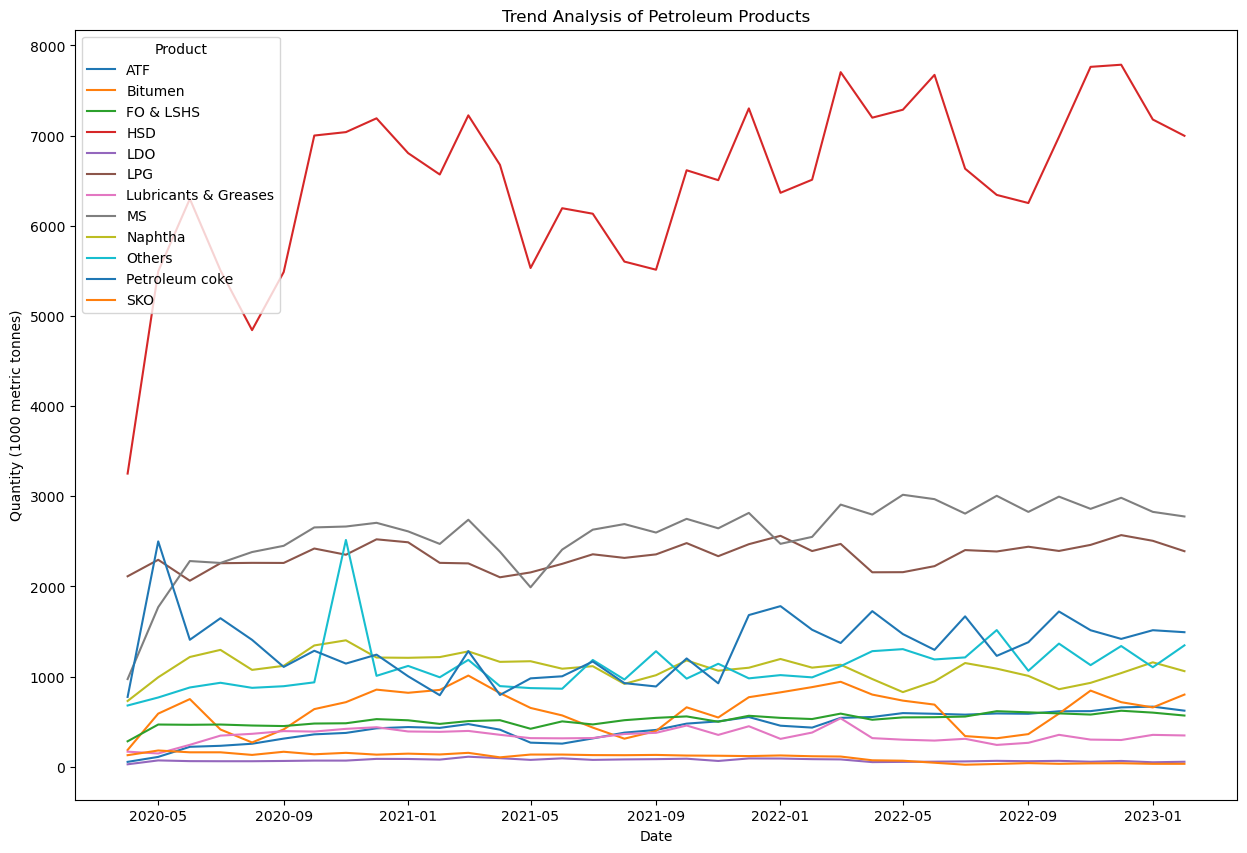

In [14]:
# Time series of product consumption

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

# Grouped by 'products' and plotted each product separately
for product, group_data in df.groupby('products'):
    plt.plot(group_data['date'], group_data['quantity_in_1000_metric_tonnes'], label=product)

plt.xlabel('Date')
plt.ylabel('Quantity (1000 metric tonnes)')
plt.title('Trend Analysis of Petroleum Products')
plt.legend(title='Product')
plt.show()


**Observation:**

1. HSD (High speed Diesel) has the maximum consumption.
2. LDO (Light Diesel Oil) has the minimum consumption.
3. LDO, SKO (Superior Kerosene Oil), Lubricants and Greases, ATF (Aviation Turbine fuel), FO & LSHS (Furnace Oil & Low Sulphur Heavy Stock) have stable and low consumption.
4. MS(Motor Spirit- Petrol) and LPG (Liquified petroleum Gas) have intermediate consumption.

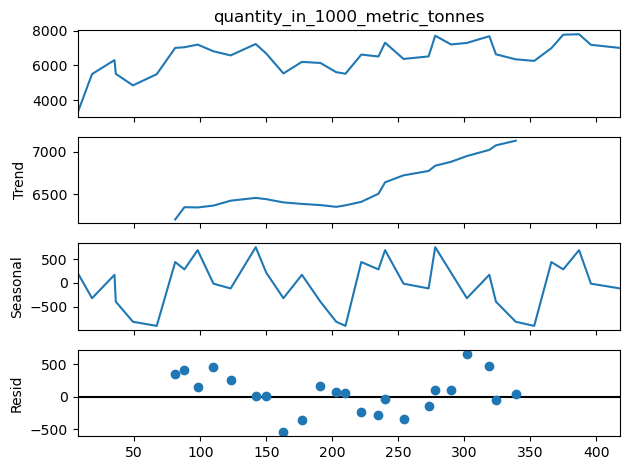

In [16]:
#Decomposition and Trend Analysis of one of the products

from statsmodels.tsa.seasonal import seasonal_decompose
pd9 = df[df['products'] == 'HSD']

decomposition = seasonal_decompose(pd9['quantity_in_1000_metric_tonnes'], model='additive', period=12)
decomposition.plot()
plt.show()

**Observation**: Increasing trend, regular fluctuations in showing high values in certain months, and scattering around zero, suggesting that the model effectively captured most of the systematic variations.

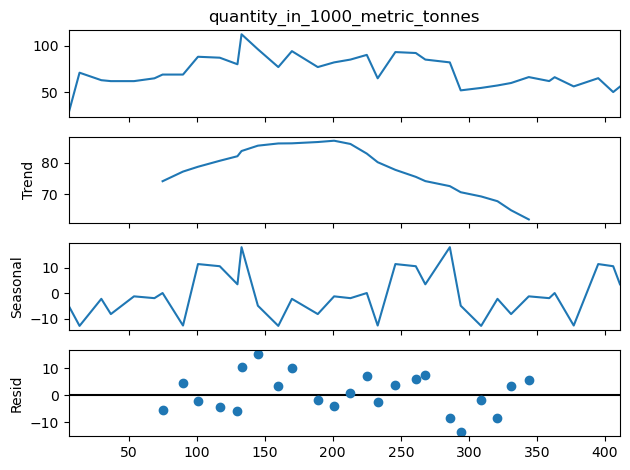

In [18]:
# LSO

decomposition = seasonal_decompose(pd7['quantity_in_1000_metric_tonnes'], model='additive', period=12)
decomposition.plot()
plt.show()

**Observation**: initially increasing then decreasing trend, regular fluctuations in showing high values in certain months, and scattering around zero, suggesting that the model effectively captured most of the systematic variations.

In [20]:
# Preparing for forcasting

In [21]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [22]:
# Group by 'product' and apply rolling mean and standard deviation
# checking stationarity of data

grouped = df.groupby('products')
# Calculate rolling mean and standard deviation for each product
df['rolmean'] = grouped['quantity_in_1000_metric_tonnes'].transform(lambda x: x.rolling(window=12).mean())
df['rolstd'] = grouped['quantity_in_1000_metric_tonnes'].transform(lambda x: x.rolling(window=12).std())

# Display the results
print(df[['products', 'quantity_in_1000_metric_tonnes', 'rolmean', 'rolstd']])

           products  quantity_in_1000_metric_tonnes      rolmean      rolstd
0               LPG                         2113.00          NaN         NaN
1    Petroleum coke                          775.00          NaN         NaN
2            Others                          680.00          NaN         NaN
3           Naphtha                          730.00          NaN         NaN
4                MS                          973.00          NaN         NaN
..              ...                             ...          ...         ...
415              MS                         2776.40  2898.060000   91.542785
416         Naphtha                         1061.06  1015.125000  109.924363
417          Others                         1347.17  1247.899167  134.604559
418             HSD                         6998.15  7150.418333  535.837630
419             ATF                          622.73   601.723333   37.375967

[420 rows x 4 columns]


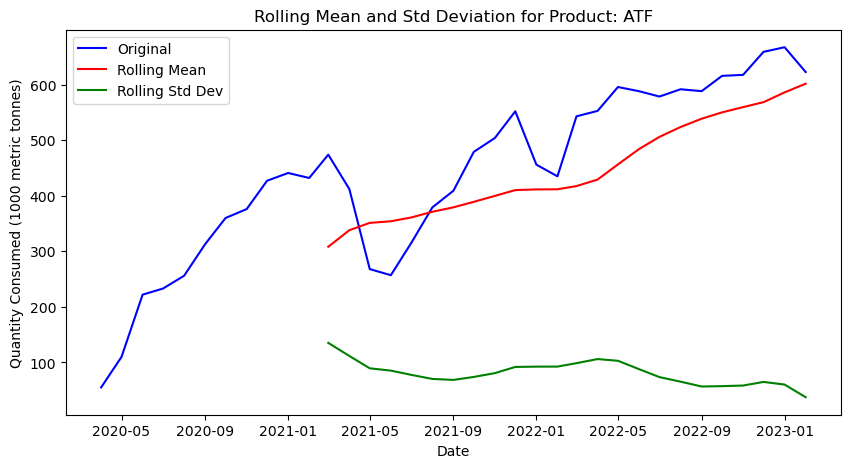

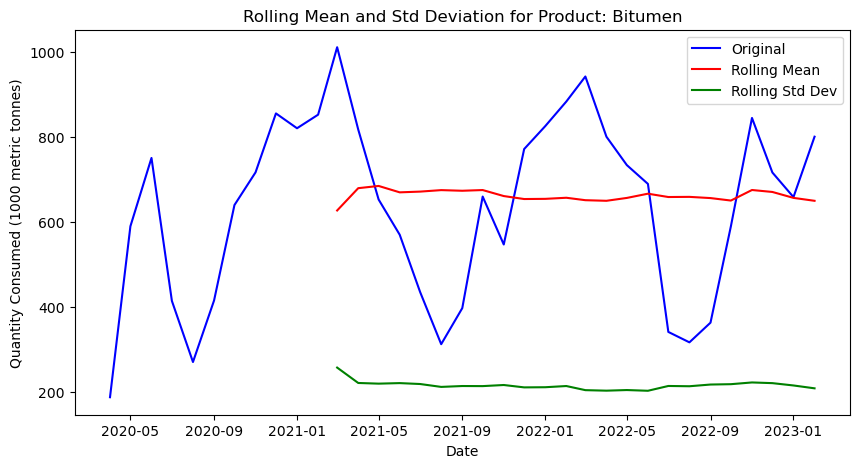

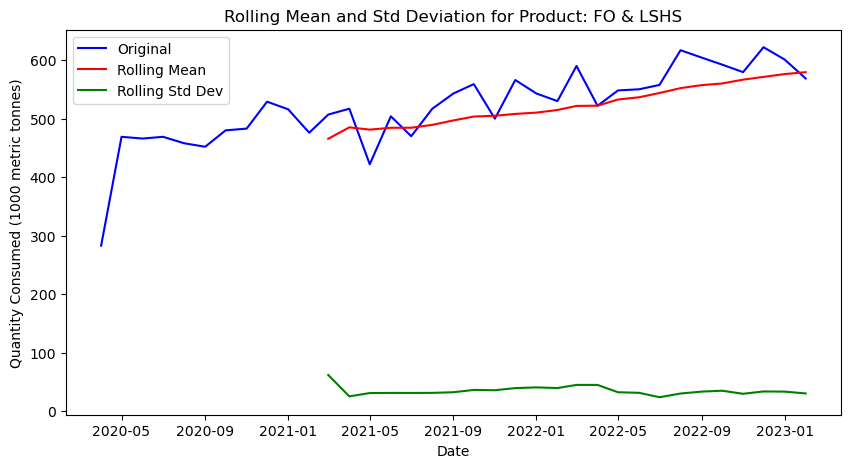

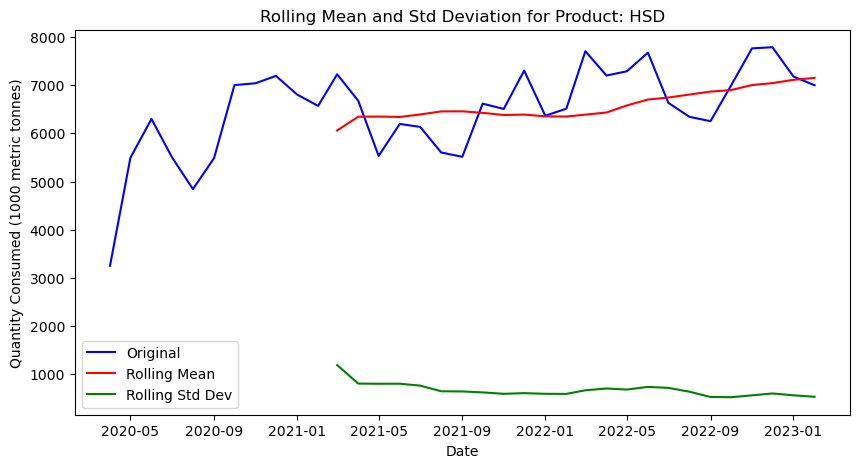

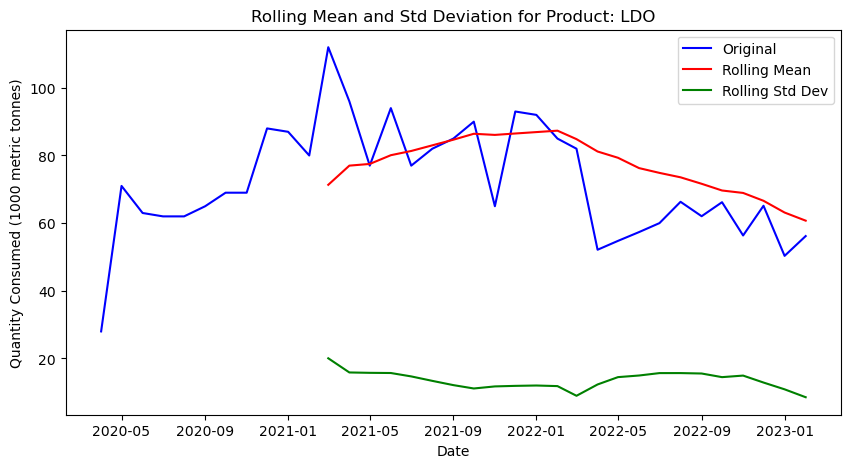

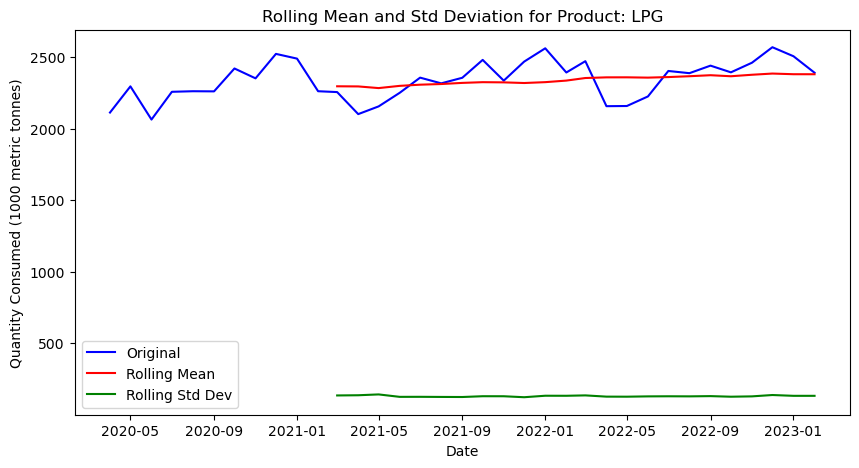

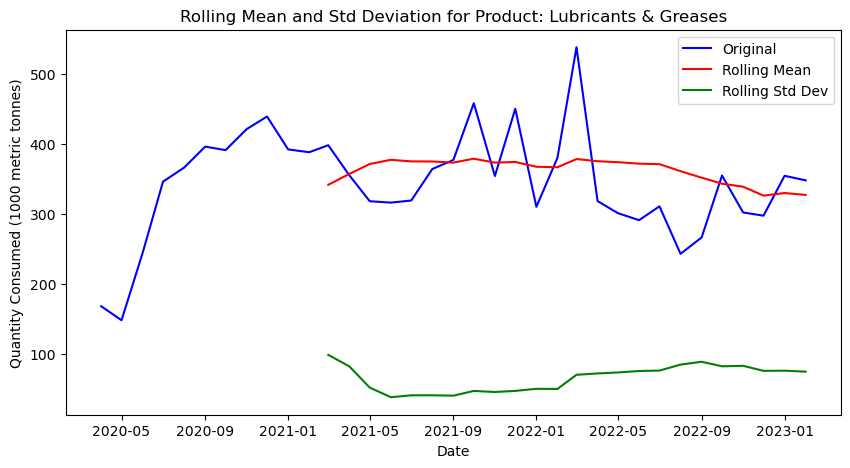

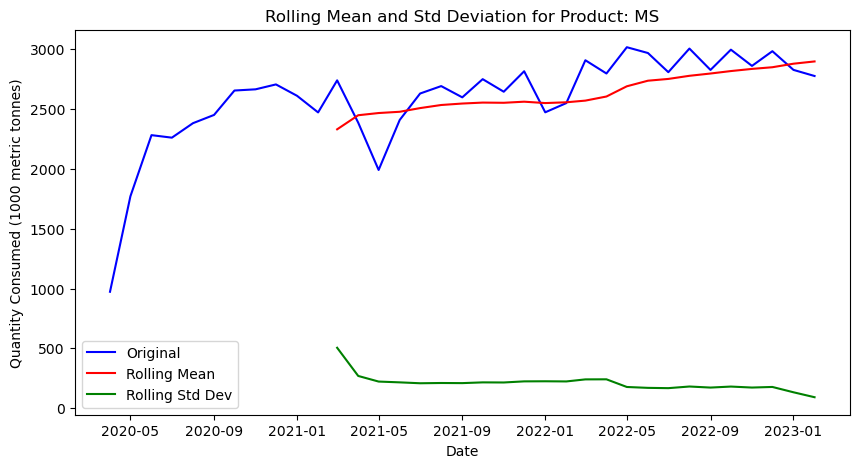

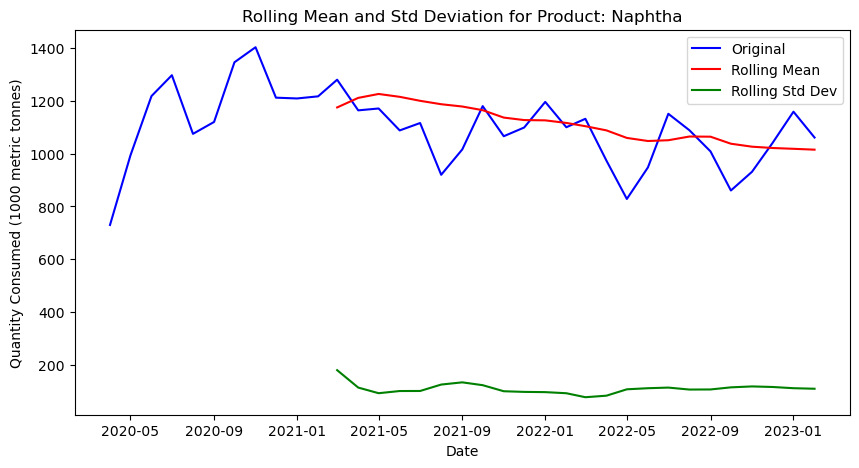

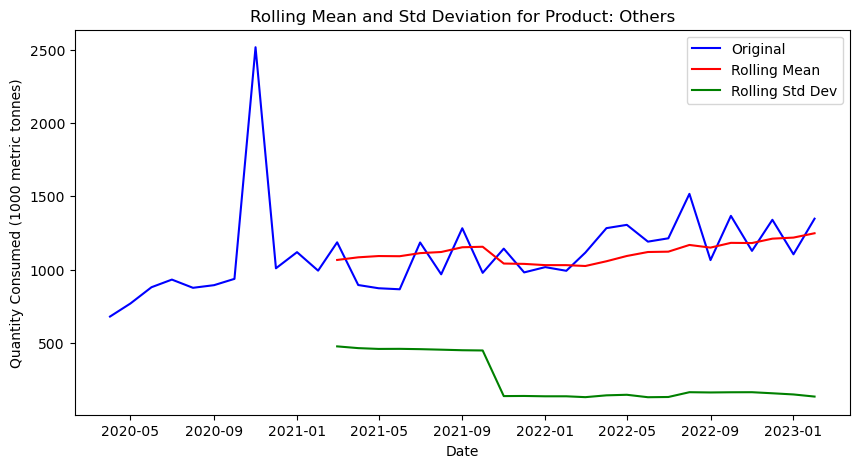

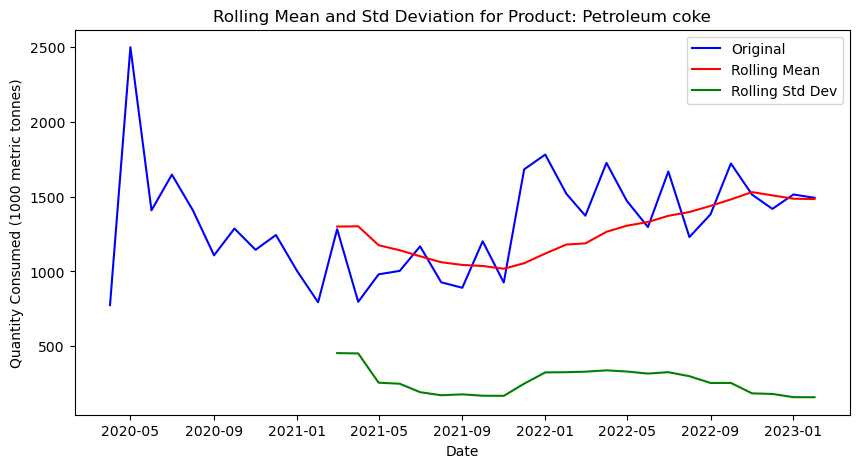

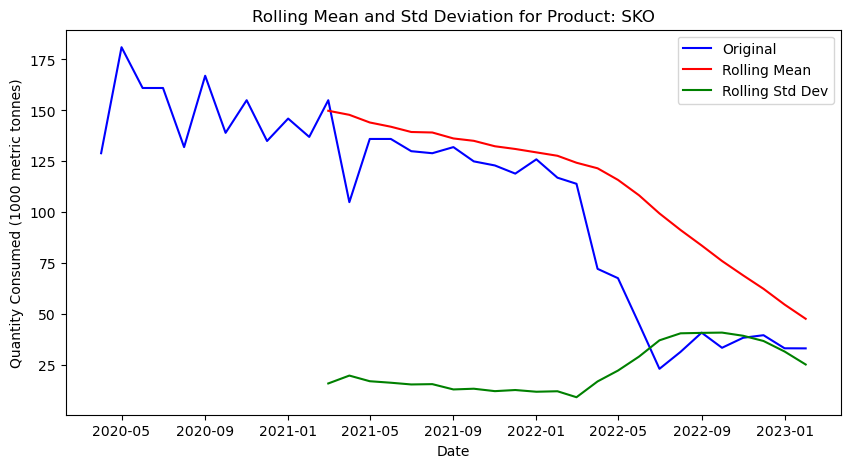

In [23]:
# plot rolling statistics

grouped = df.groupby('products')

# Plot rolling statistics for each product
for product, group in grouped:
    rolmean = group['quantity_in_1000_metric_tonnes'].rolling(window=12).mean()
    rolstd = group['quantity_in_1000_metric_tonnes'].rolling(window=12).std()

    plt.figure(figsize=(10,5))
    plt.plot(group['date'], group['quantity_in_1000_metric_tonnes'], color='blue', label='Original')
    plt.plot(group['date'], rolmean, color='red', label='Rolling Mean')
    plt.plot(group['date'], rolstd, color='green', label='Rolling Std Dev')
    
    # Customize plot
    plt.legend(loc='best')
    plt.title(f'Rolling Mean and Std Deviation for Product: {product}')
    plt.xlabel('Date')
    plt.ylabel('Quantity Consumed (1000 metric tonnes)')
    plt.show(block=False)


**Observation**: data is not stationary.

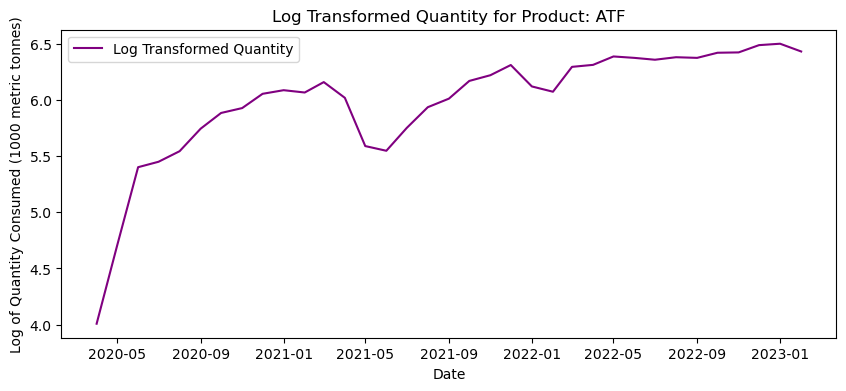

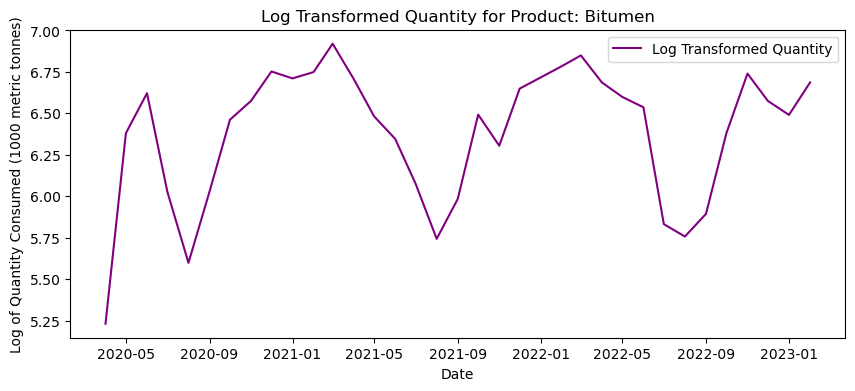

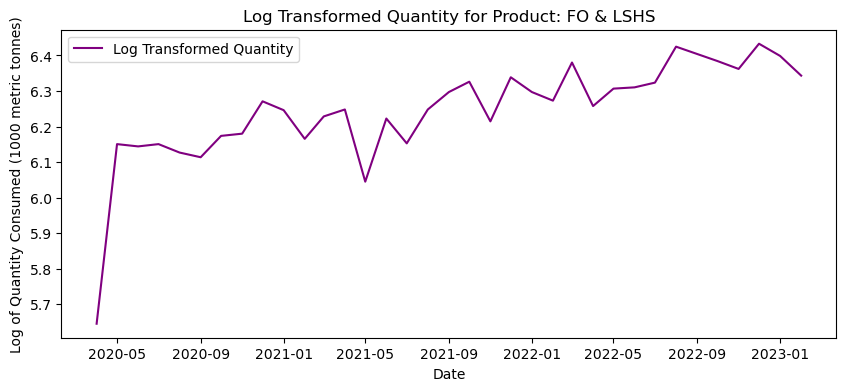

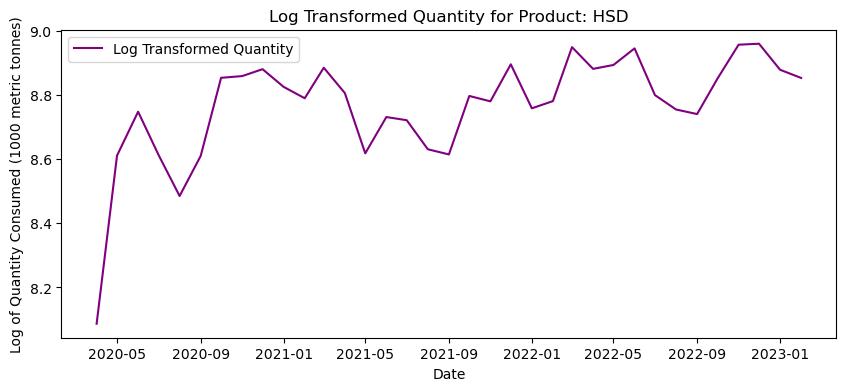

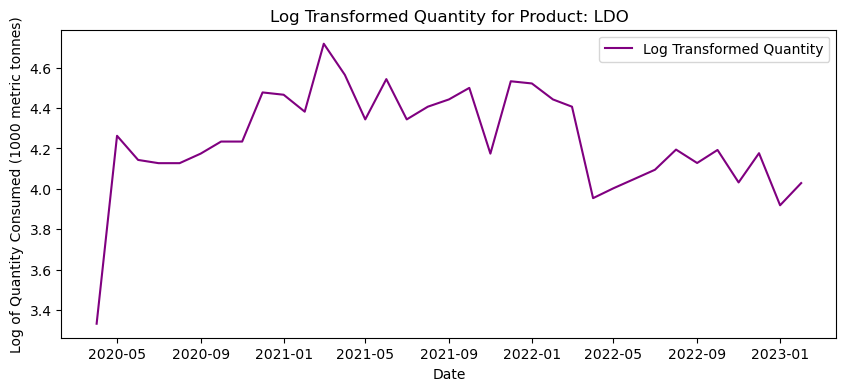

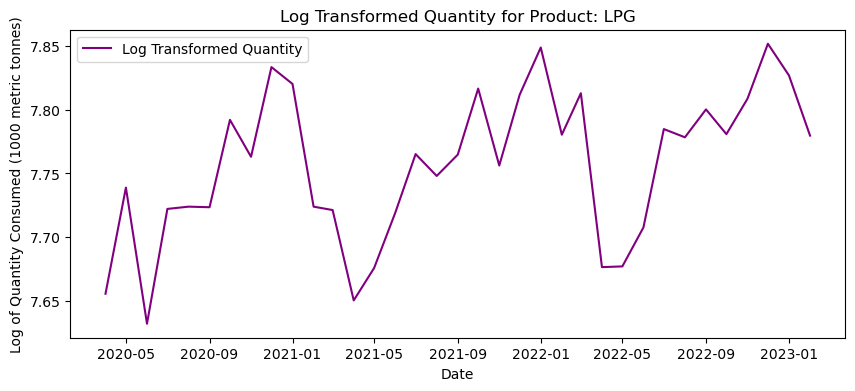

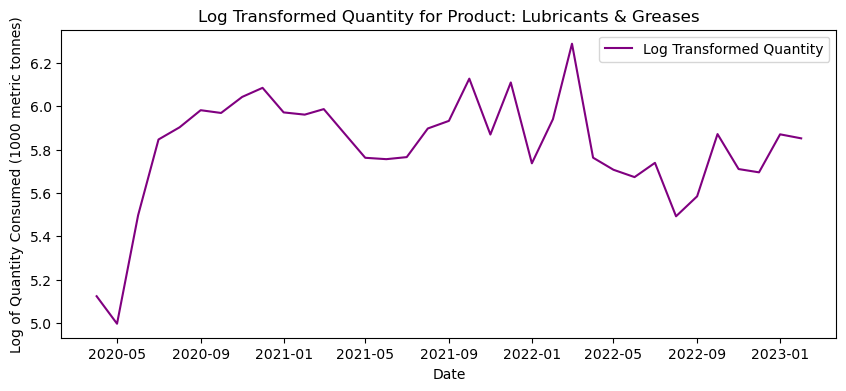

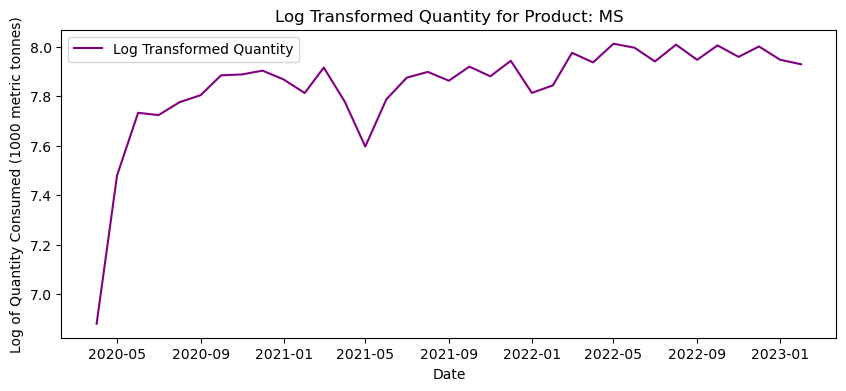

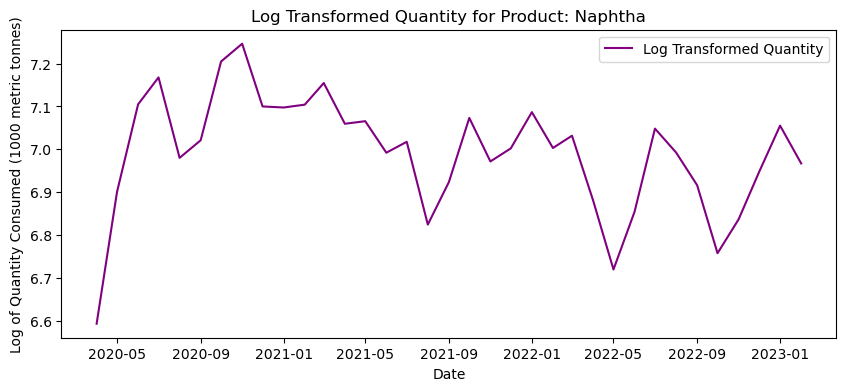

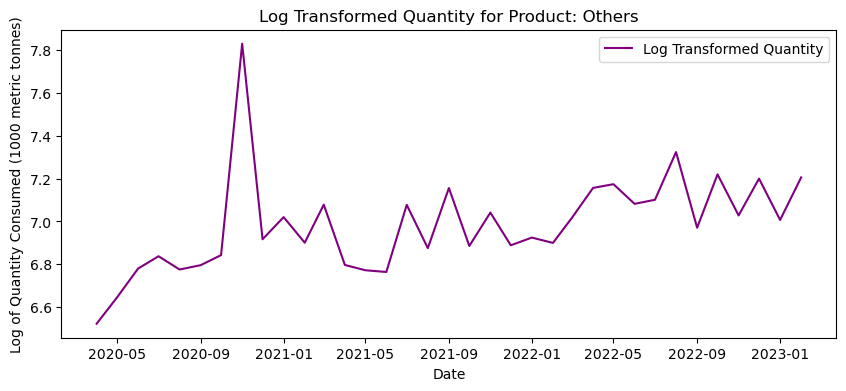

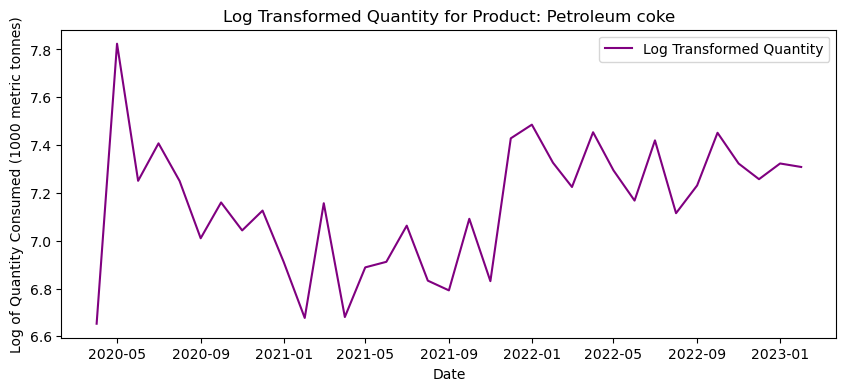

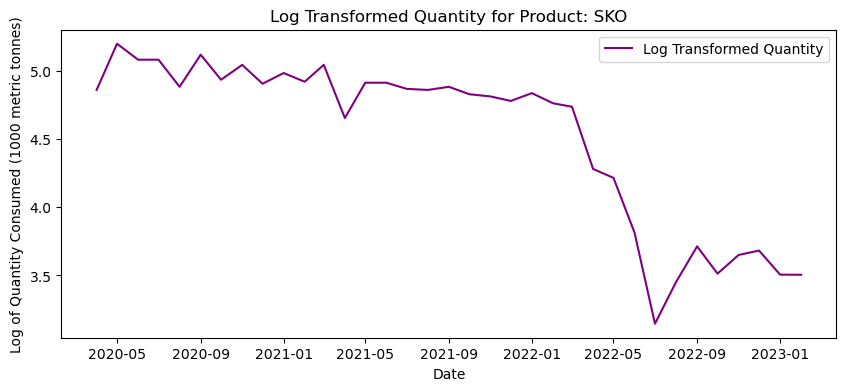

In [25]:
# estimating trend
grouped = df.groupby('products')

for product, group in grouped:
    df_logScale = np.log(group['quantity_in_1000_metric_tonnes'])

    plt.figure(figsize=(10, 4))
    plt.plot(group['date'], df_logScale, label='Log Transformed Quantity', color='purple')
    
    plt.title(f'Log Transformed Quantity for Product: {product}')
    plt.xlabel('Date')
    plt.ylabel('Log of Quantity Consumed (1000 metric tonnes)')
    plt.legend(loc='best')
    plt.show(block=False)


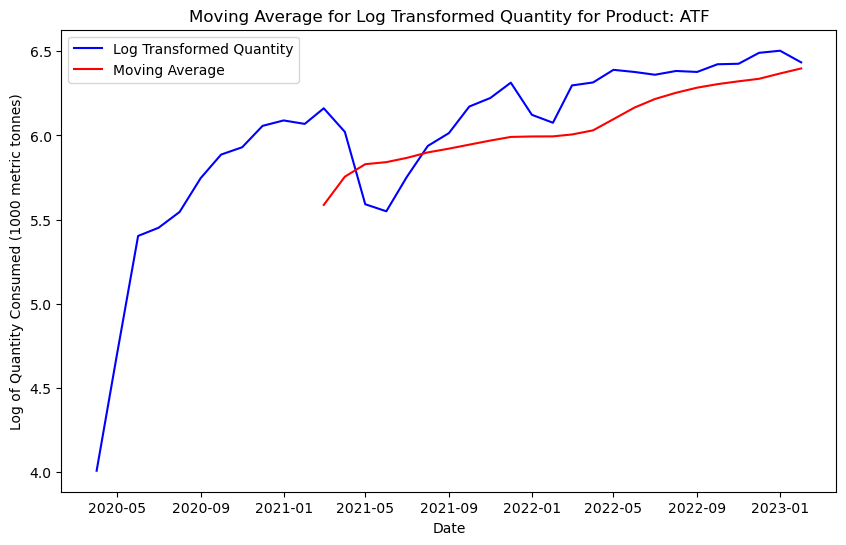

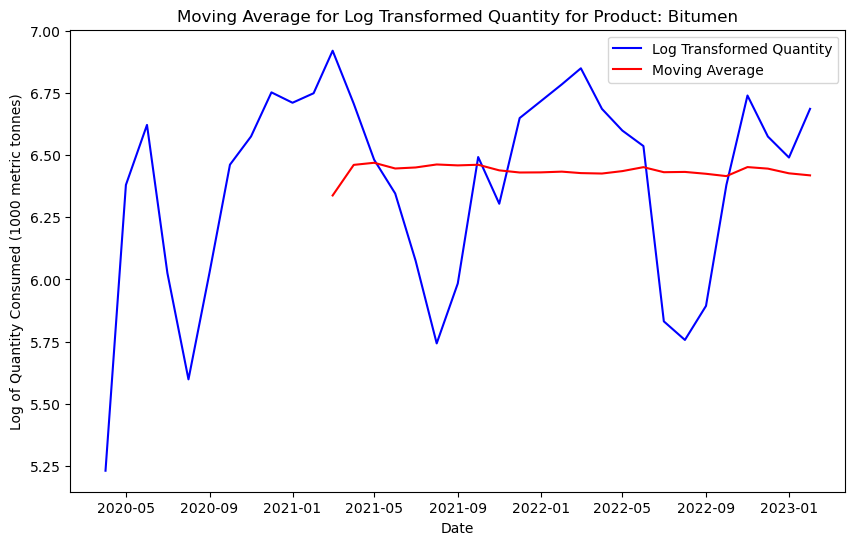

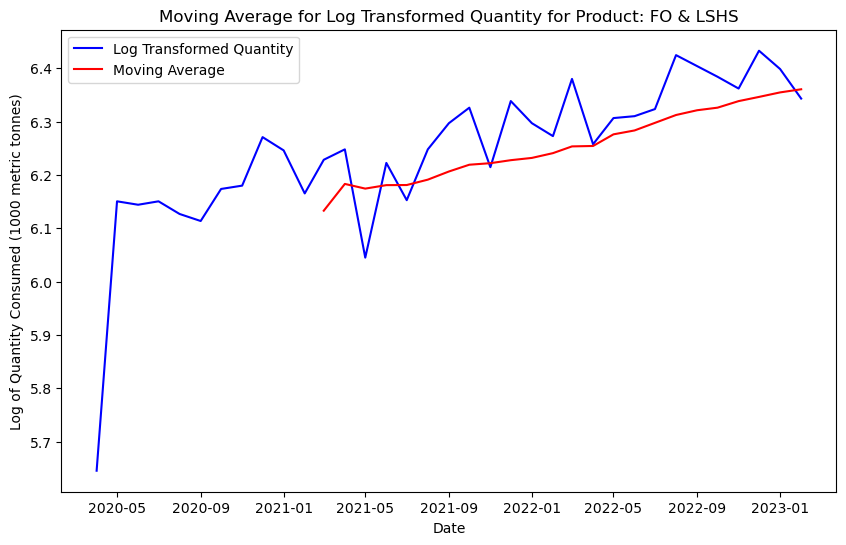

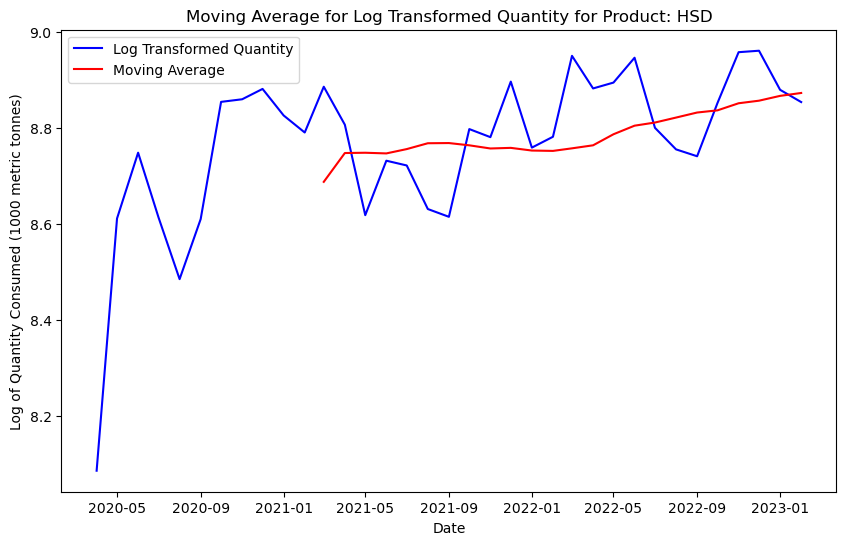

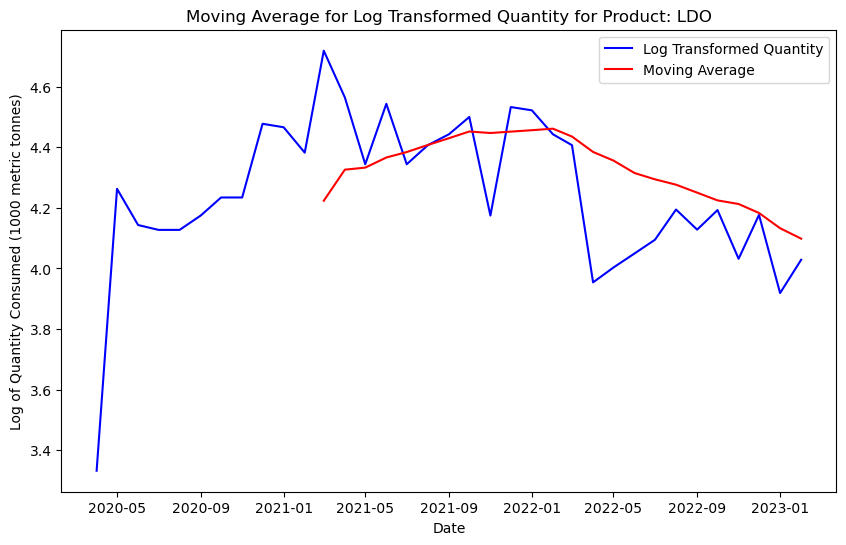

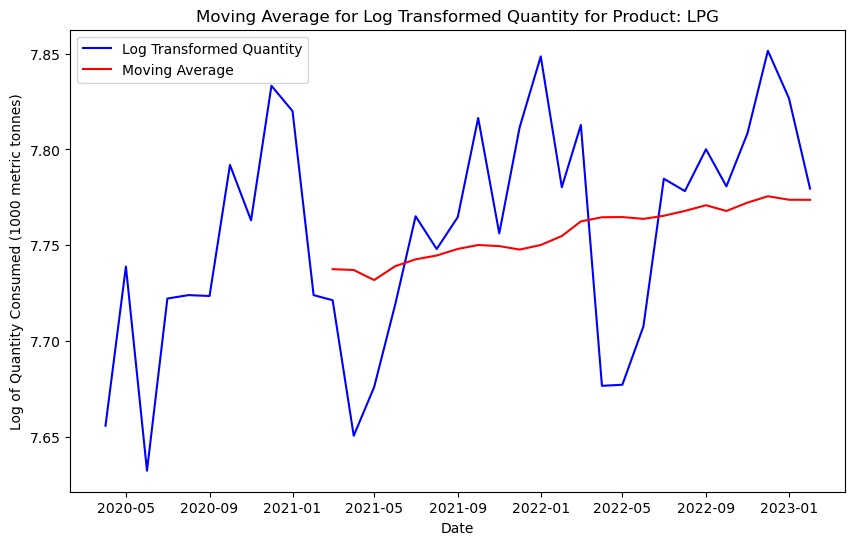

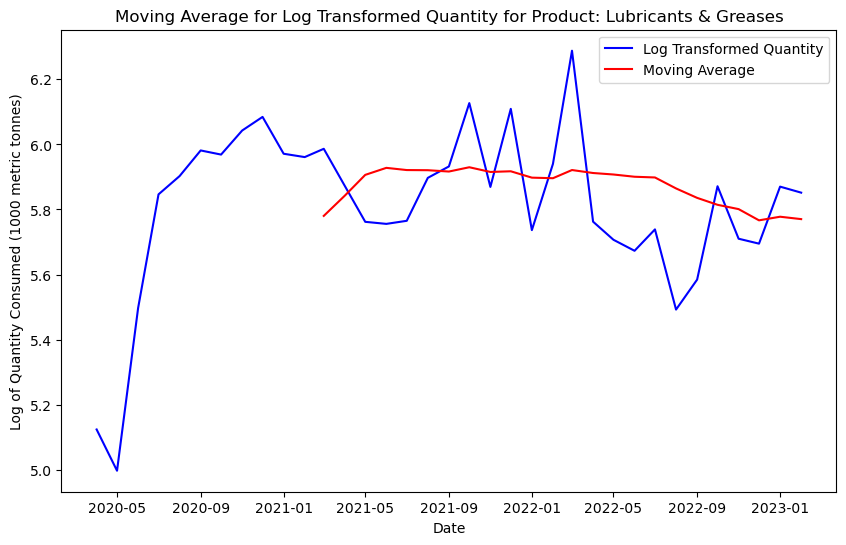

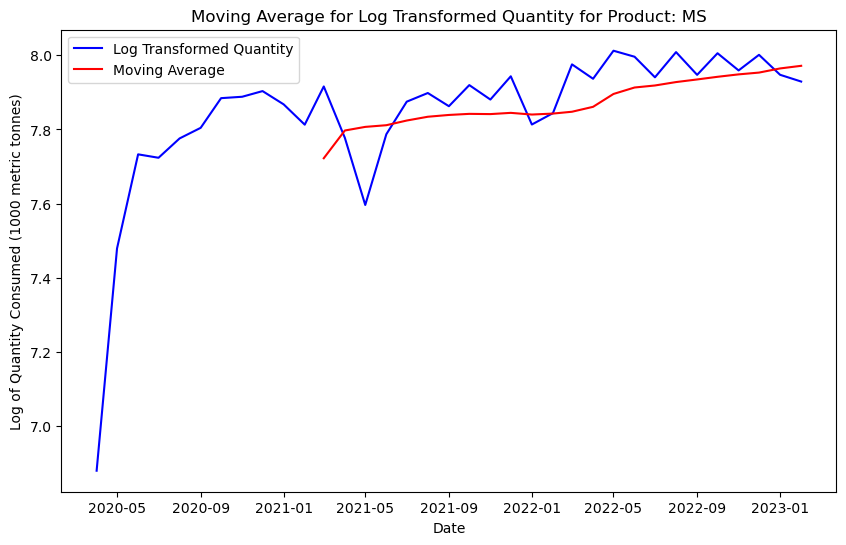

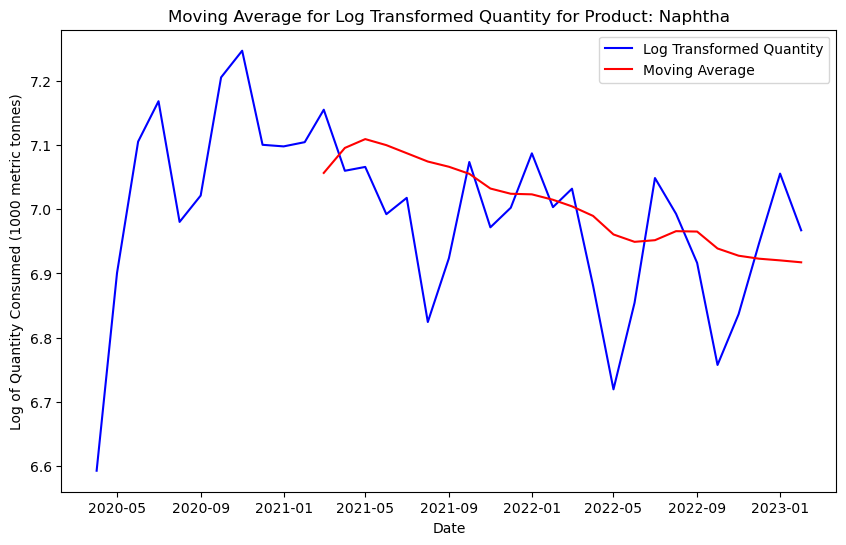

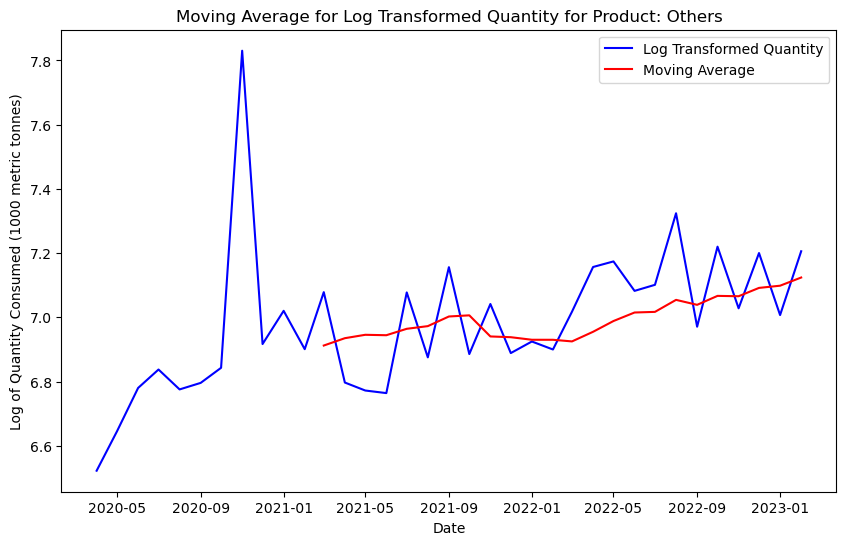

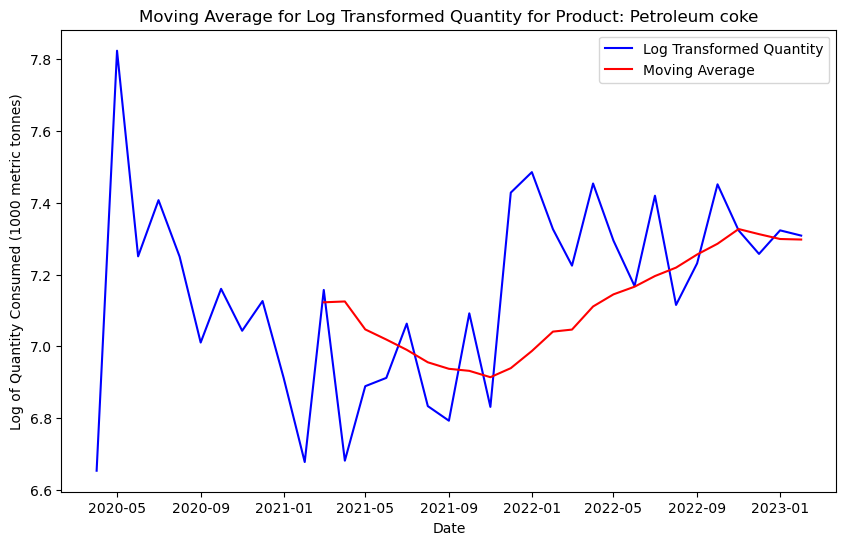

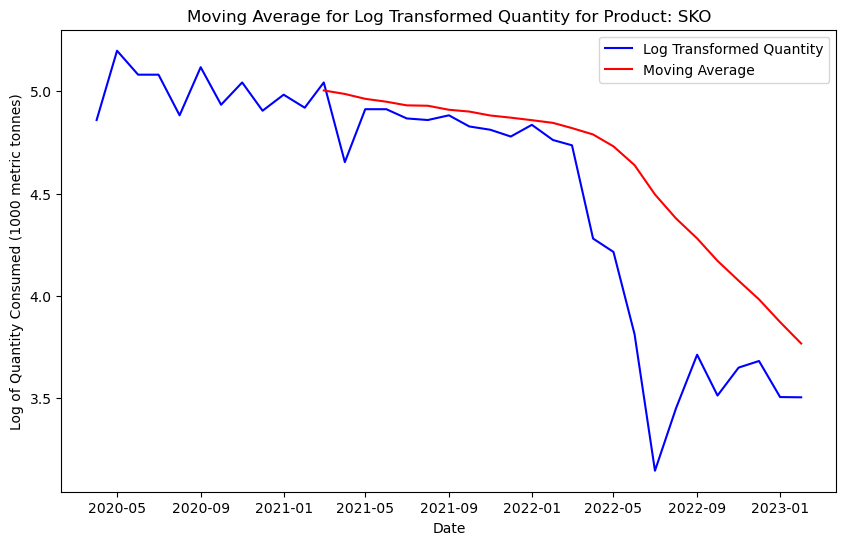

In [26]:
# showing moving average on logarithmic dataframe
# Group by 'product'
grouped = df.groupby('products')

for product, group in grouped:
    df_logScale = np.log(group['quantity_in_1000_metric_tonnes'])

    movingAvg = df_logScale.rolling(window=12).mean()
    movingStd = df_logScale.rolling(window=12).std()

    plt.figure(figsize=(10, 6))
    plt.plot(group['date'], df_logScale, label='Log Transformed Quantity', color='blue')
    plt.plot(group['date'], movingAvg, color='red', label='Moving Average')
    plt.legend(loc='best')
    plt.title(f'Moving Average for Log Transformed Quantity for Product: {product}')
    plt.xlabel('Date')
    plt.ylabel('Log of Quantity Consumed (1000 metric tonnes)')
    plt.show(block=False)


**Observation:** mean graph is lot smoother after we deal with log data instead of normal data

In [28]:
df_logScaleMinusMovingAvg= df_logScale - movingAvg
df_logScaleMinusMovingAvg.head(12)

11          NaN
12          NaN
26          NaN
46          NaN
51          NaN
64          NaN
83          NaN
89          NaN
97          NaN
115         NaN
125         NaN
140    0.039083
Name: quantity_in_1000_metric_tonnes, dtype: float64

In [29]:
# removing NaN values

df_logScaleMinusMovingAvg.dropna(inplace=True)
df_logScaleMinusMovingAvg.head()

140    0.039083
155   -0.333227
164   -0.050712
179   -0.036650
181   -0.063948
Name: quantity_in_1000_metric_tonnes, dtype: float64

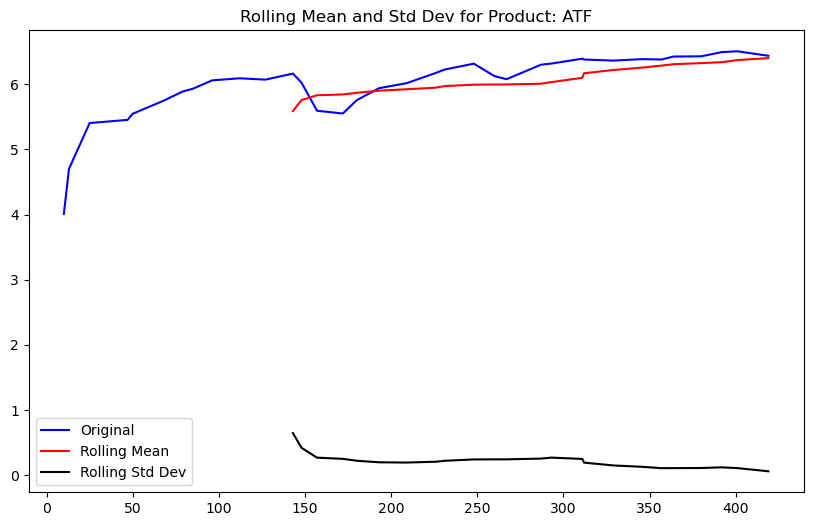

Results of Dickey-Fuller Test for Product: ATF
Test Statistic                 -3.060518
p-value                         0.029616
#Lags Used                      1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


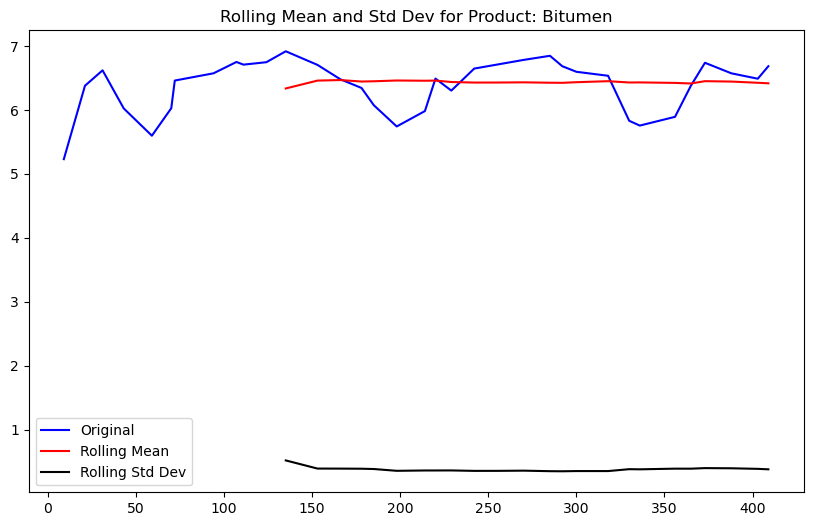

Results of Dickey-Fuller Test for Product: Bitumen
Test Statistic                 -5.437456
p-value                         0.000003
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


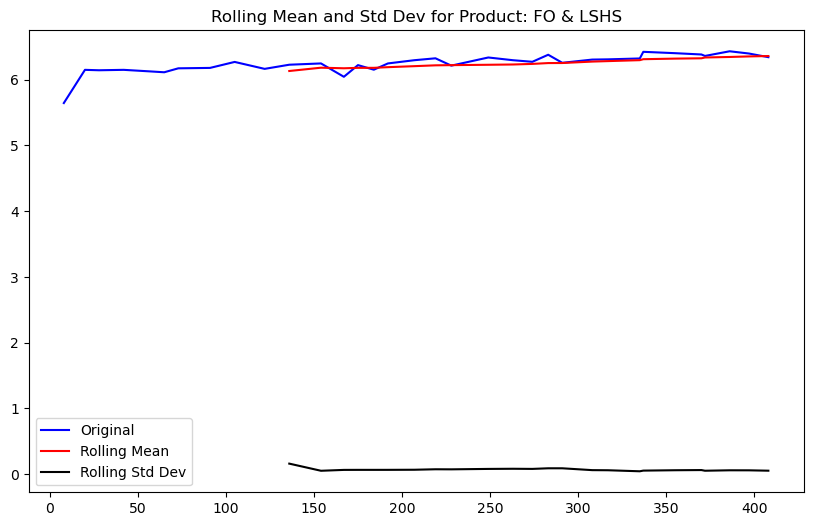

Results of Dickey-Fuller Test for Product: FO & LSHS
Test Statistic                 -1.439425
p-value                         0.563236
#Lags Used                      2.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


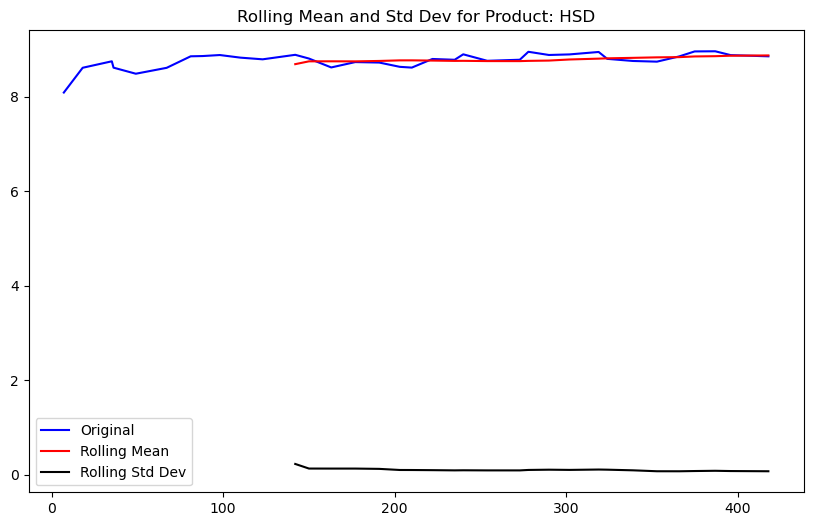

Results of Dickey-Fuller Test for Product: HSD
Test Statistic                -5.768931e+00
p-value                        5.449551e-07
#Lags Used                     0.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


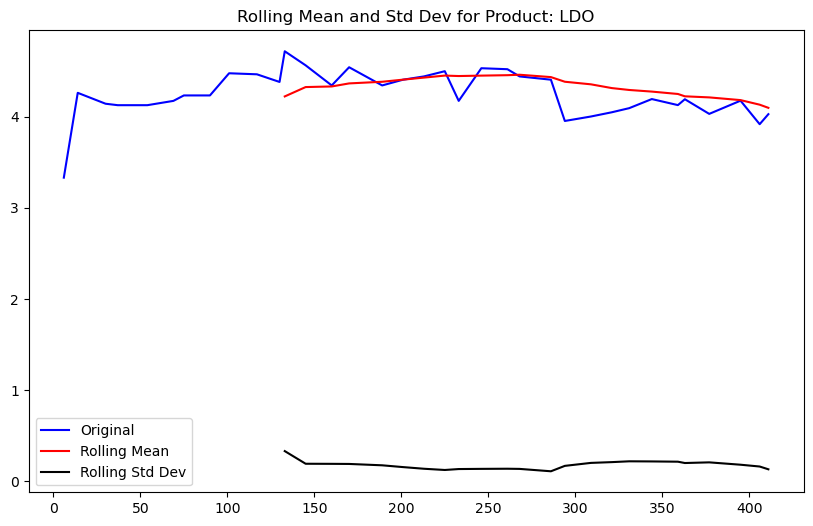

Results of Dickey-Fuller Test for Product: LDO
Test Statistic                 -1.822564
p-value                         0.369318
#Lags Used                      1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


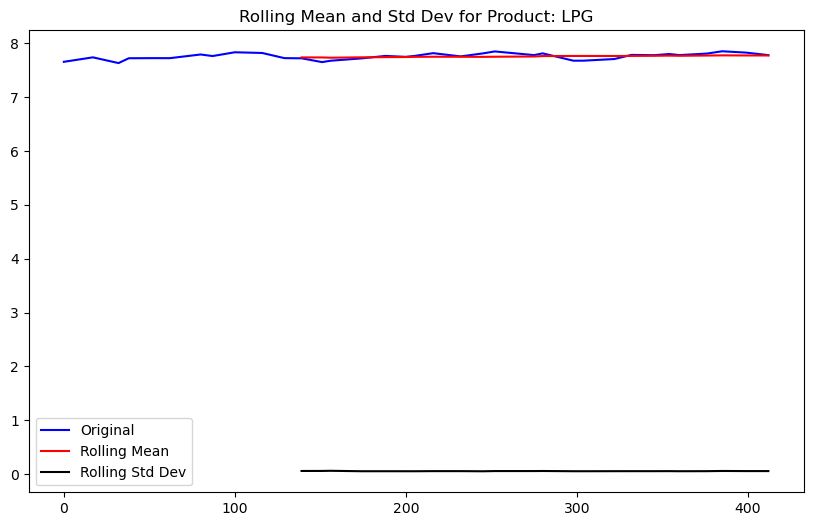

Results of Dickey-Fuller Test for Product: LPG
Test Statistic                 -3.424846
p-value                         0.010140
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


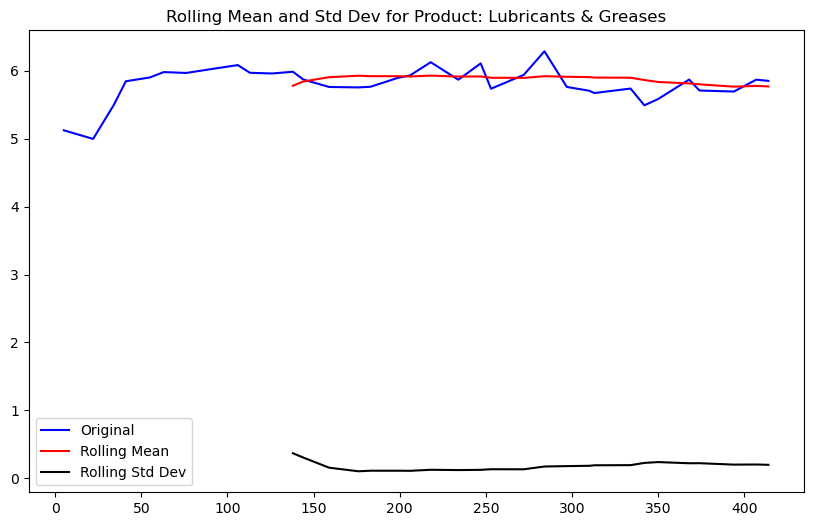

Results of Dickey-Fuller Test for Product: Lubricants & Greases
Test Statistic                 -3.600827
p-value                         0.005745
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


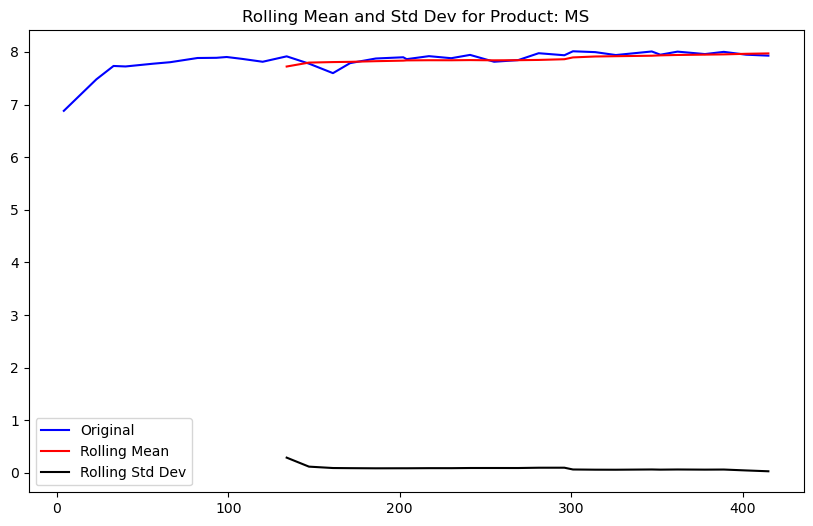

Results of Dickey-Fuller Test for Product: MS
Test Statistic                -9.014106e+00
p-value                        6.015231e-15
#Lags Used                     0.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


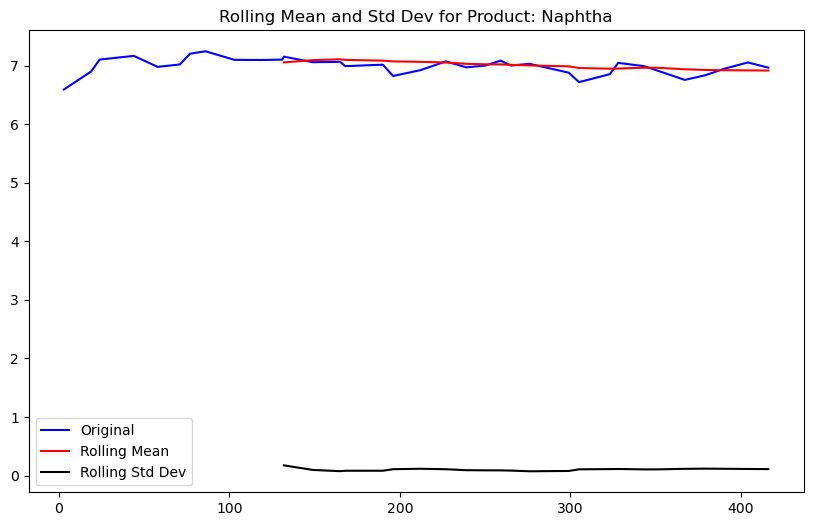

Results of Dickey-Fuller Test for Product: Naphtha
Test Statistic                 -4.129842
p-value                         0.000864
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


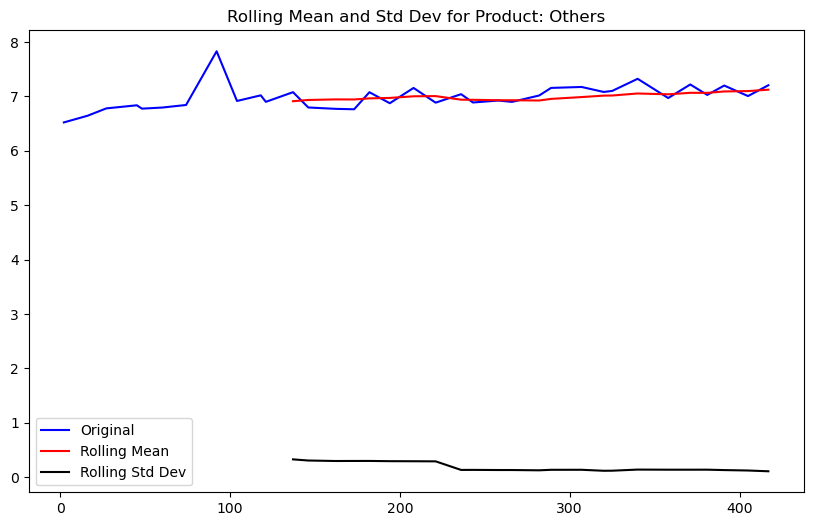

Results of Dickey-Fuller Test for Product: Others
Test Statistic                 -0.199651
p-value                         0.938563
#Lags Used                      7.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


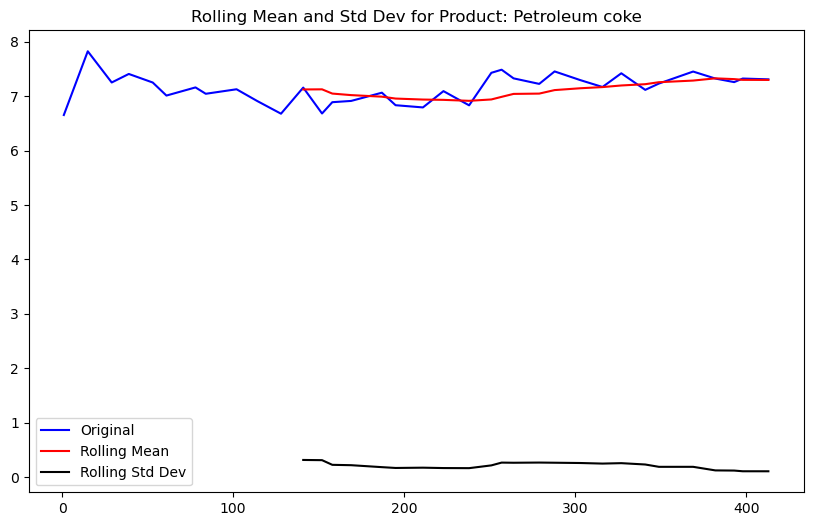

Results of Dickey-Fuller Test for Product: Petroleum coke
Test Statistic                 -2.143890
p-value                         0.227236
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


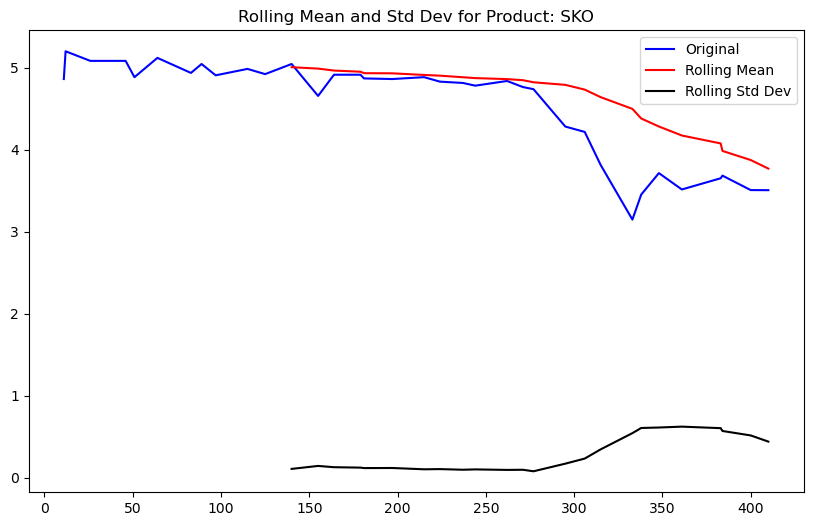

Results of Dickey-Fuller Test for Product: SKO
Test Statistic                 -0.400631
p-value                         0.909993
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [30]:
# Forecasting model

from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

# Function to test stationarity and plot rolling statistics
def test_stationarity(timeseries, product_name):
    # Determining rolling statistics
    movingAvg = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAvg, color='red', label='Rolling Mean')
    plt.plot(movingStd, color='black', label='Rolling Std Dev')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean and Std Dev for Product: {product_name}')
    plt.show(block=False)

    # Perform Dickey-Fuller test
    print(f"Results of Dickey-Fuller Test for Product: {product_name}")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Group by 'product' and apply the stationarity test for each product
grouped = df.groupby('products')

for product, group in grouped:
    # Log-transform the quantity and test stationarity
    df_logScale = np.log(group['quantity_in_1000_metric_tonnes'])
    test_stationarity(df_logScale, product_name=product)



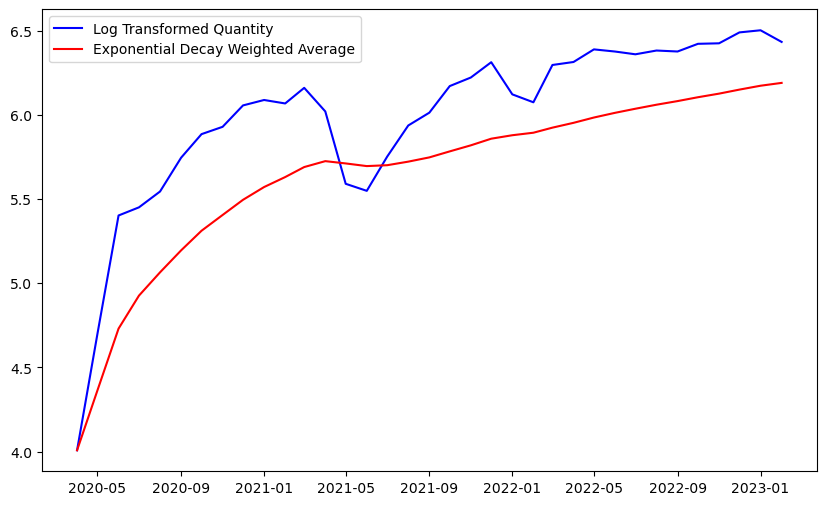

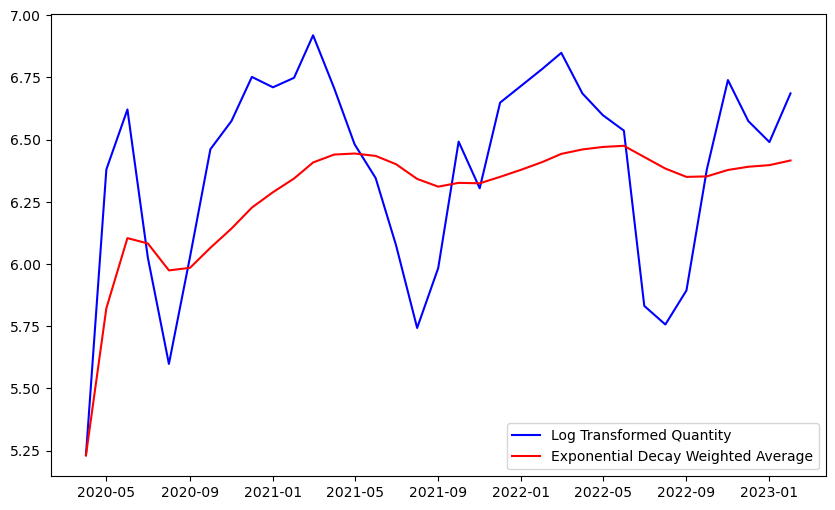

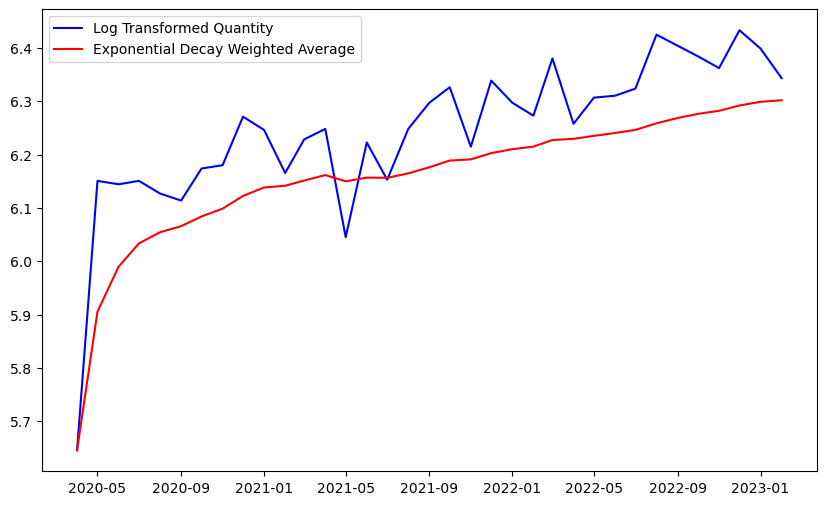

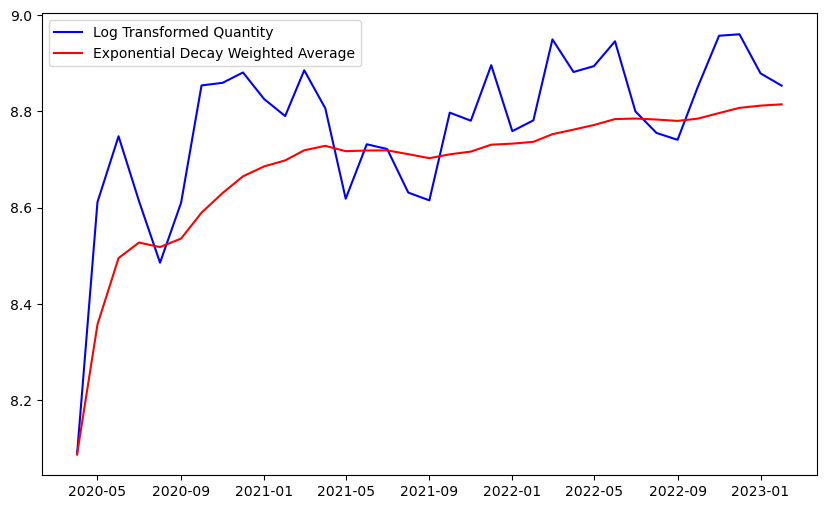

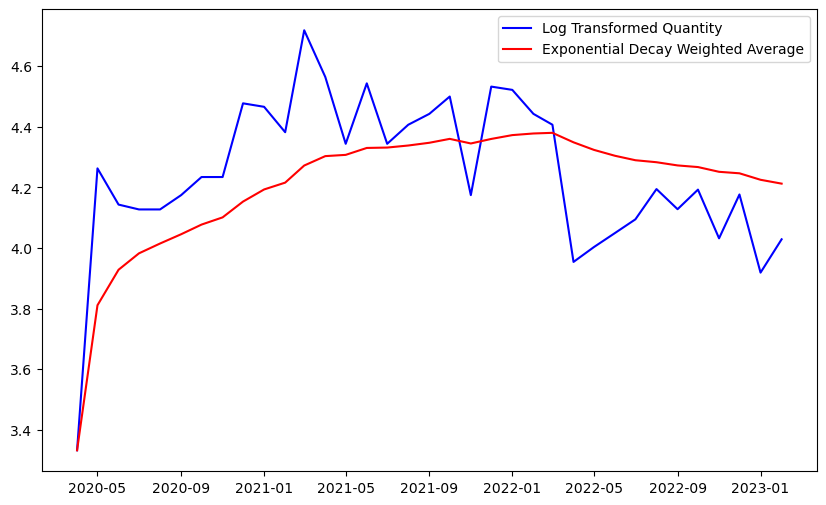

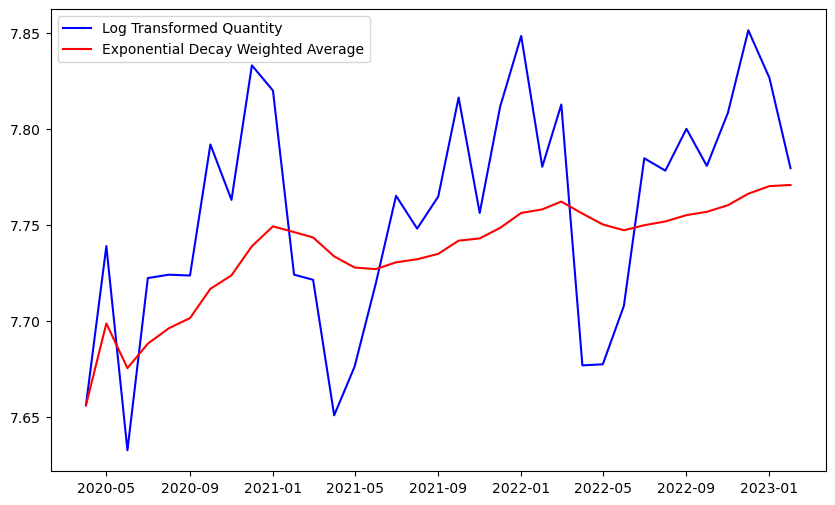

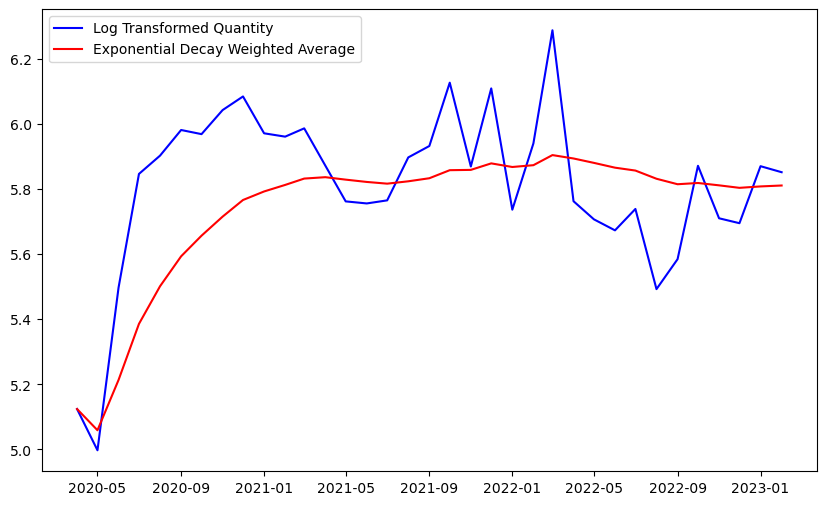

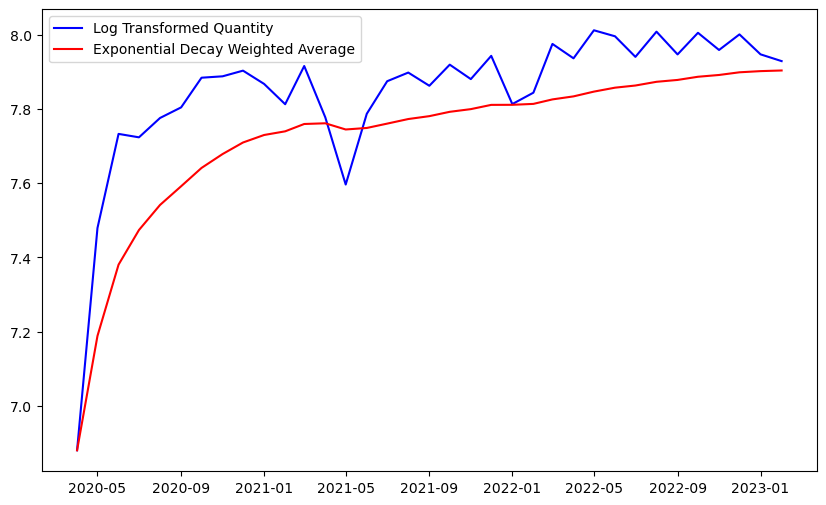

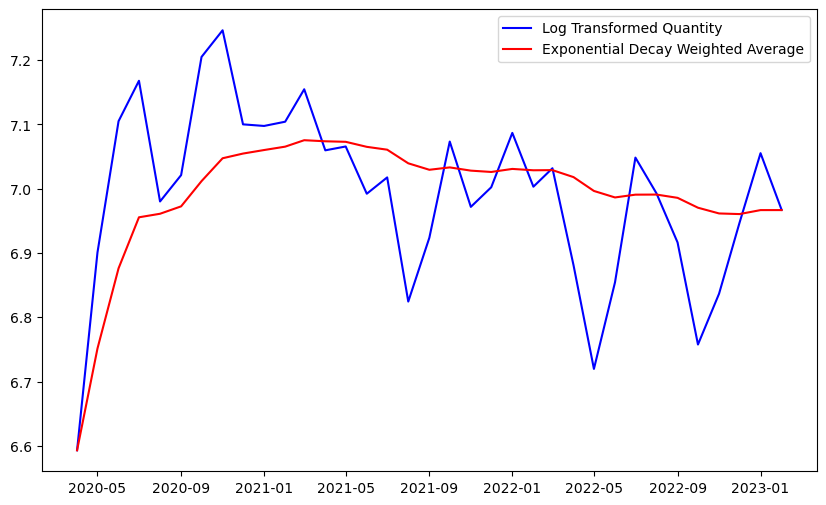

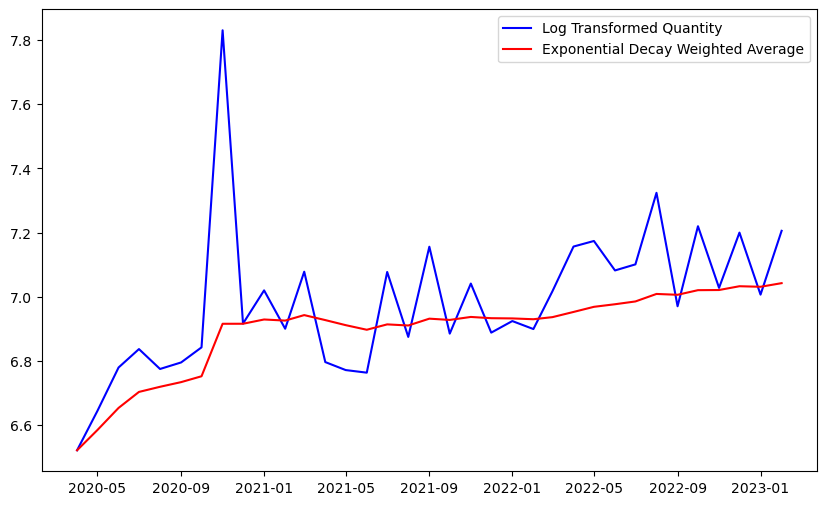

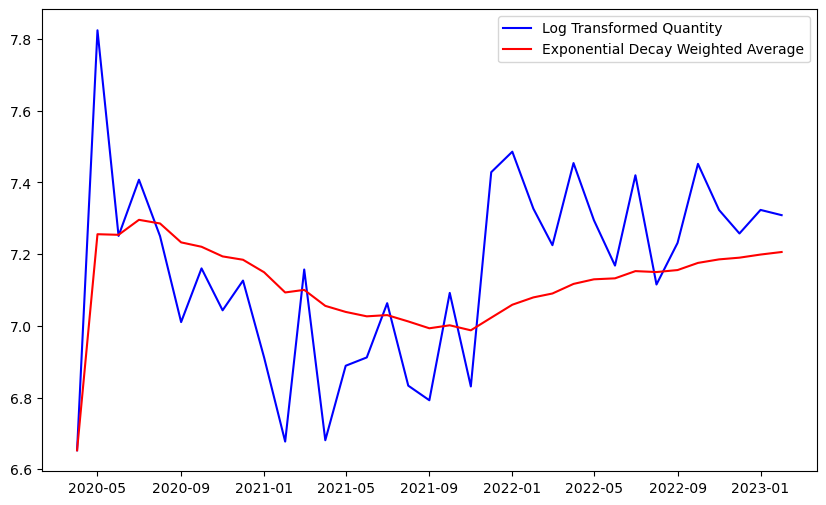

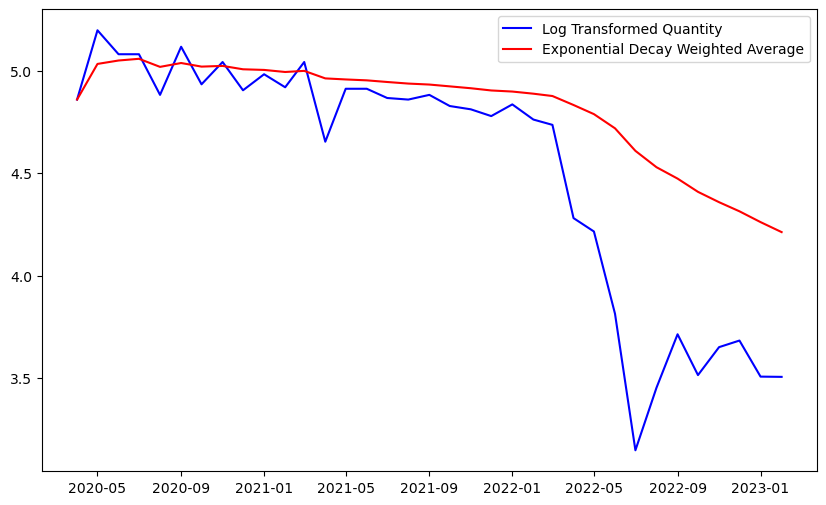

In [31]:
#applying exponential decay weighted average for each product
grouped = df.groupby('products')

for product, group in grouped:
    df_logScale = np.log(group['quantity_in_1000_metric_tonnes'])
    # Calculate exponential decay weighted average
    exponentialDecayWeightAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(group['date'], df_logScale, label='Log Transformed Quantity', color='blue')
    plt.plot(group['date'], exponentialDecayWeightAverage, color='red', label='Exponential Decay Weighted Average')
    
    # Customize plot
    plt.legend(loc='best')


**Observation:** As time series progresses, mean increases goes as series increases.

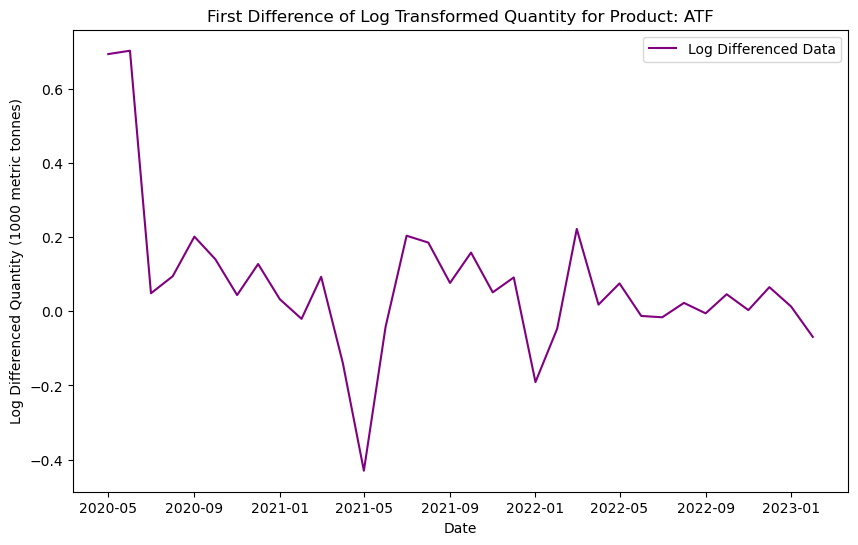

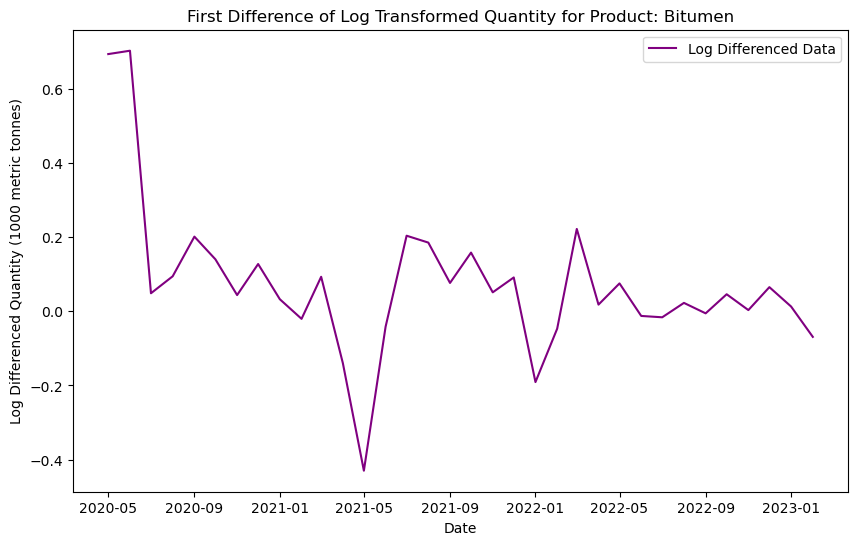

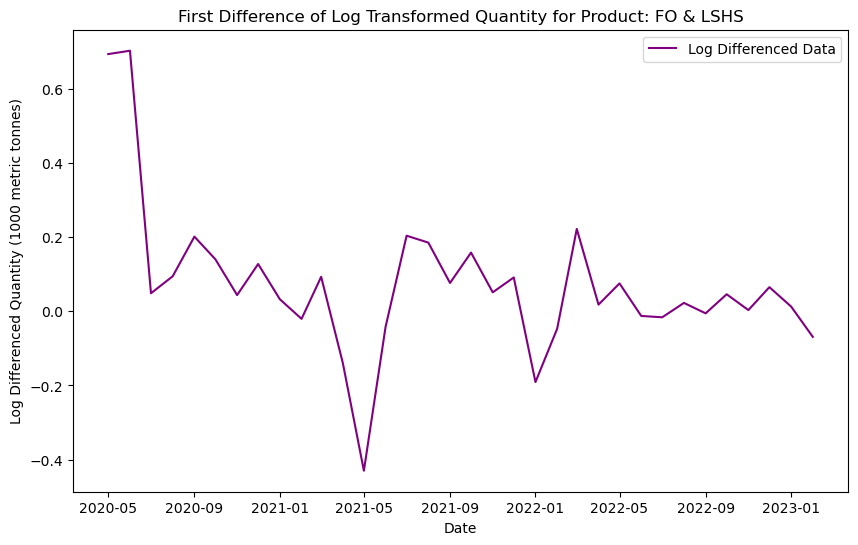

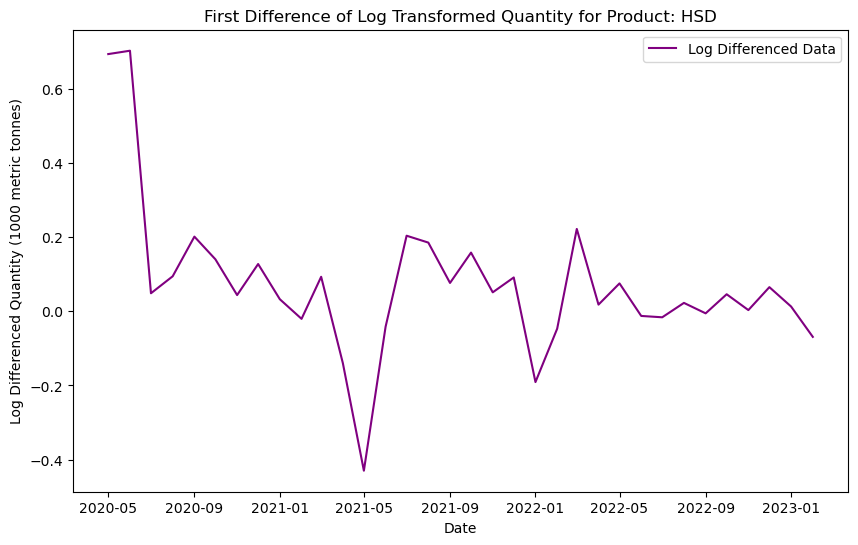

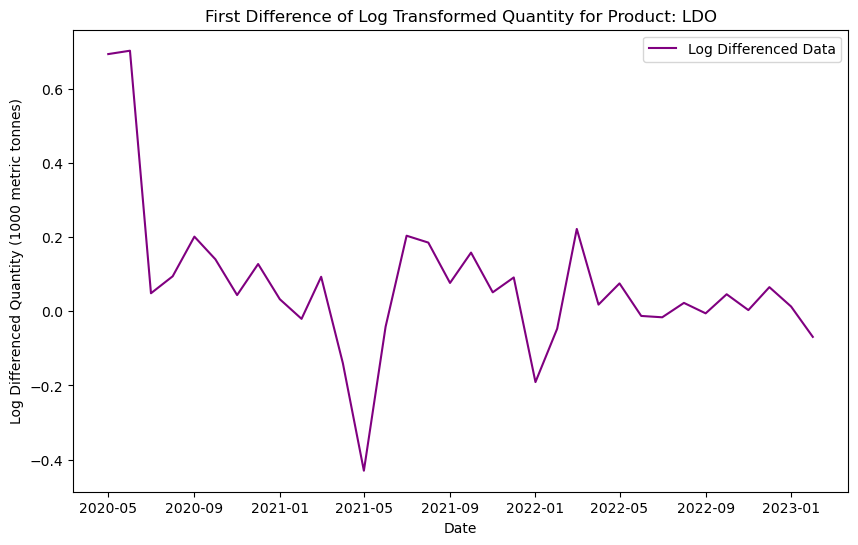

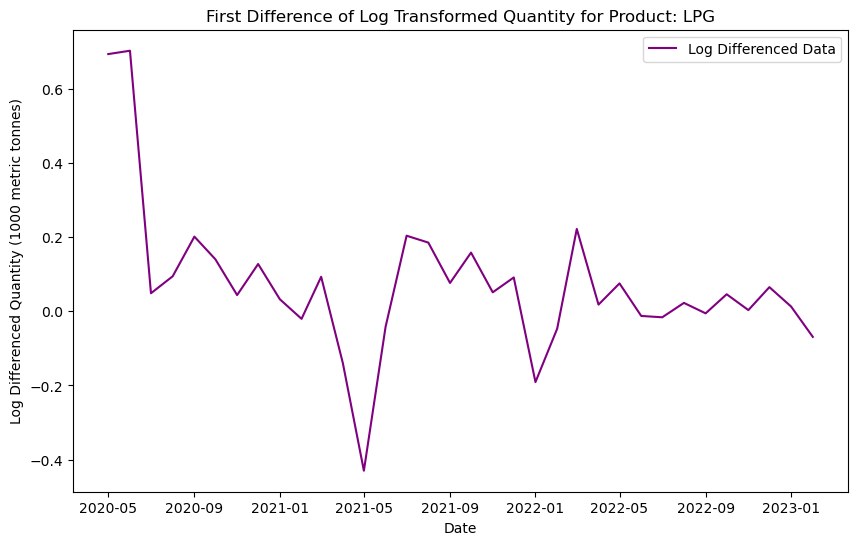

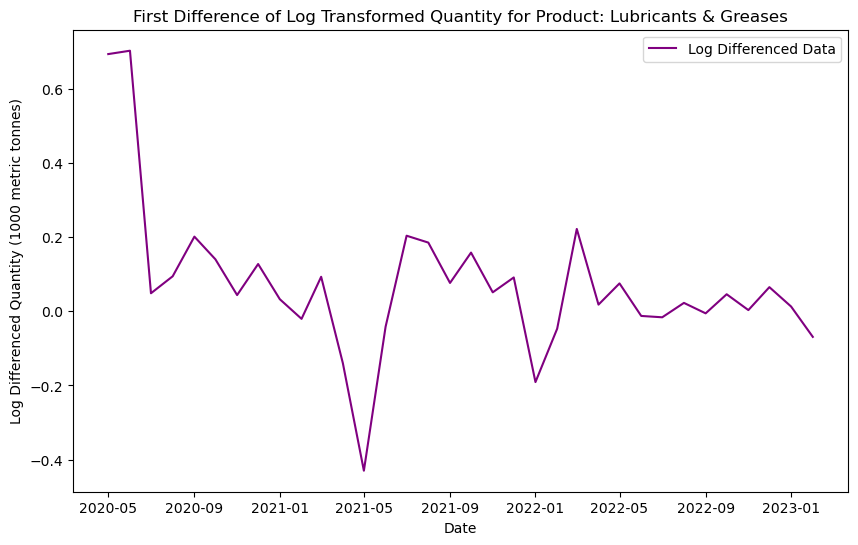

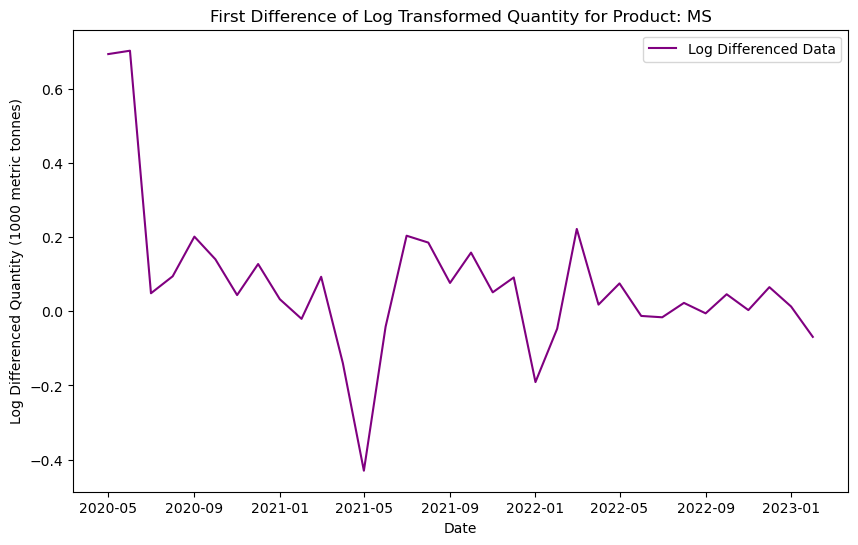

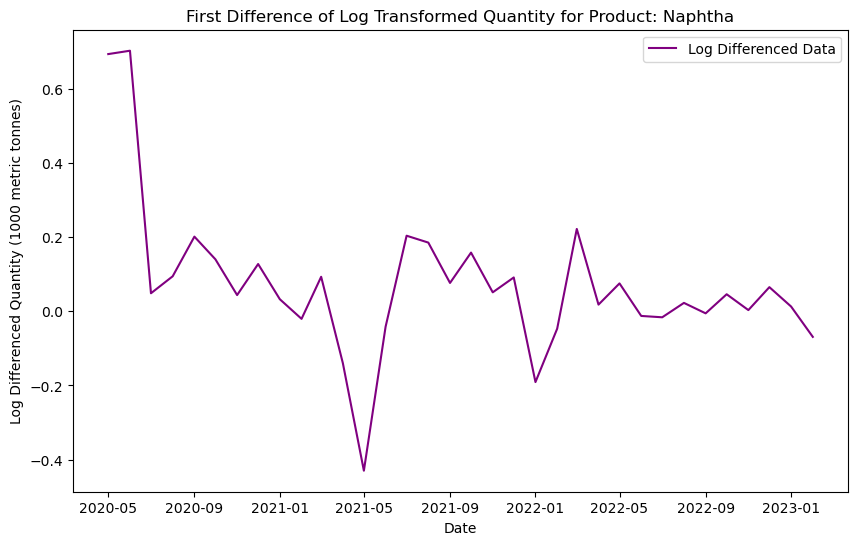

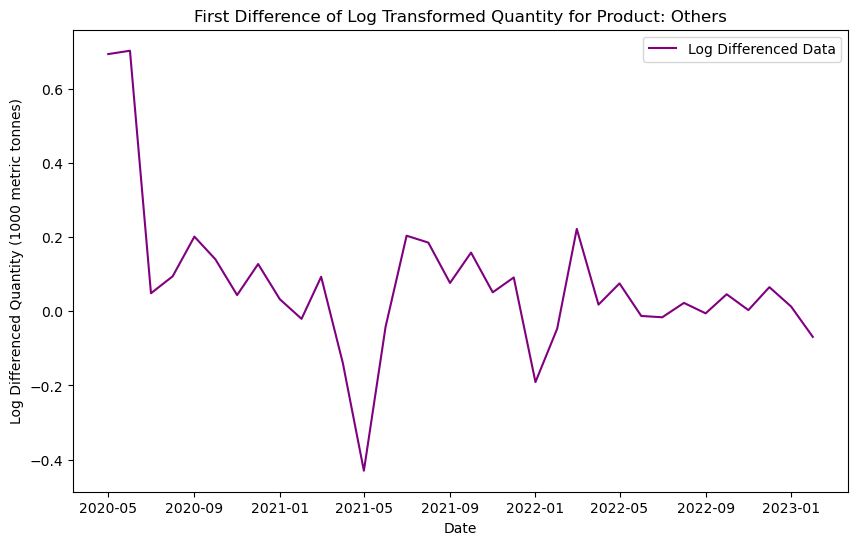

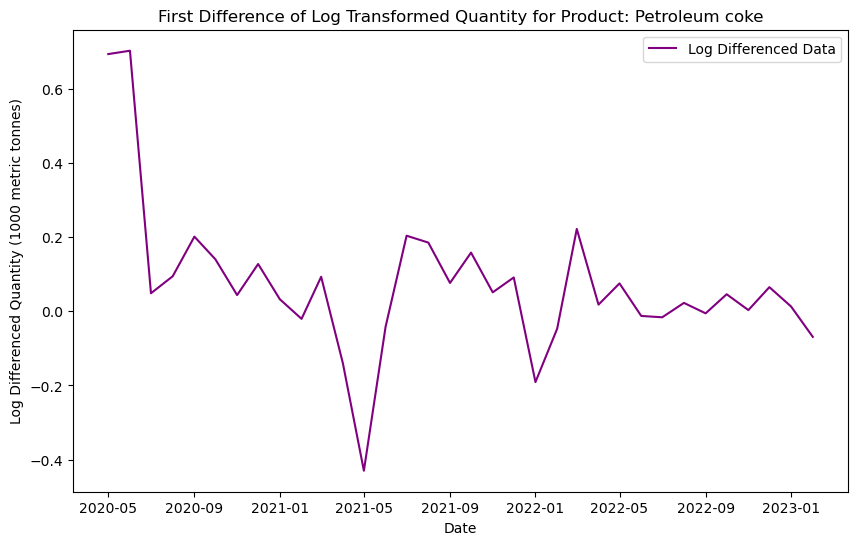

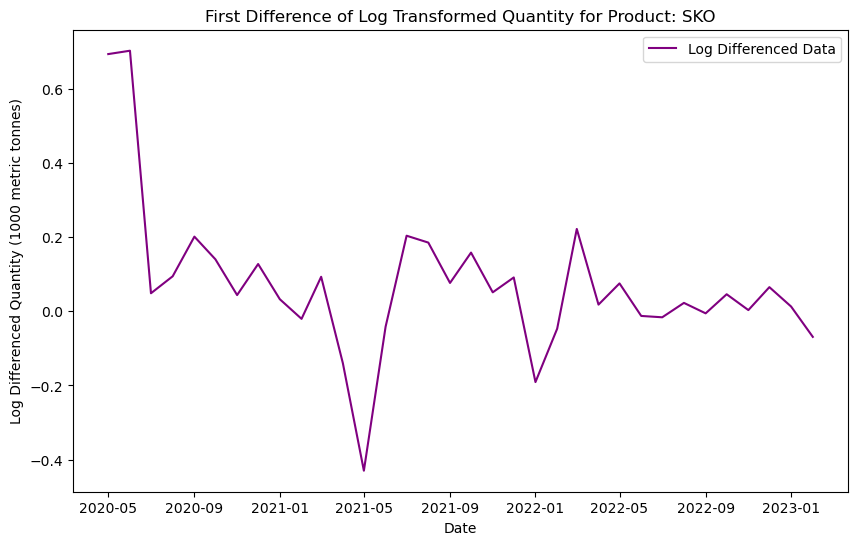

In [42]:
grouped = df.groupby('products')

for product, group in grouped:

    # Calculate the first difference to remove trend
    dataLogDiffShifting = df_logScale - df_logScale.shift()

    # Drop any NaN values that may have resulted from the shift
    dataLogDiffShifting = dataLogDiffShifting.dropna()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(group['date'][1:], dataLogDiffShifting, label='Log Differenced Data', color='purple')
    plt.title(f'First Difference of Log Transformed Quantity for Product: {product}')
    plt.xlabel('Date')
    plt.ylabel('Log Differenced Quantity (1000 metric tonnes)')
    plt.legend(loc='best')
    plt.show(block=False)


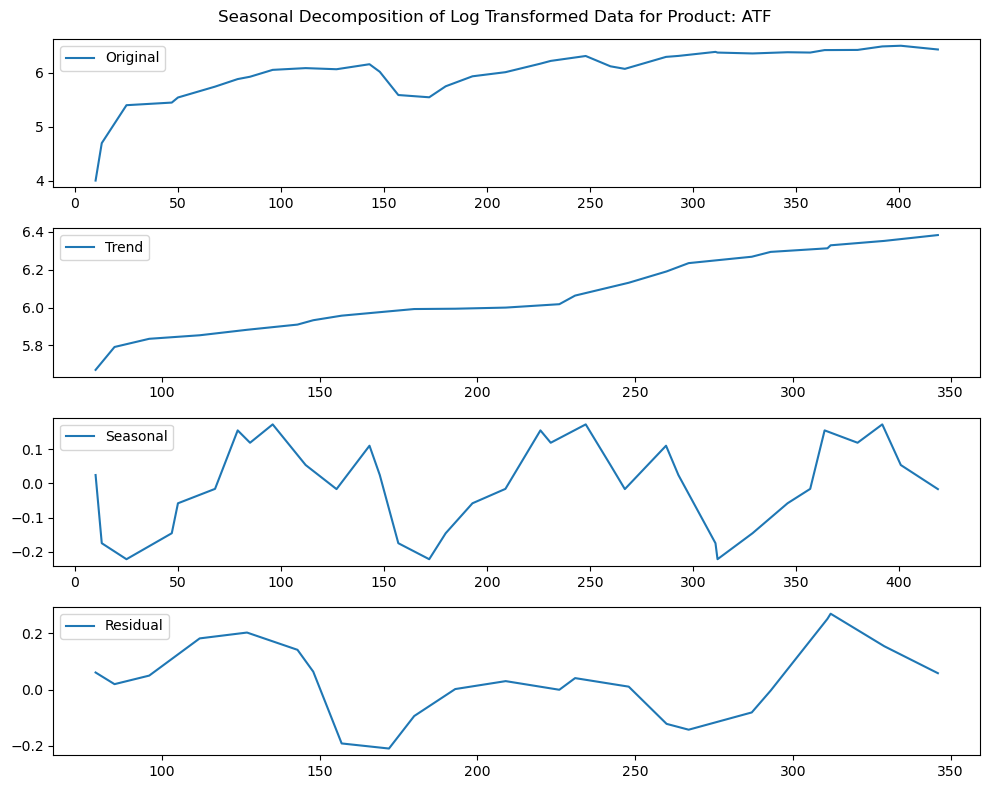


Stationarity Test for Residuals of Product: ATF


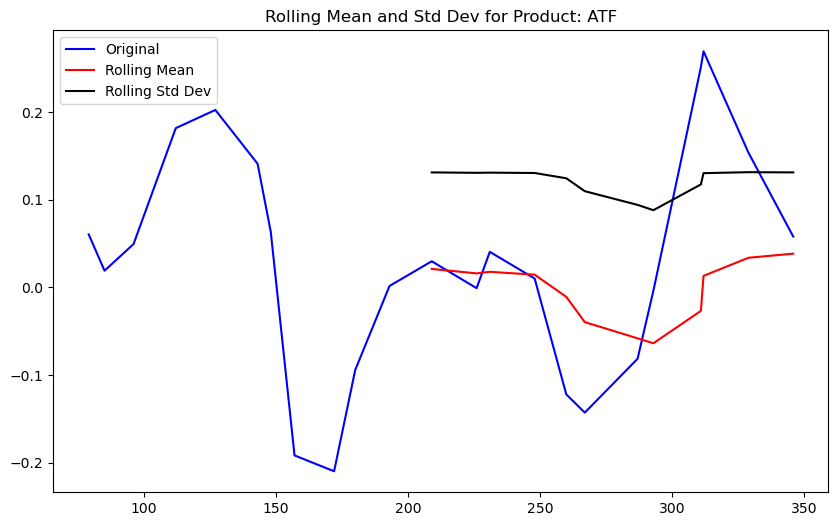

Results of Dickey-Fuller Test for Product: ATF
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


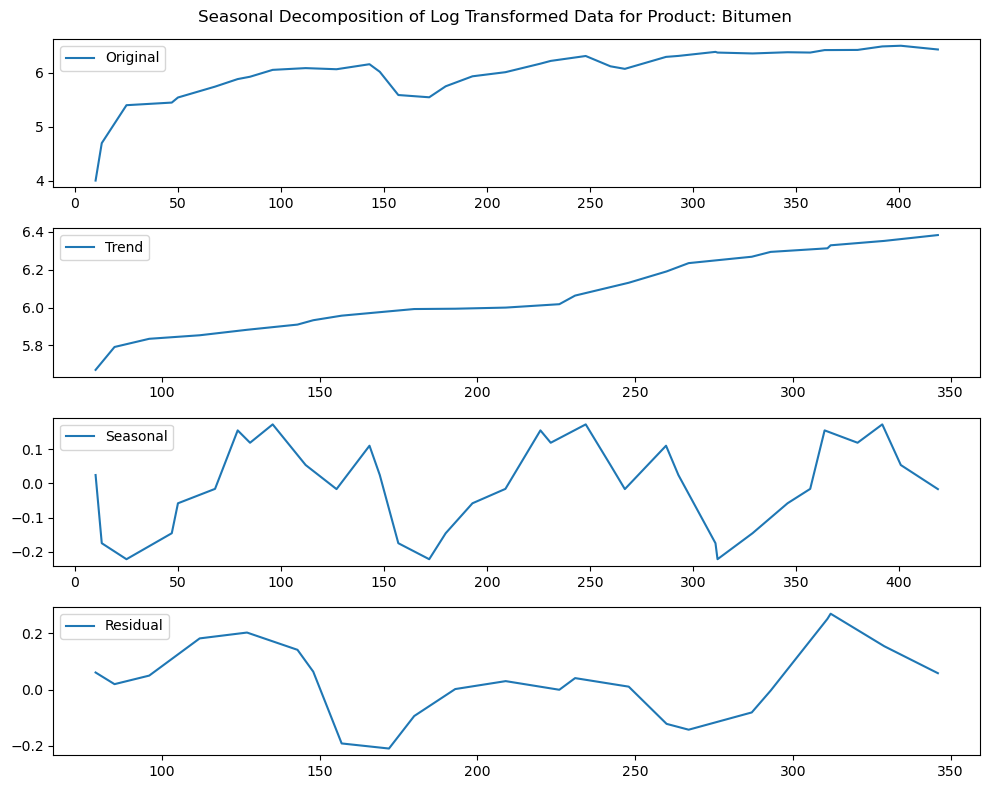


Stationarity Test for Residuals of Product: Bitumen


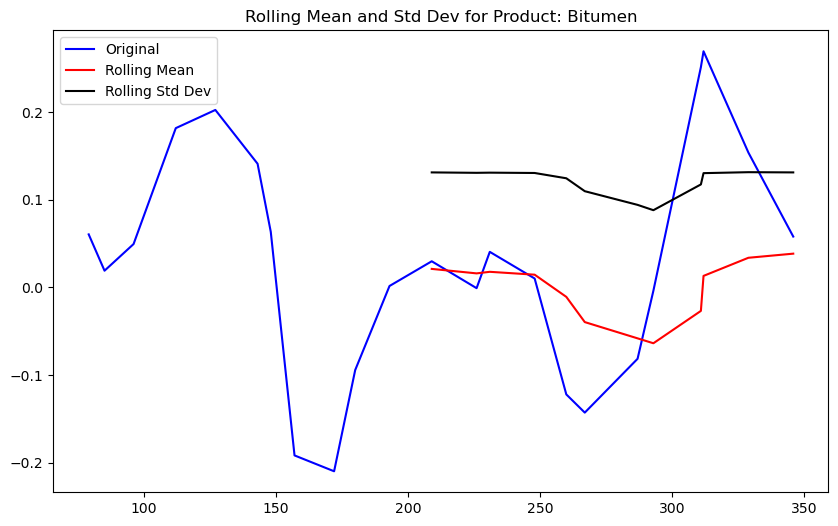

Results of Dickey-Fuller Test for Product: Bitumen
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


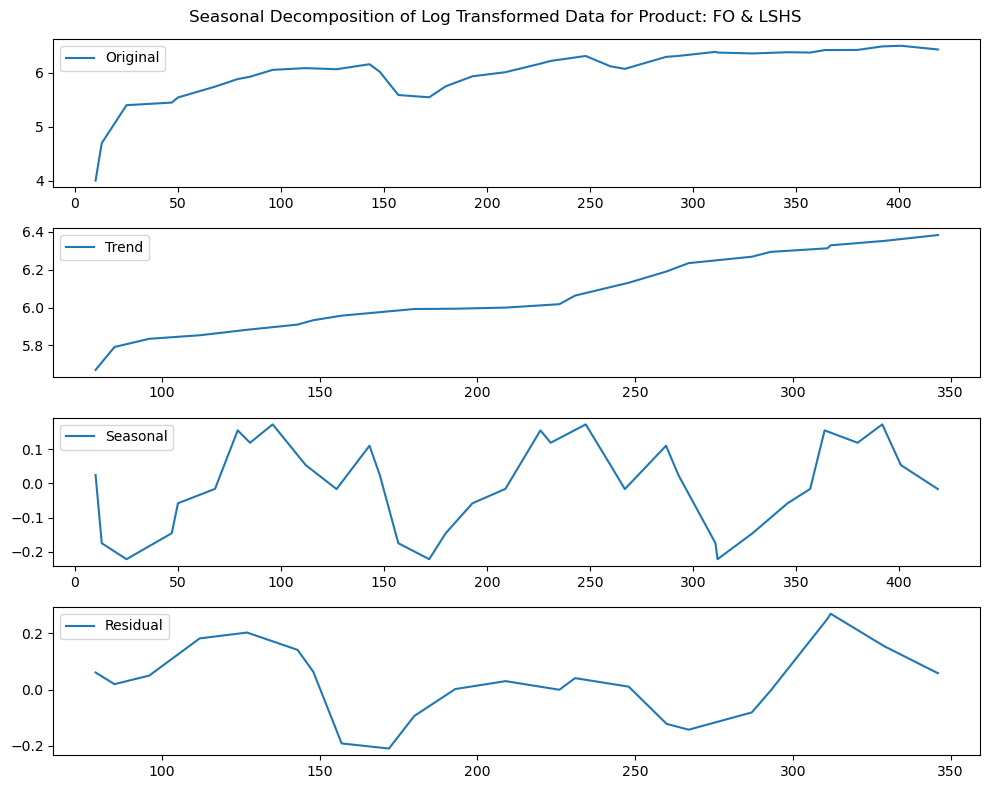


Stationarity Test for Residuals of Product: FO & LSHS


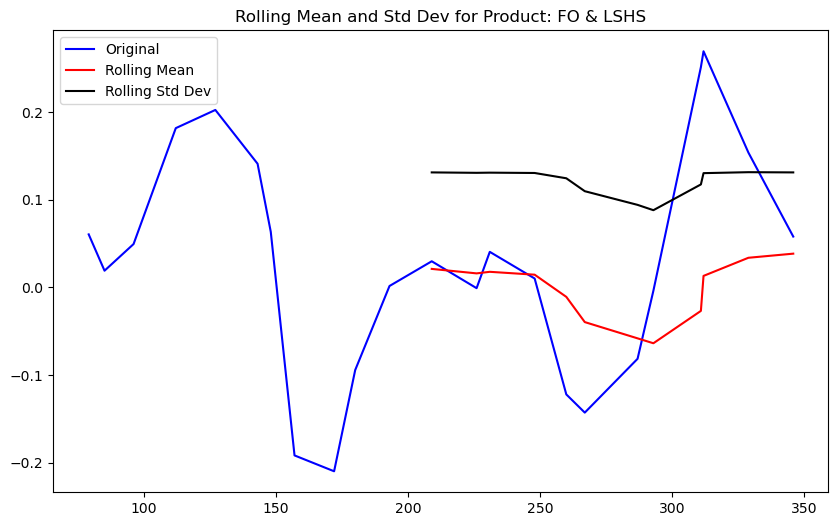

Results of Dickey-Fuller Test for Product: FO & LSHS
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


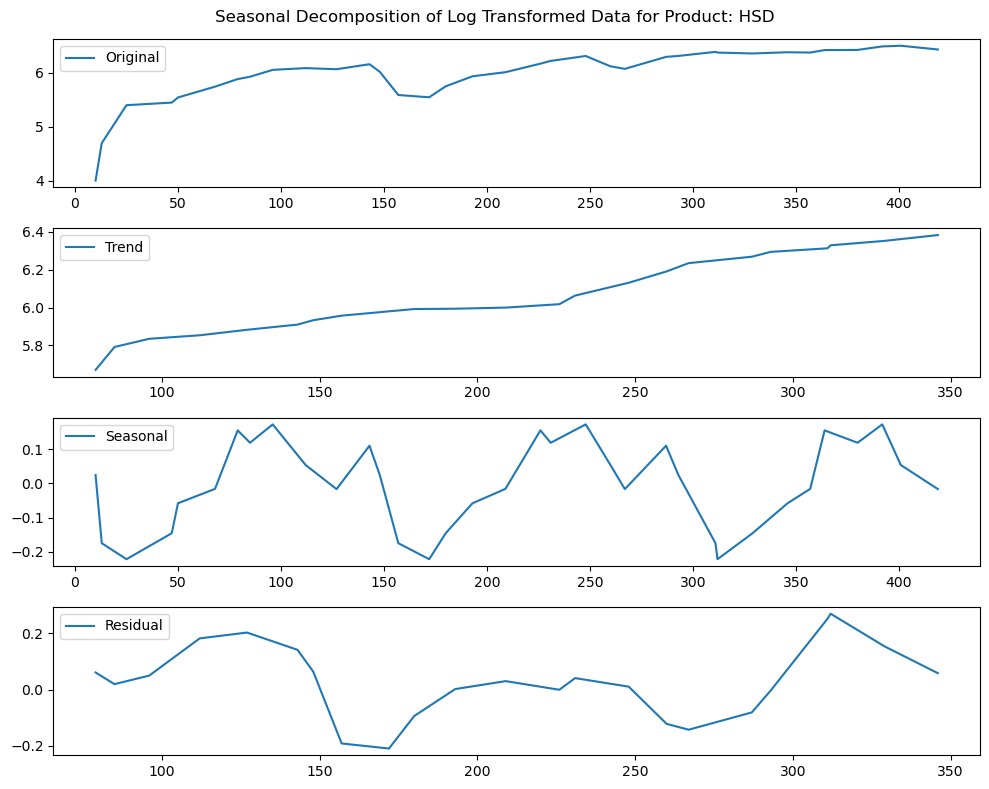


Stationarity Test for Residuals of Product: HSD


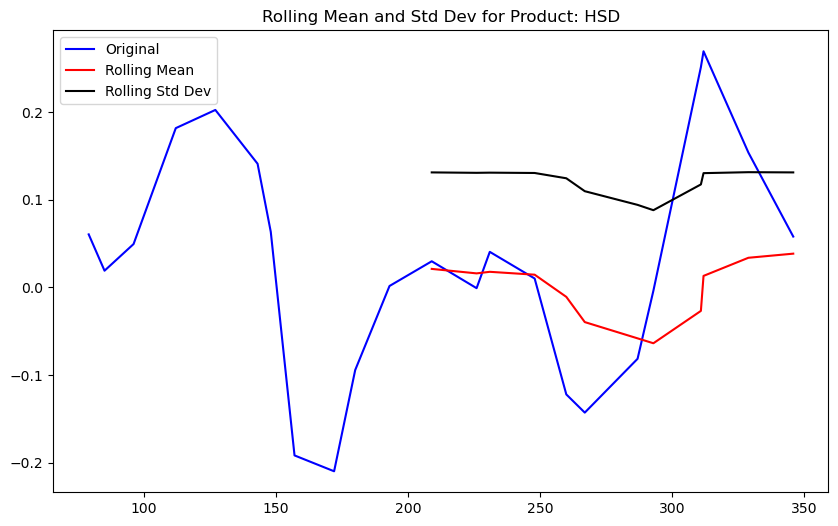

Results of Dickey-Fuller Test for Product: HSD
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


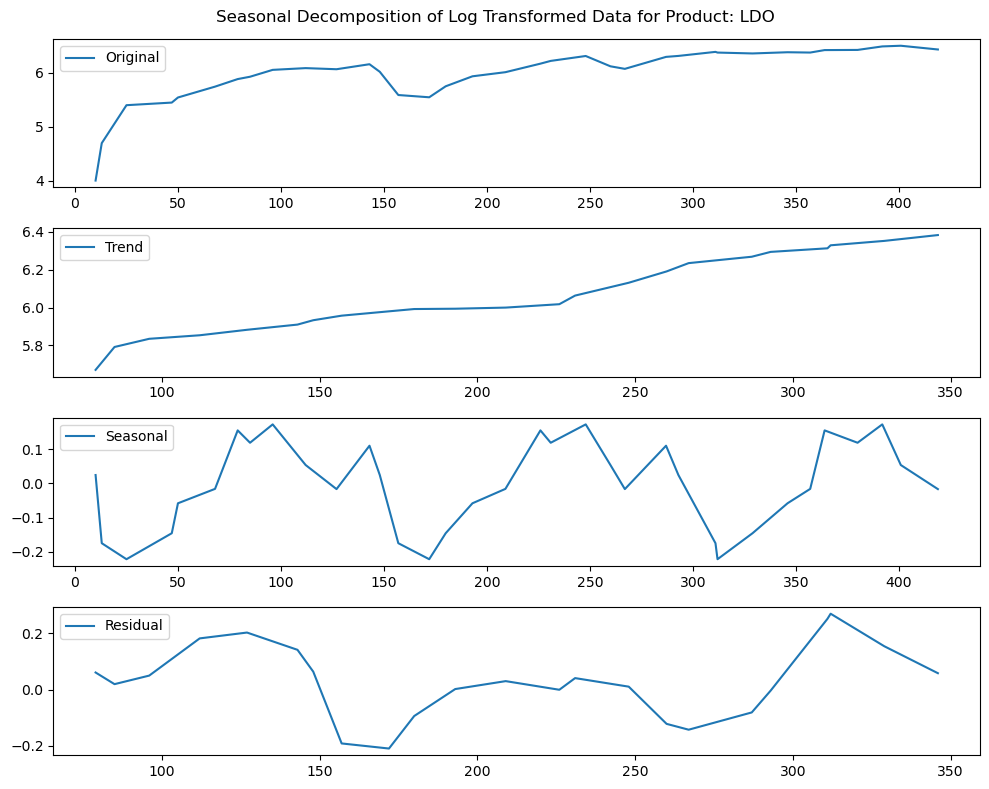


Stationarity Test for Residuals of Product: LDO


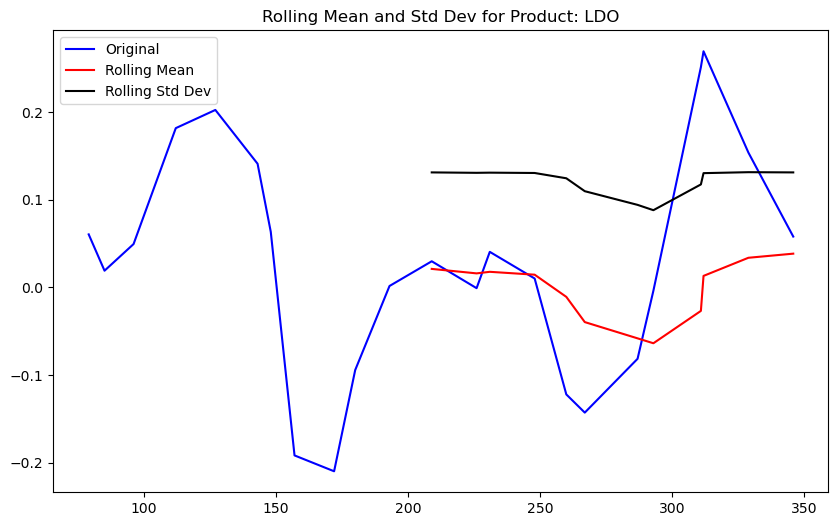

Results of Dickey-Fuller Test for Product: LDO
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


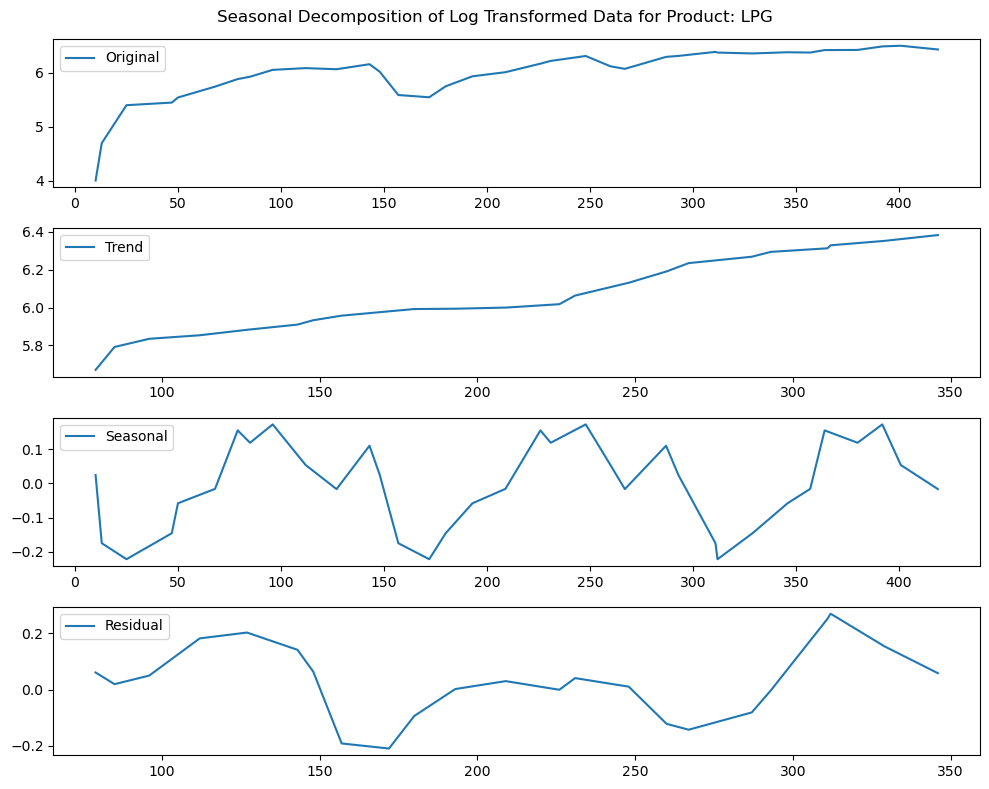


Stationarity Test for Residuals of Product: LPG


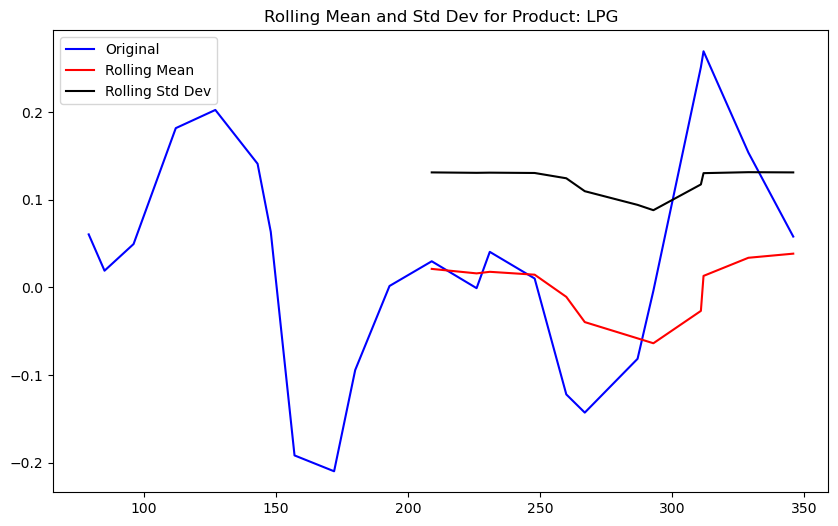

Results of Dickey-Fuller Test for Product: LPG
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


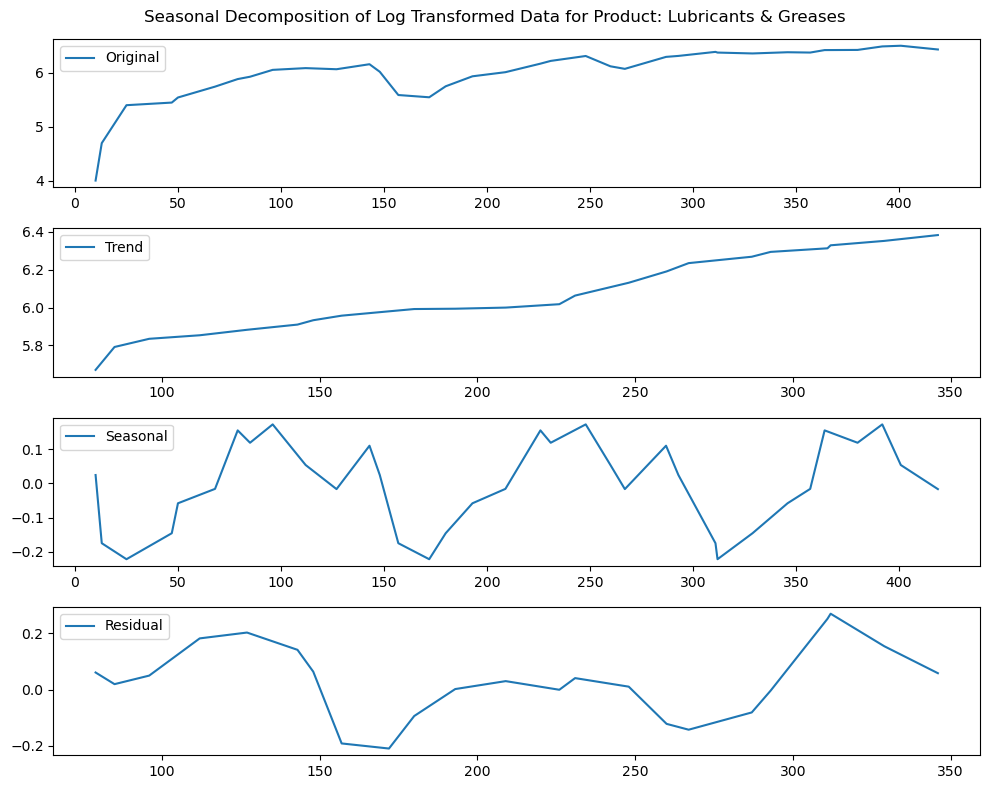


Stationarity Test for Residuals of Product: Lubricants & Greases


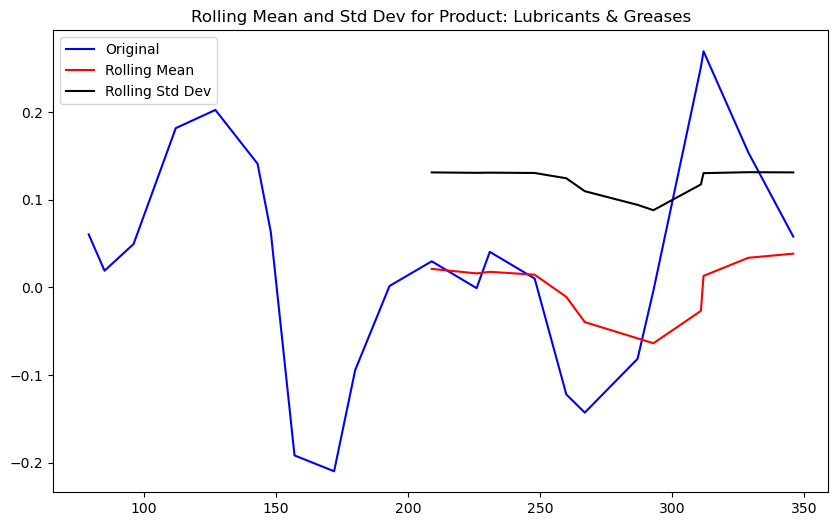

Results of Dickey-Fuller Test for Product: Lubricants & Greases
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


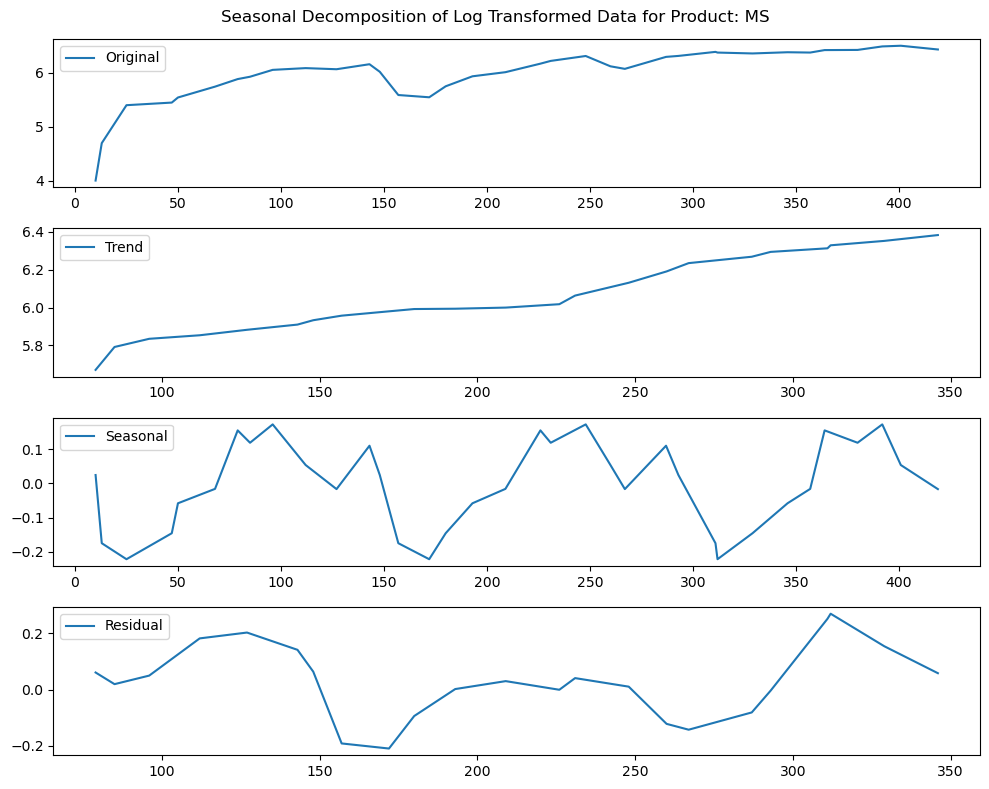


Stationarity Test for Residuals of Product: MS


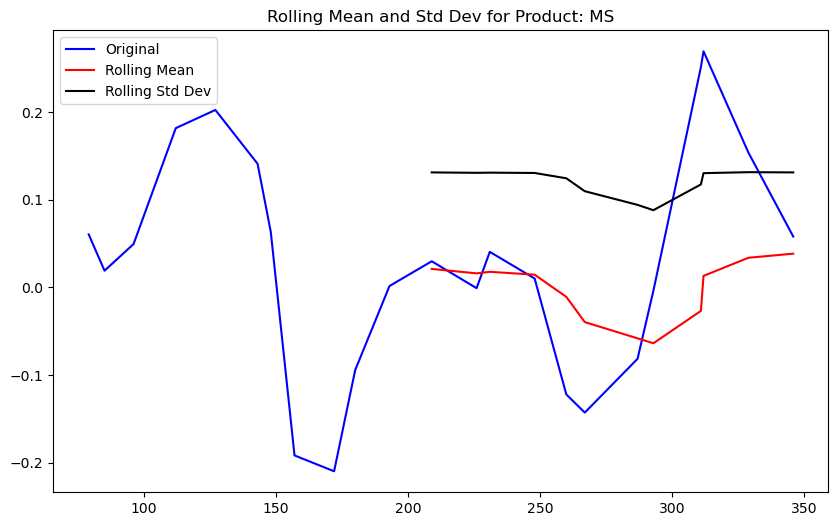

Results of Dickey-Fuller Test for Product: MS
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


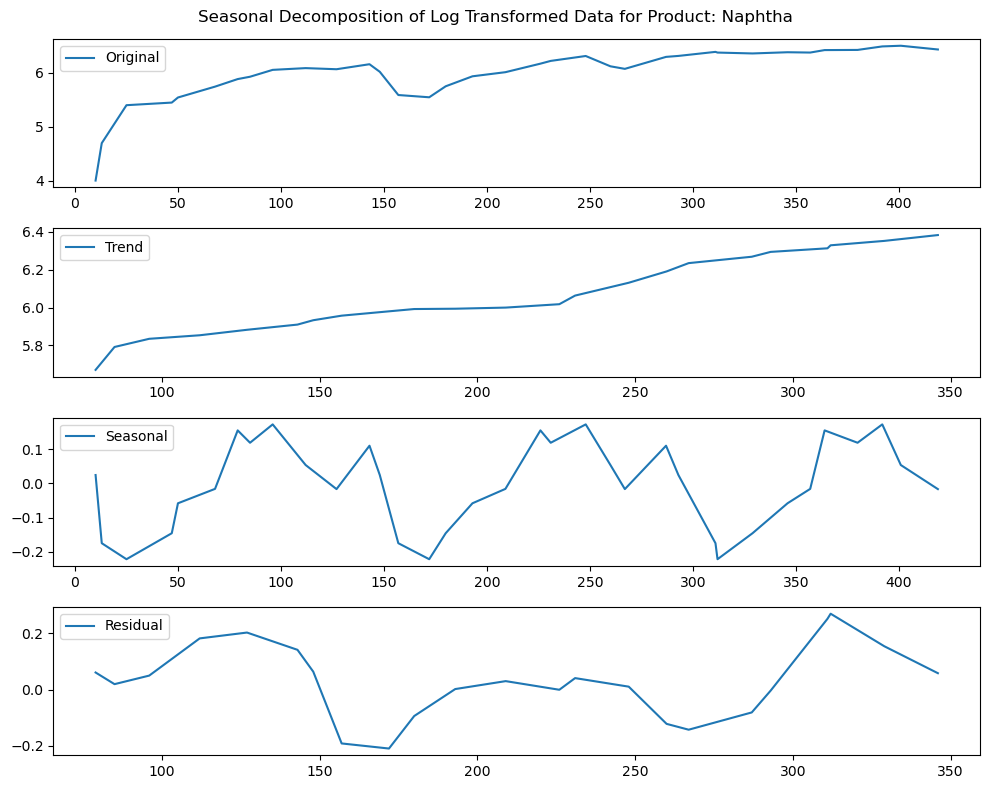


Stationarity Test for Residuals of Product: Naphtha


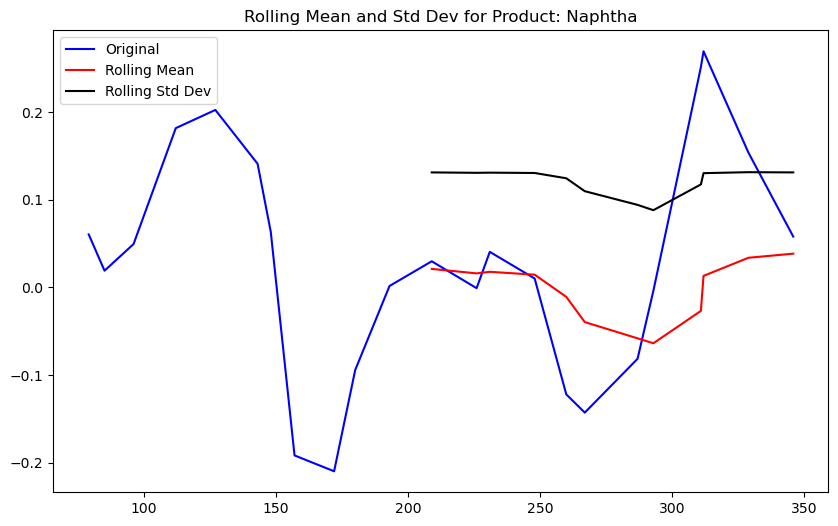

Results of Dickey-Fuller Test for Product: Naphtha
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


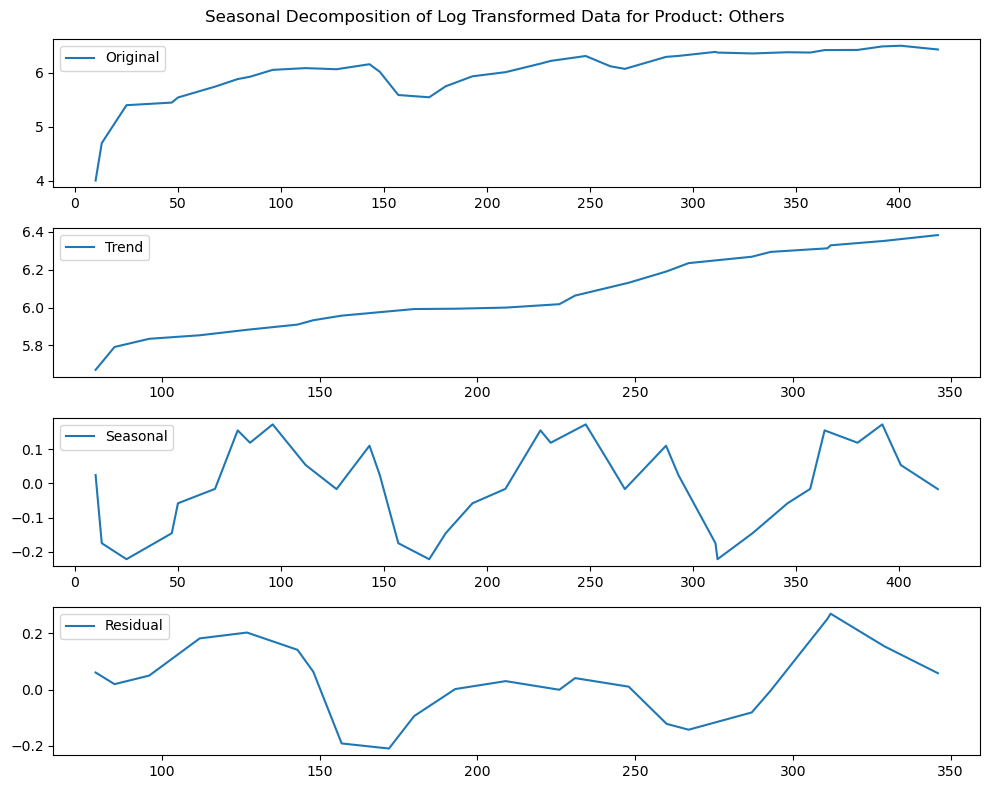


Stationarity Test for Residuals of Product: Others


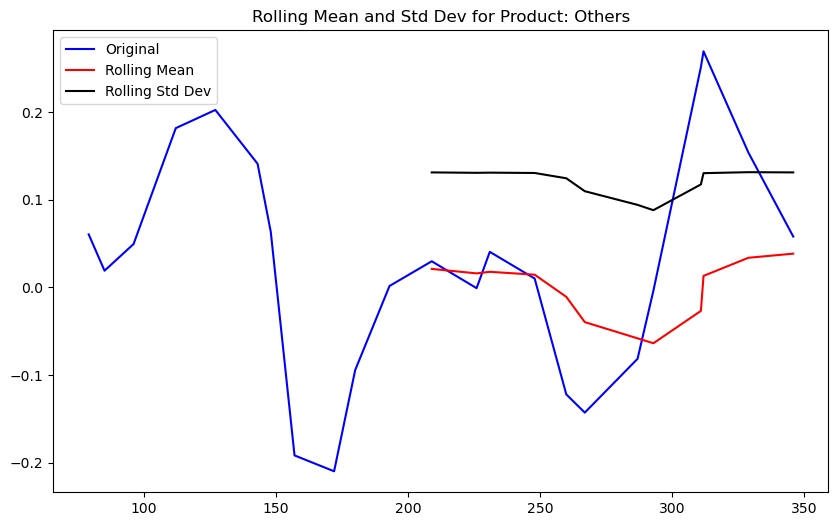

Results of Dickey-Fuller Test for Product: Others
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


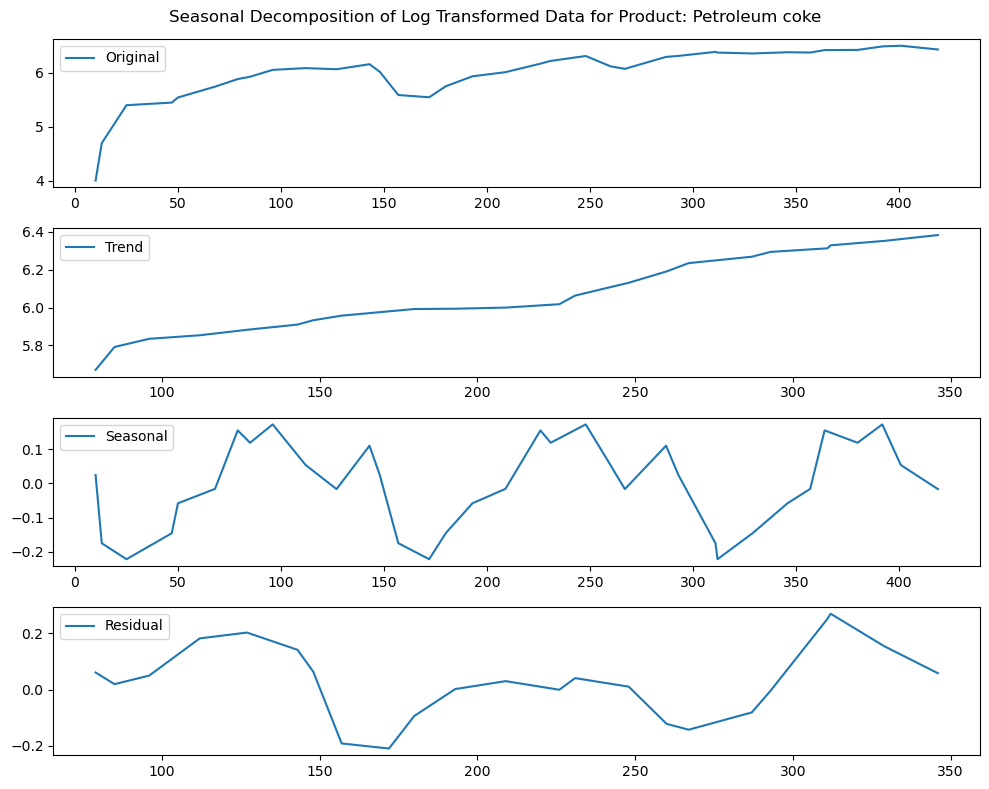


Stationarity Test for Residuals of Product: Petroleum coke


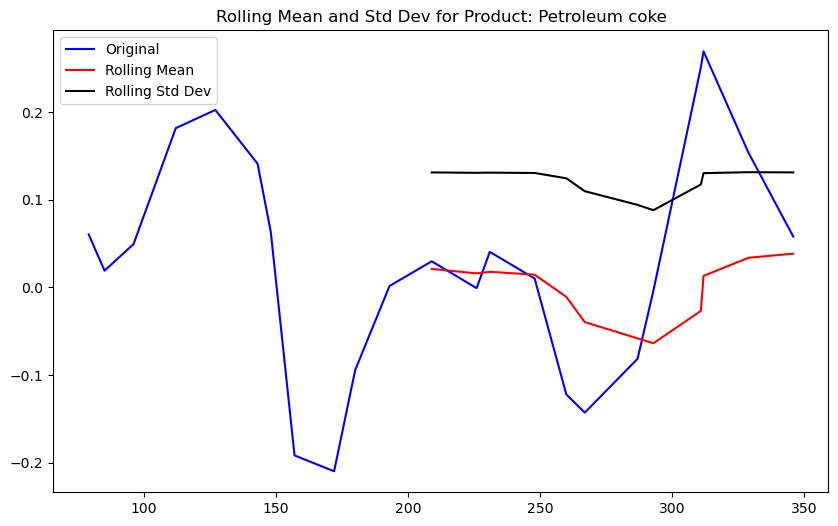

Results of Dickey-Fuller Test for Product: Petroleum coke
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


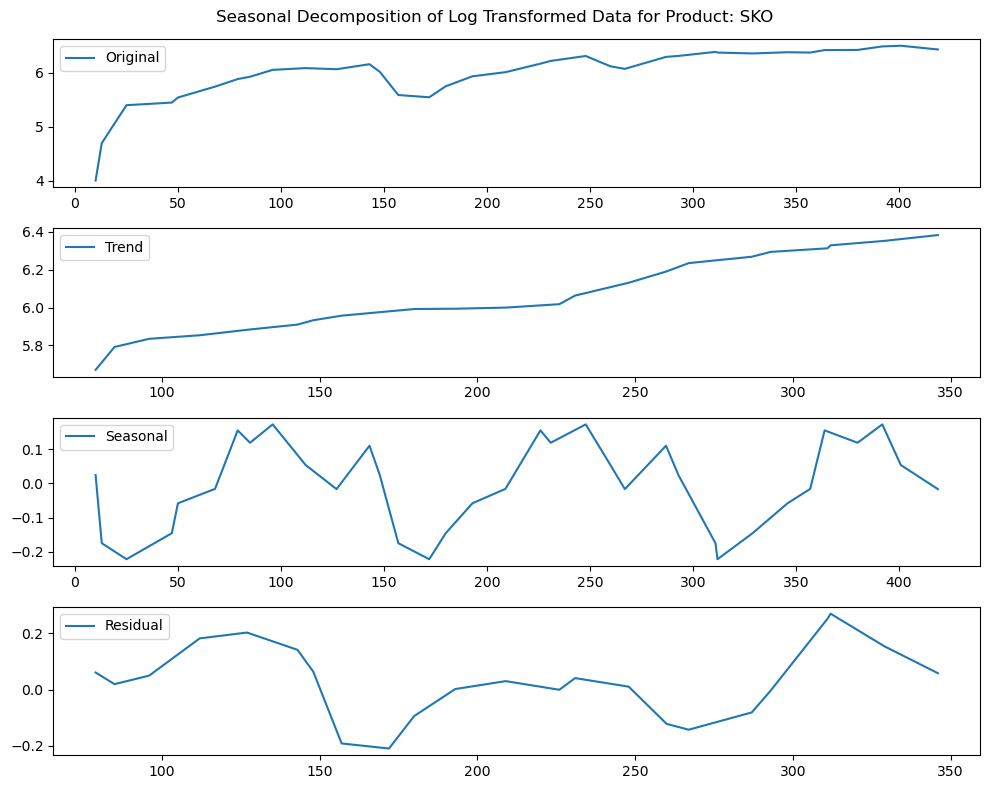


Stationarity Test for Residuals of Product: SKO


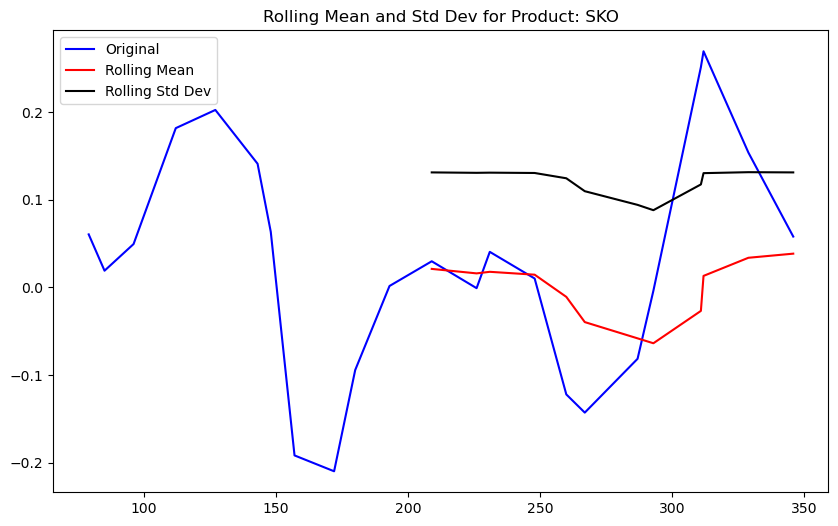

Results of Dickey-Fuller Test for Product: SKO
Test Statistic                 -3.573302
p-value                         0.006292
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
grouped = df.groupby('products')

for product, group in grouped:

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(df_logScale, model='additive', period=12)

    # Extract trend, seasonal, and residual components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the decomposition for each product
    plt.figure(figsize=(10, 8))
    plt.subplot(411)
    plt.plot(df_logScale, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.suptitle(f'Seasonal Decomposition of Log Transformed Data for Product: {product}')
    plt.tight_layout()
    plt.show(block=False)

    # Test stationarity on the residual component (detrended and deseasonalized data)
    decomposedLogData = residual.dropna()  # Remove NaN values for stationarity test
    print(f"\nStationarity Test for Residuals of Product: {product}")
    test_stationarity(decomposedLogData, product_name=product)

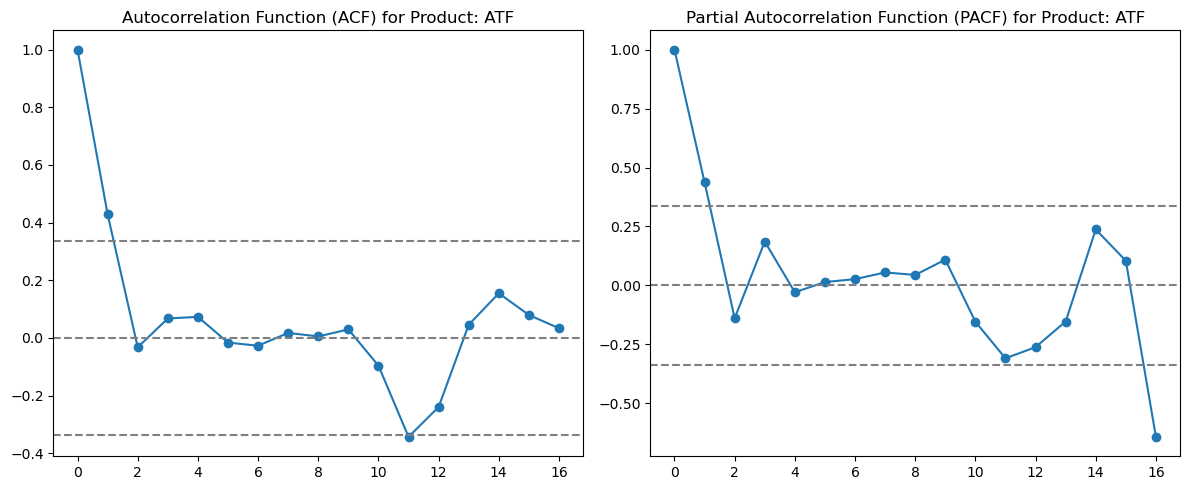

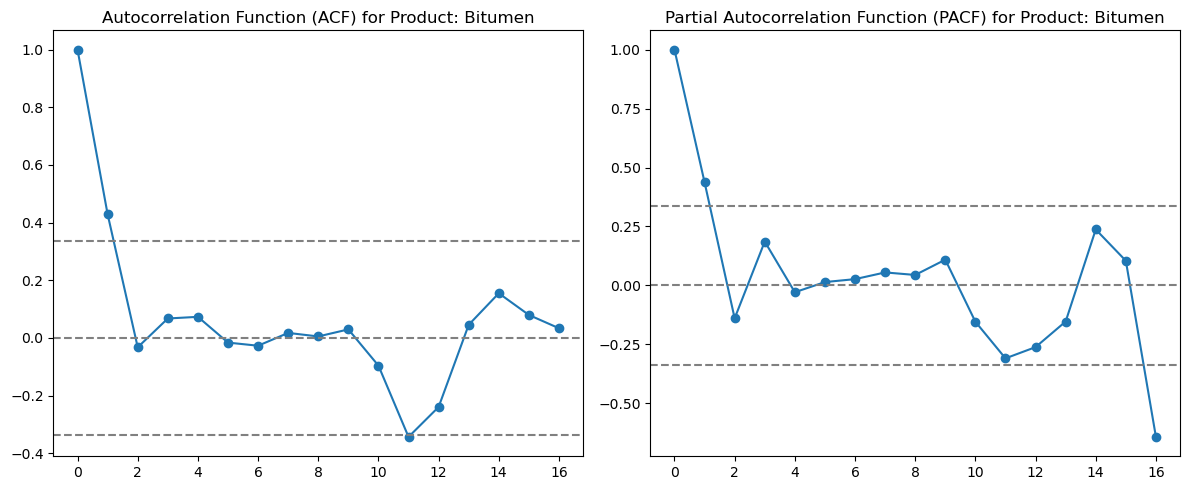

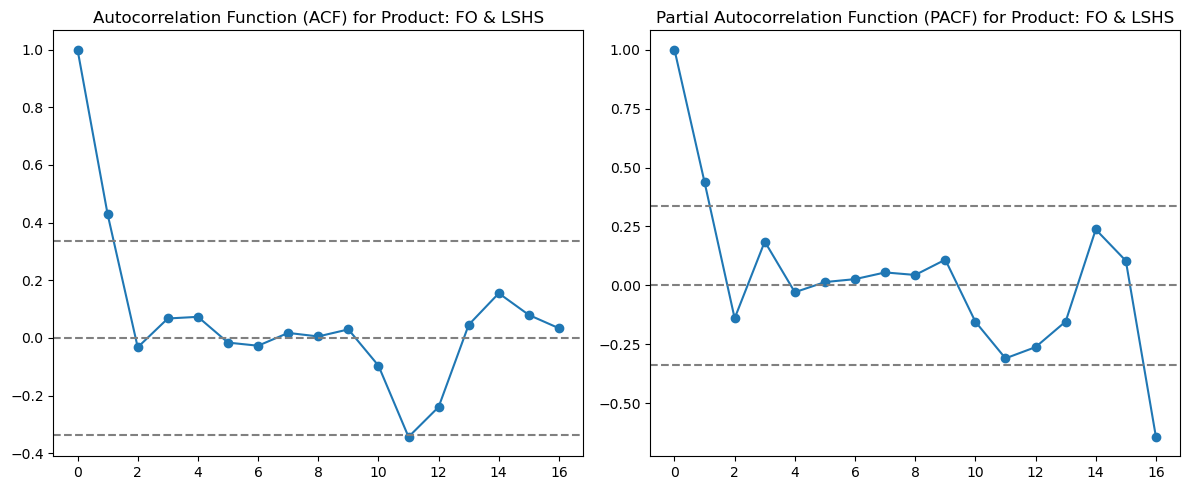

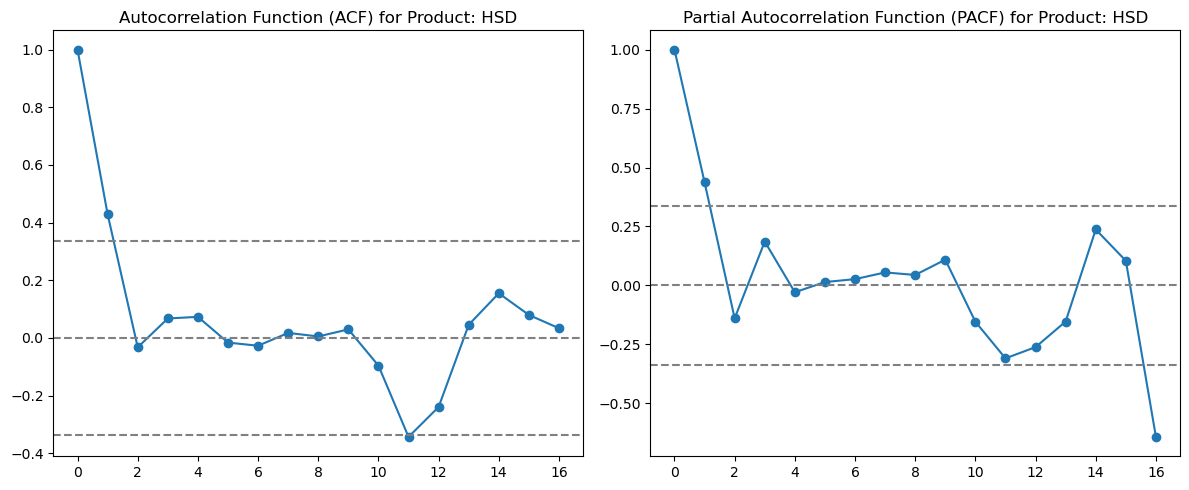

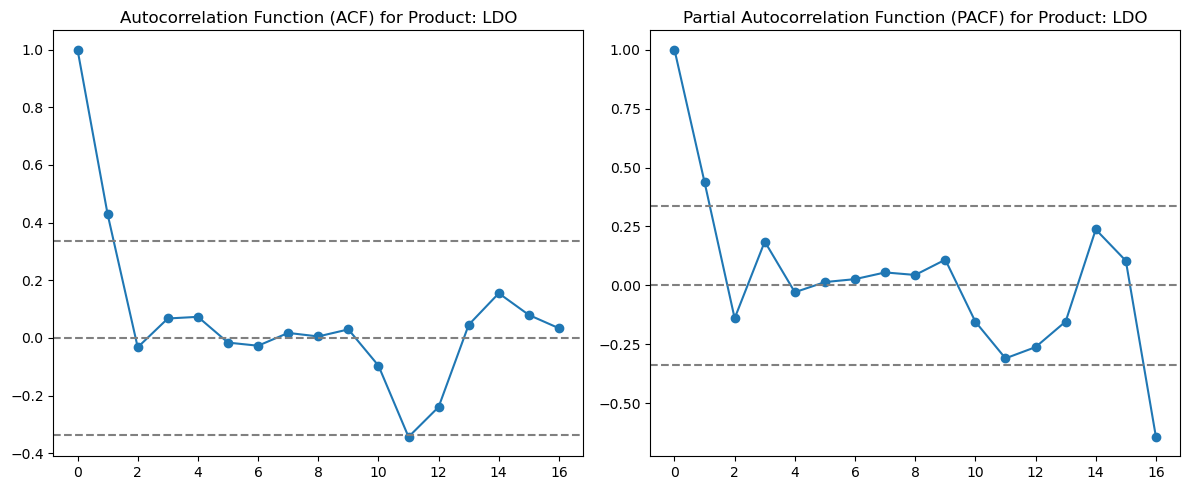

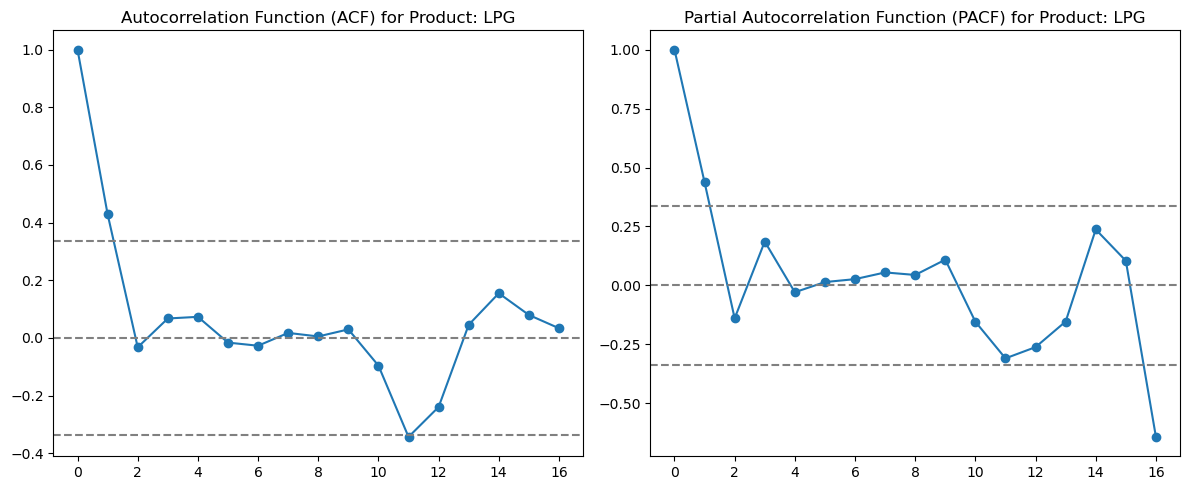

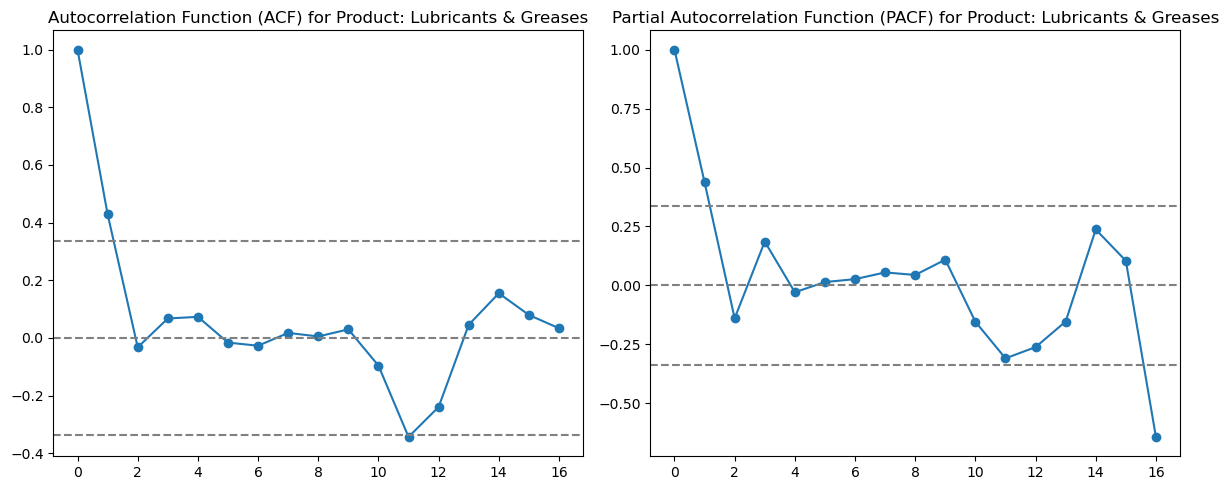

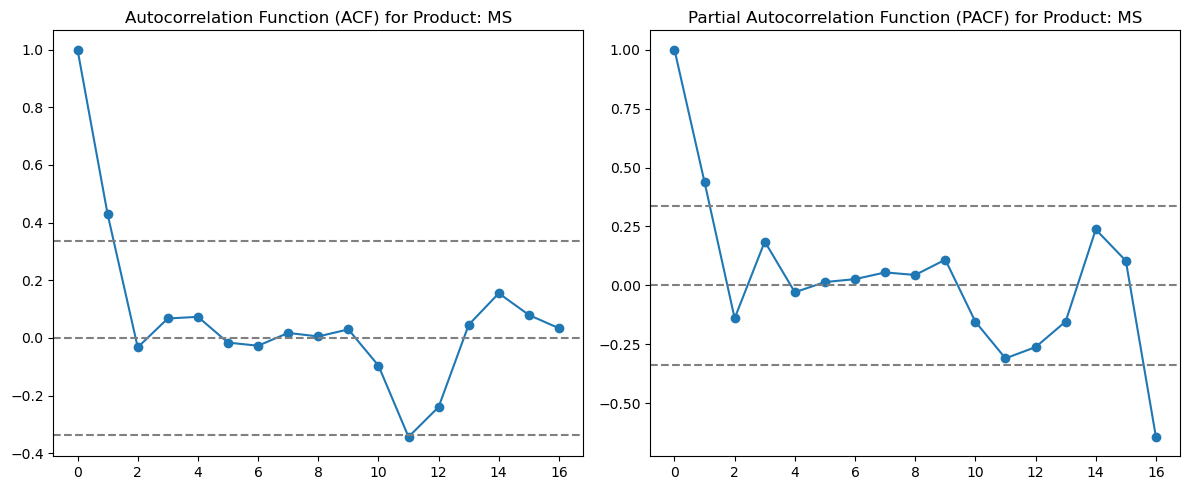

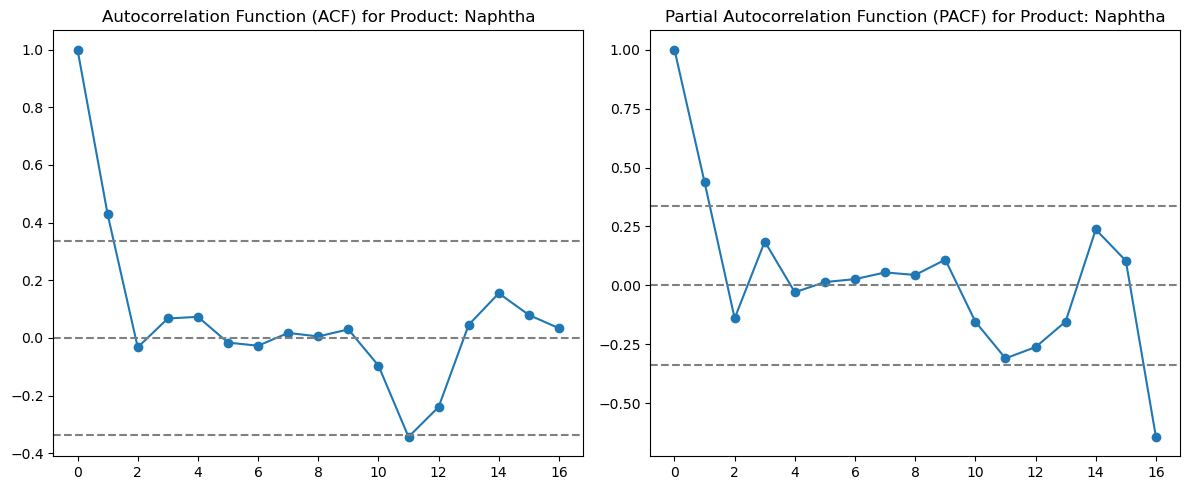

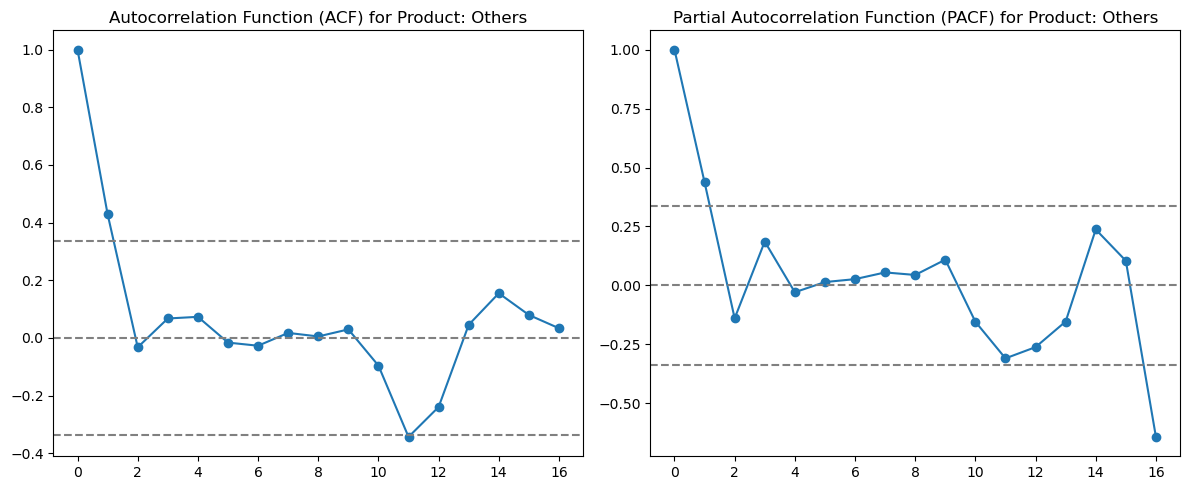

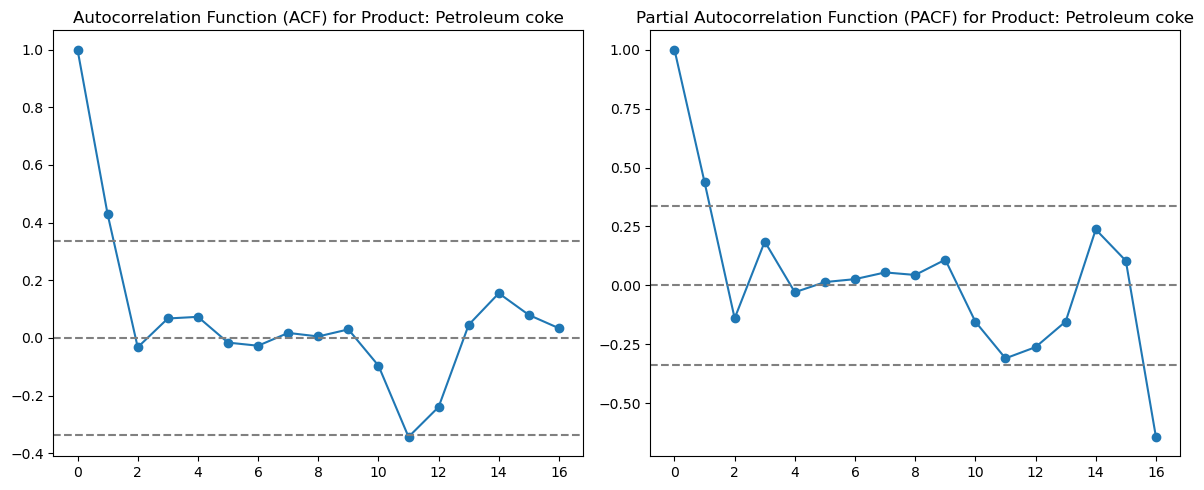

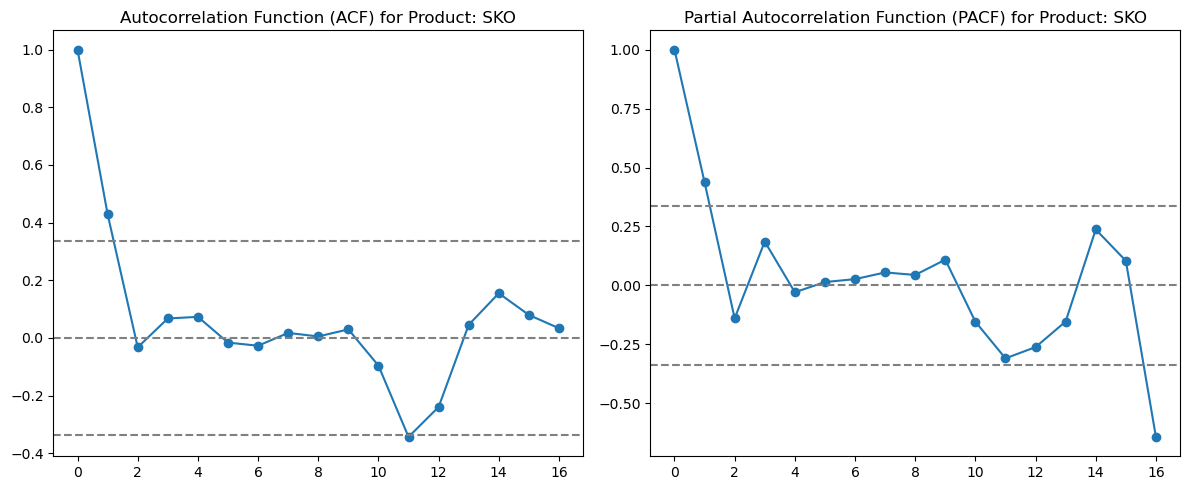

In [50]:
# ACF and PACF Plots

from statsmodels.tsa.stattools import acf, pacf
grouped = df.groupby('products')

for product, group in grouped:

    dataLogDiffShifting = dataLogDiffShifting.dropna()

    # Calculate ACF and PACF
    lag_acf = acf(dataLogDiffShifting, nlags=16)
    lag_pacf = pacf(dataLogDiffShifting, nlags=16, method='ols')

    # Plot ACF and PACF for each product
    plt.figure(figsize=(12, 5))

    # Plot ACF
    plt.subplot(121)
    plt.plot(lag_acf, marker='o')
    plt.axhline(y=0, linestyle='--', color='grey')
    plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='grey')
    plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='grey')
    plt.title(f'Autocorrelation Function (ACF) for Product: {product}')

    # Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf, marker='o')
    plt.axhline(y=0, linestyle='--', color='grey')
    plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='grey')
    plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color='grey')
    plt.title(f'Partial Autocorrelation Function (PACF) for Product: {product}')

    plt.tight_layout()
    plt.show(block=False)


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


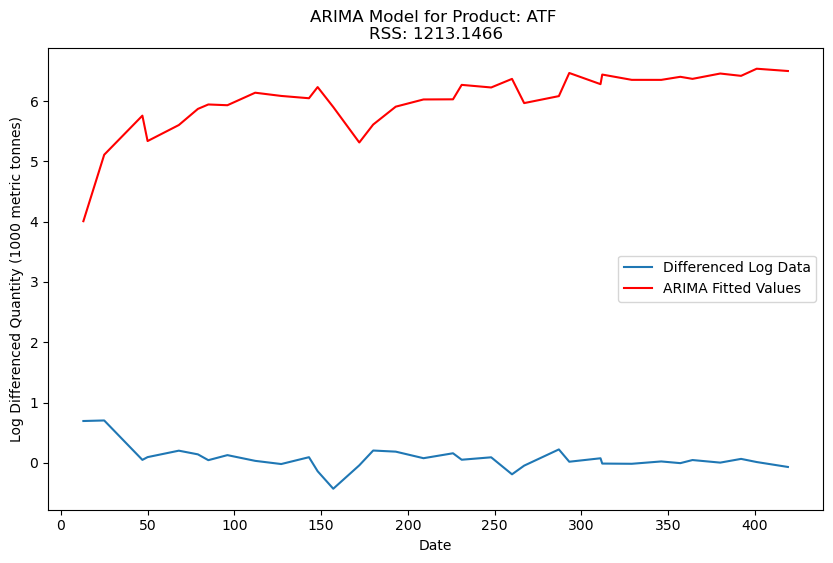

Plotting ARIMA Model for Product: ATF


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


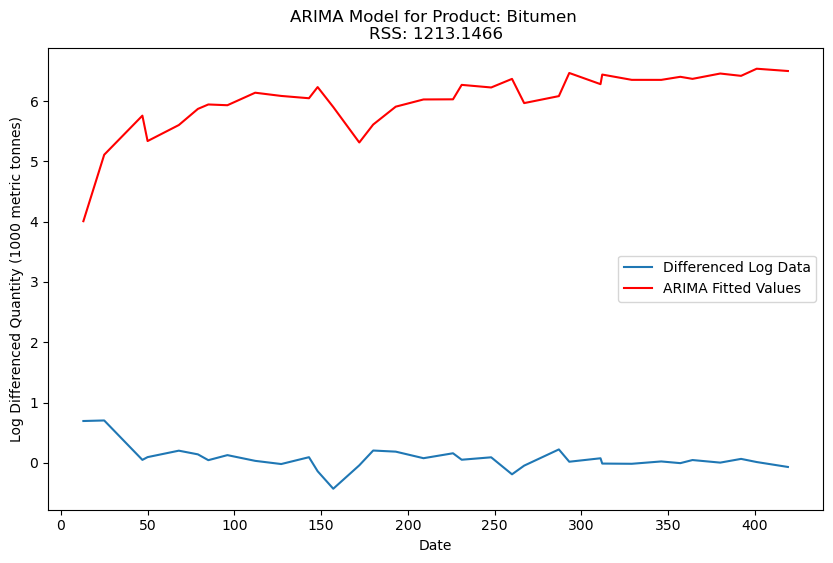

Plotting ARIMA Model for Product: Bitumen


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


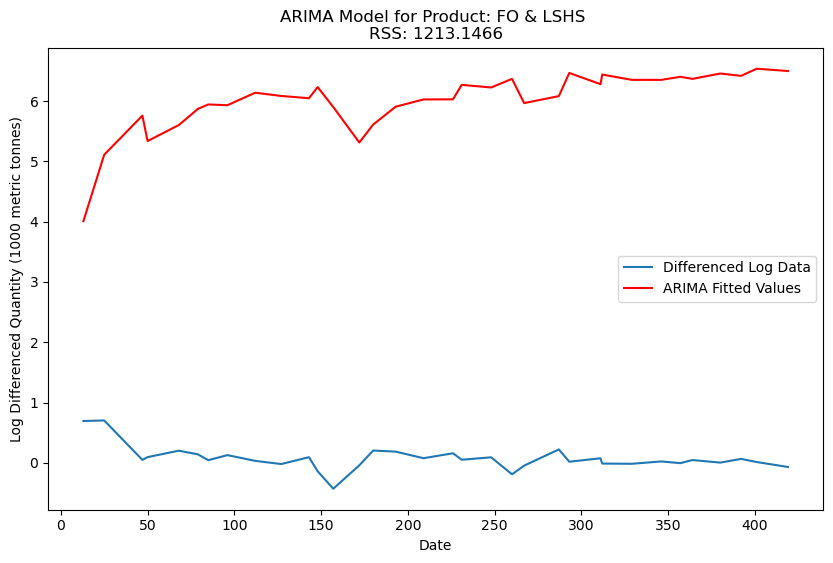

Plotting ARIMA Model for Product: FO & LSHS


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


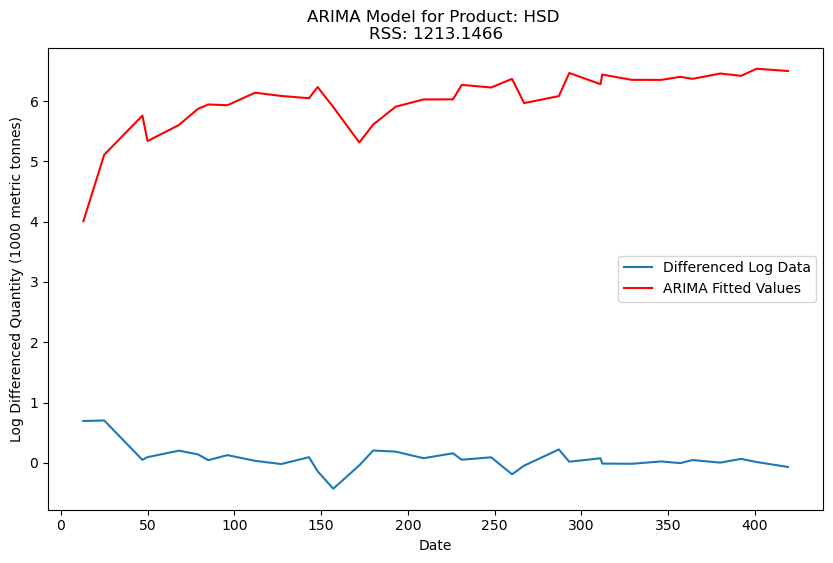

Plotting ARIMA Model for Product: HSD


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


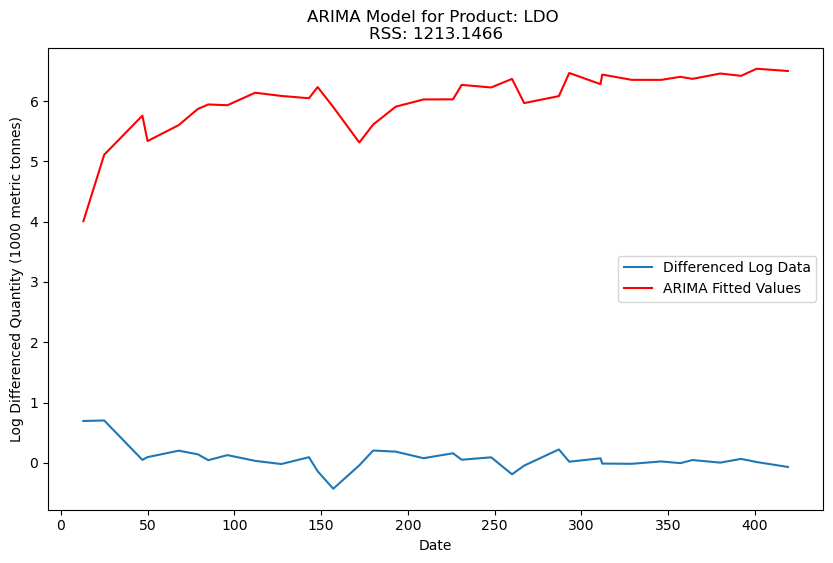

Plotting ARIMA Model for Product: LDO


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


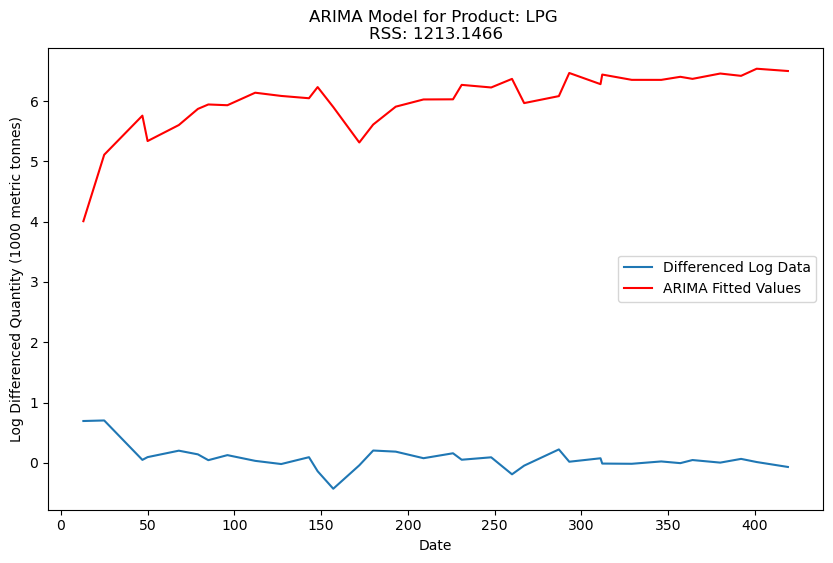

Plotting ARIMA Model for Product: LPG


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


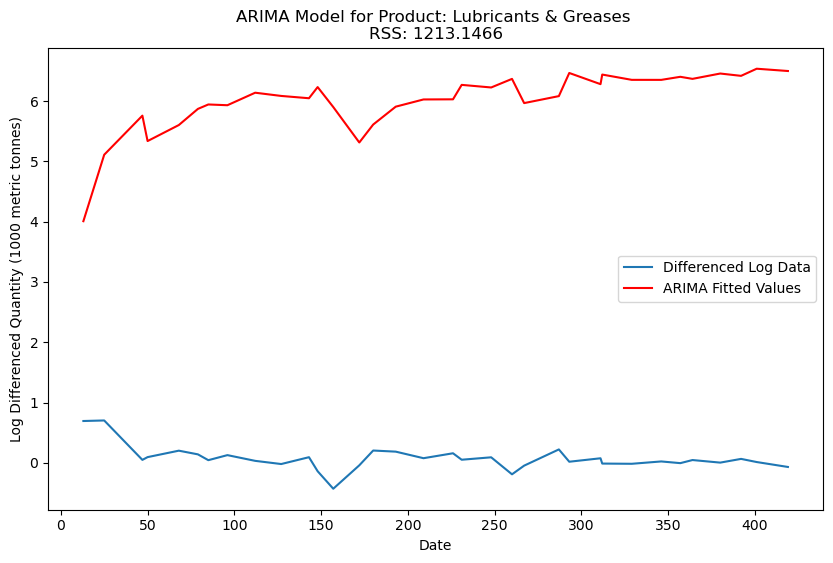

Plotting ARIMA Model for Product: Lubricants & Greases


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


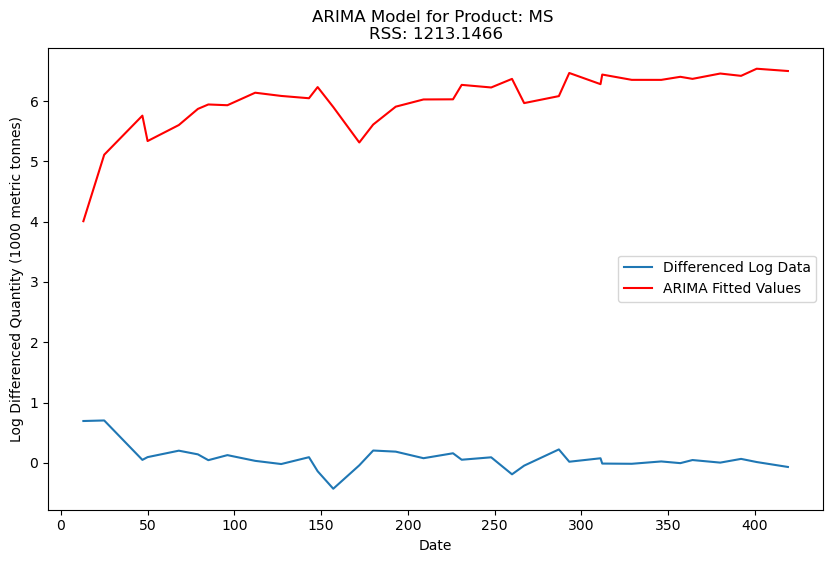

Plotting ARIMA Model for Product: MS


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


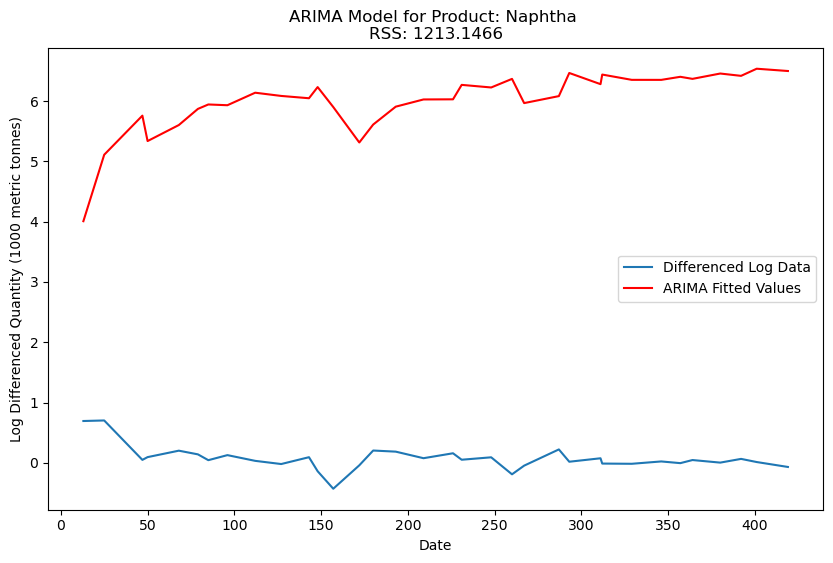

Plotting ARIMA Model for Product: Naphtha


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


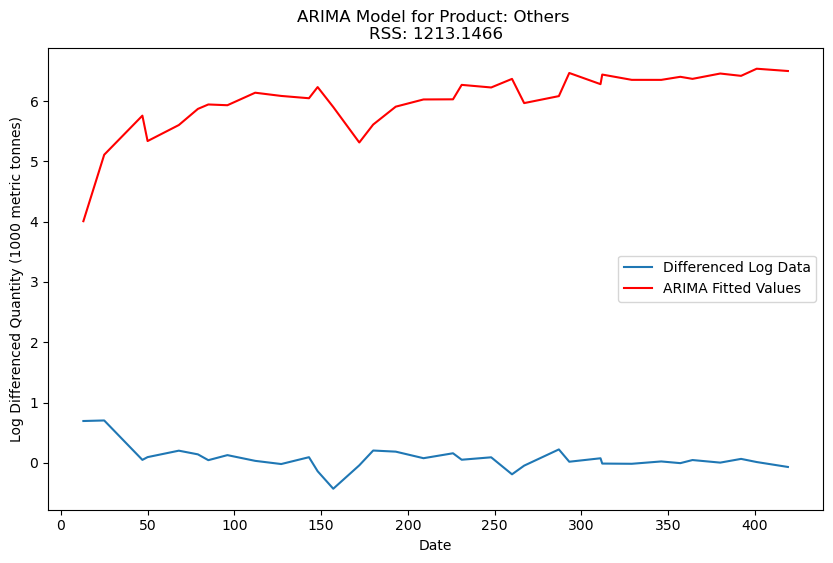

Plotting ARIMA Model for Product: Others


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


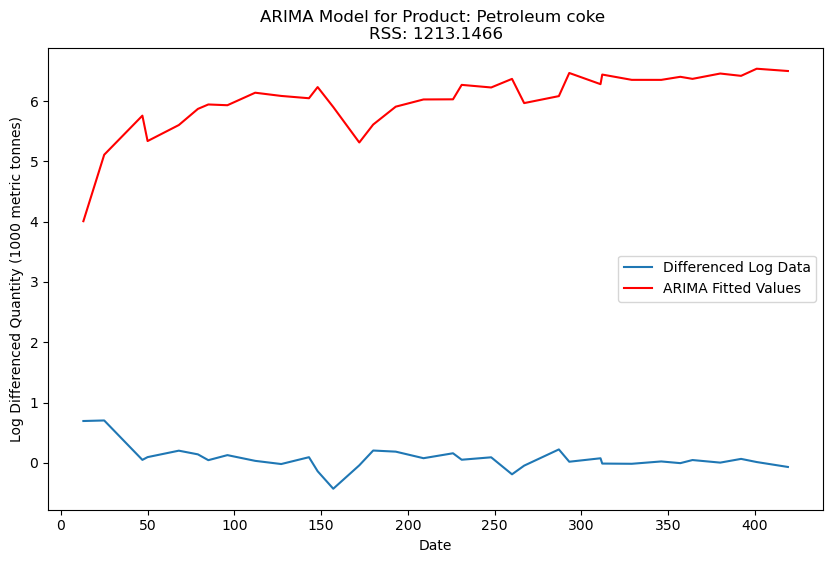

Plotting ARIMA Model for Product: Petroleum coke


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


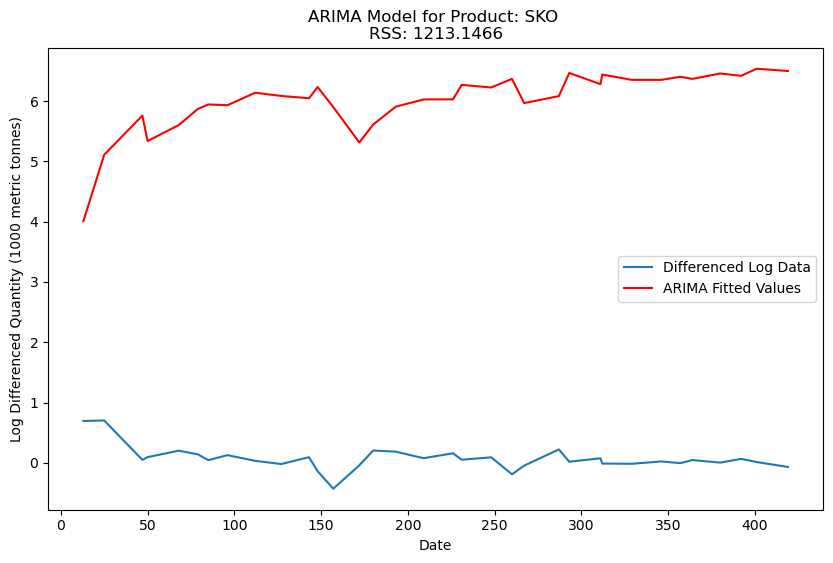

Plotting ARIMA Model for Product: SKO


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


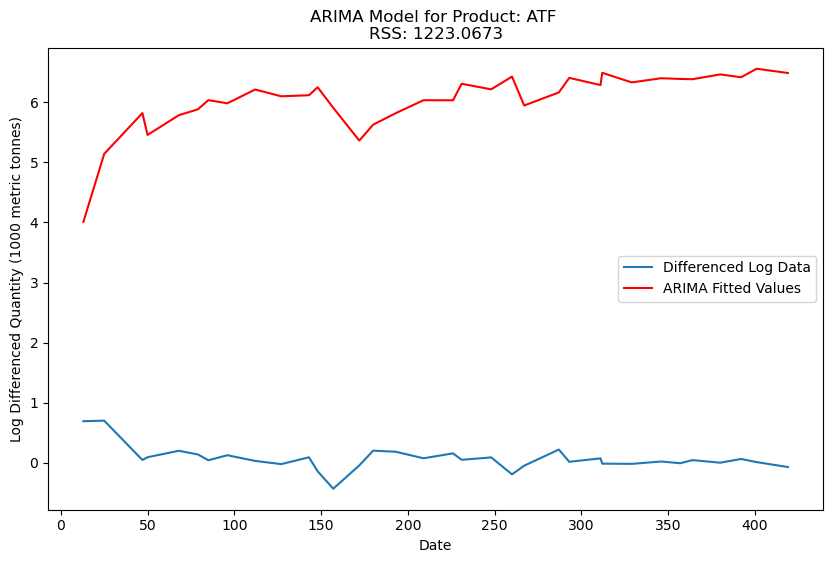

Plotting ARIMA Model for Product: ATF


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


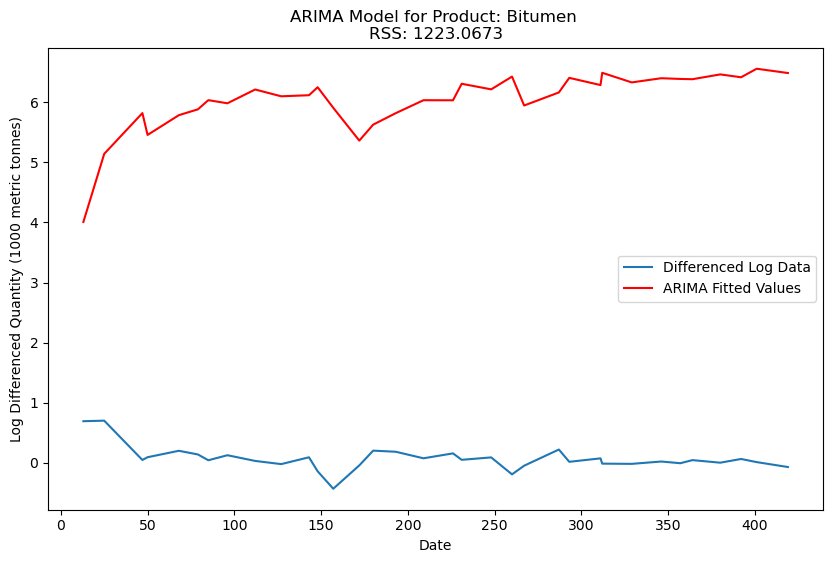

Plotting ARIMA Model for Product: Bitumen


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


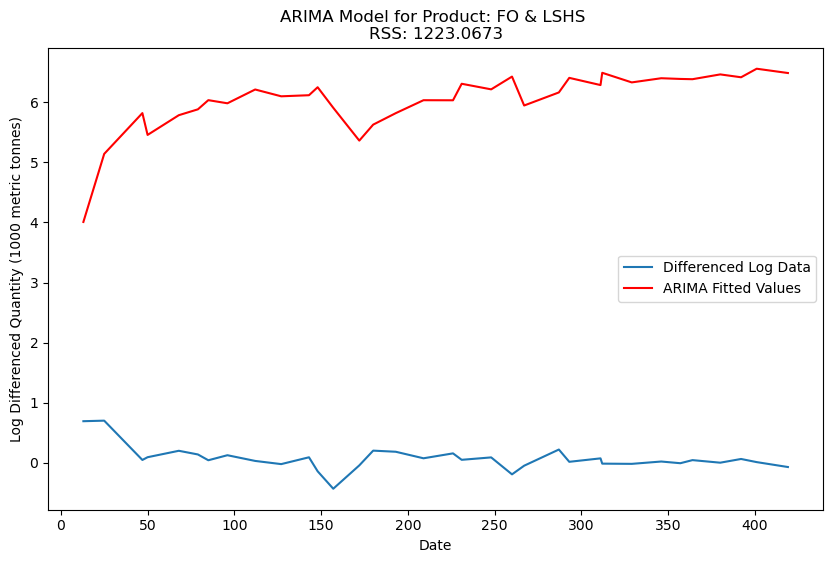

Plotting ARIMA Model for Product: FO & LSHS


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


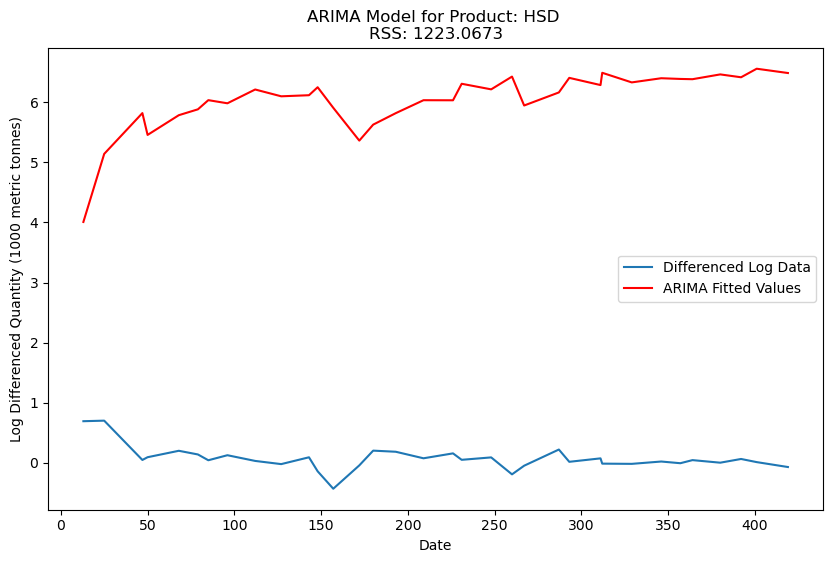

Plotting ARIMA Model for Product: HSD


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


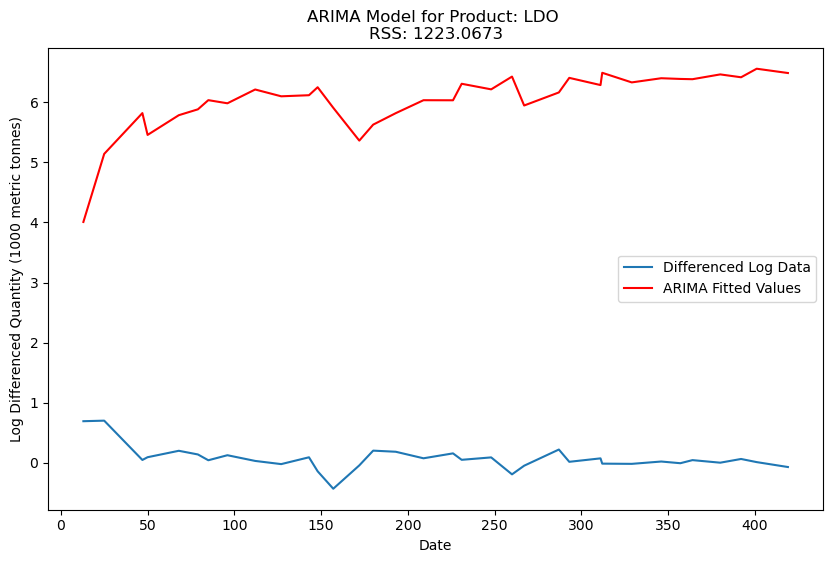

Plotting ARIMA Model for Product: LDO


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


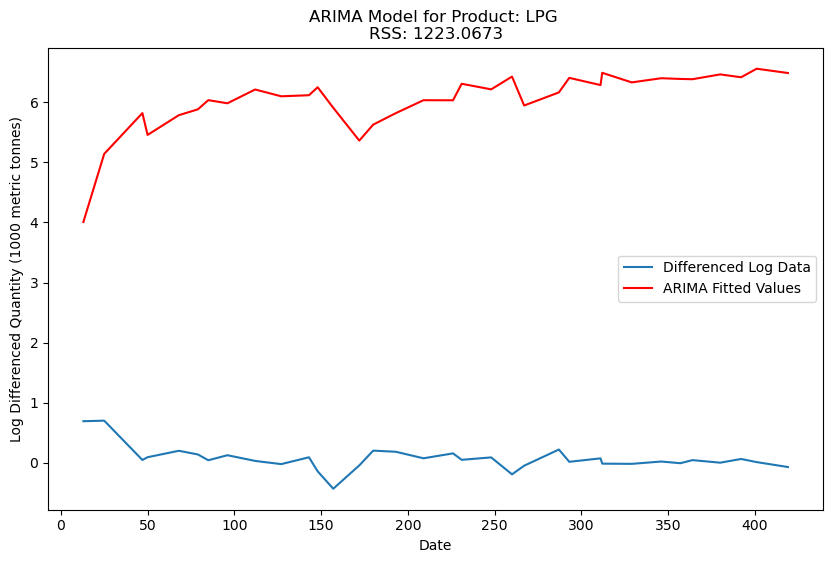

Plotting ARIMA Model for Product: LPG


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


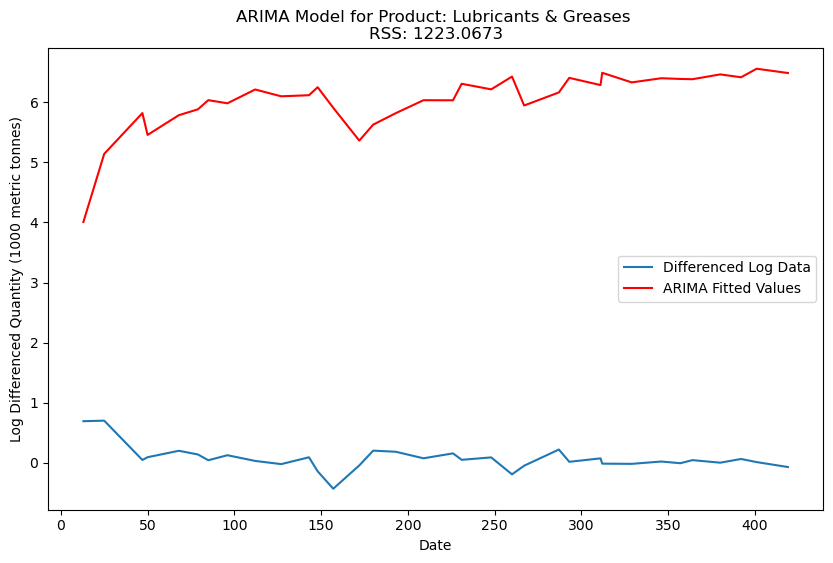

Plotting ARIMA Model for Product: Lubricants & Greases


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


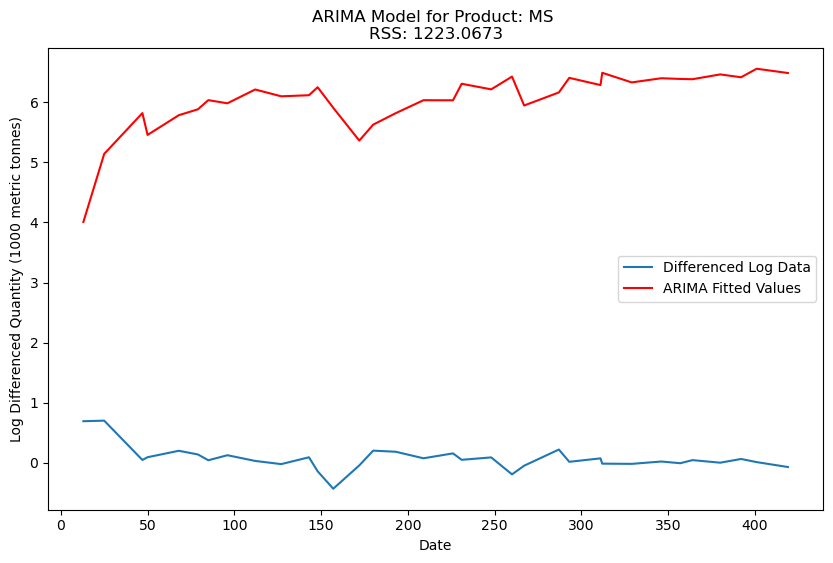

Plotting ARIMA Model for Product: MS


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


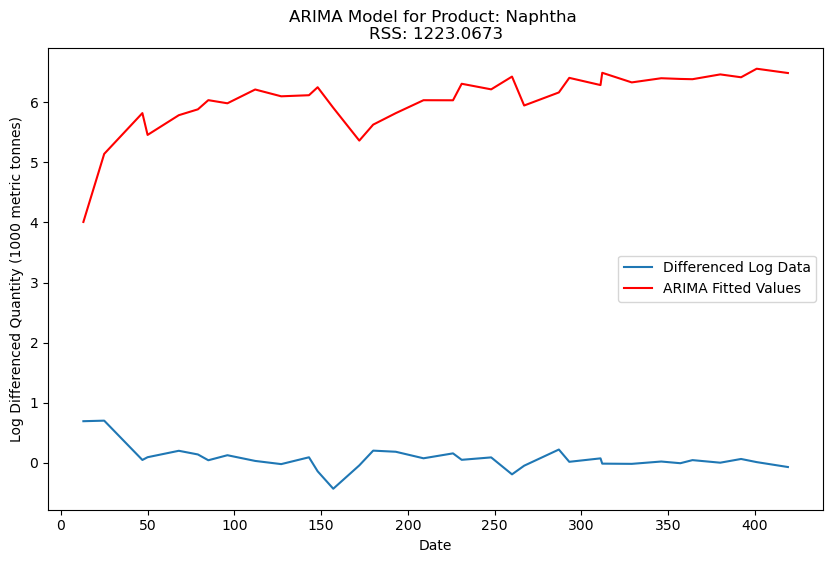

Plotting ARIMA Model for Product: Naphtha


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


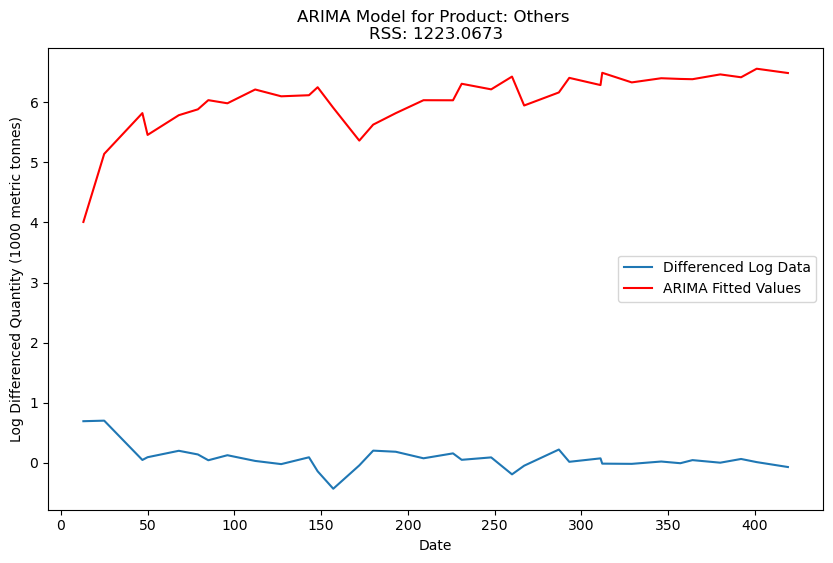

Plotting ARIMA Model for Product: Others


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


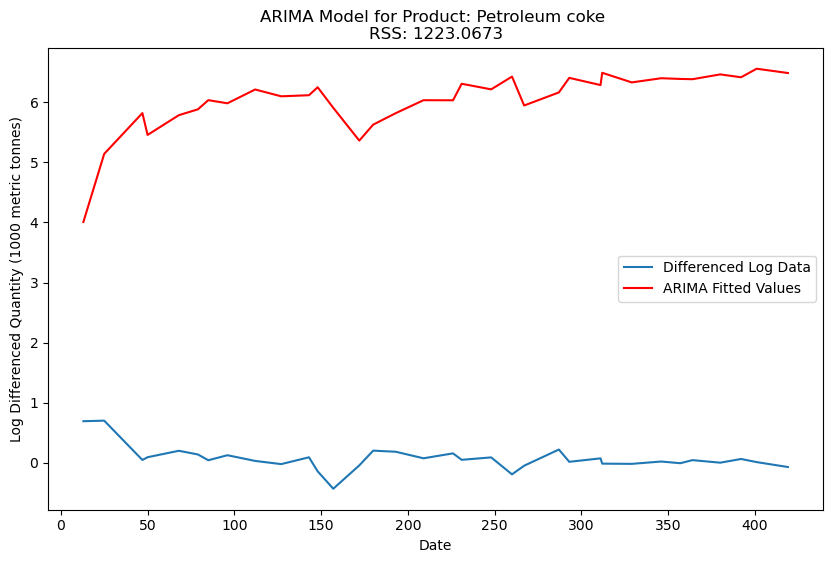

Plotting ARIMA Model for Product: Petroleum coke


C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\vishn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


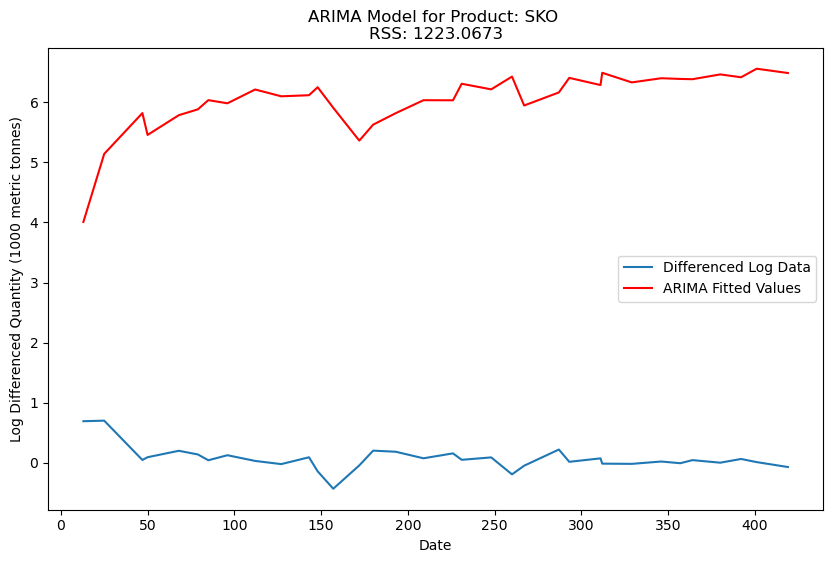

Plotting ARIMA Model for Product: SKO


In [72]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Group by 'products'
grouped = df.groupby('products')

for product, group in grouped:


    # Differencing to remove trend
    dataLogDiffShifting = df_logScale - df_logScale.shift()
    dataLogDiffShifting = dataLogDiffShifting.dropna()

    # Fit the ARIMA model on the log-transformed data with differencing
    model = ARIMA(df_logScale, order=(2, 1, 0))
    result_AR = model.fit()

    # Plot the differenced data and ARIMA model's fitted values
    plt.figure(figsize=(10, 6))
    plt.plot(dataLogDiffShifting, label='Differenced Log Data')
    plt.plot(result_AR.fittedvalues[1:], color='red', label='ARIMA Fitted Values')
    plt.title(f'ARIMA Model for Product: {product} \nRSS: %.4f' % sum((result_AR.fittedvalues[1:] - dataLogDiffShifting) ** 2))
    plt.xlabel('Date')
    plt.ylabel('Log Differenced Quantity (1000 metric tonnes)')
    plt.legend(loc='best')
    plt.show(block=False)

    print(f'Plotting ARIMA Model for Product: {product}')


In [78]:
predictions_ARIMA_diff = pd.Series(result_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

10    0.000000
13    4.007333
25    5.139881
47    5.818218
50    5.455310
dtype: float64
